<a href="https://colab.research.google.com/github/Esselle7/SINDY-ModelIdentificationFromData/blob/main/Energy_MADE_PySINDy_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries import

In [ ]:
!apt-get install graphviz libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install git+https://github.com/LesLivia/lsha.git

  Cloning https://github.com/LesLivia/lsha.git to /tmp/pip-req-build-du63eiev
  Running command git clone --filter=blob:none --quiet https://github.com/LesLivia/lsha.git /tmp/pip-req-build-du63eiev
  Resolved https://github.com/LesLivia/lsha.git to commit ea7601a99afcb4ef7ead89752d05798b666a124d
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install pykalman

In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
!pip install scikeras

In [ ]:
!pip install pysindy

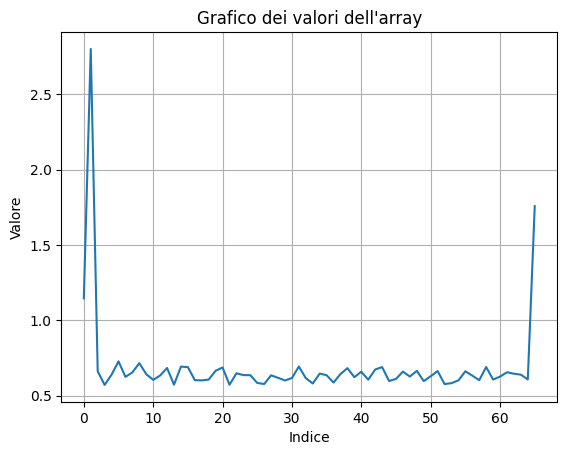

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione dell'array
array = np.array([
    1.146212, 2.799679, 0.661854, 0.571679, 0.639488, 0.727864,
    0.625251, 0.654657, 0.716141, 0.643073, 0.605151, 0.63423,
    0.683792, 0.573014, 0.693137, 0.689745, 0.603353, 0.601785,
    0.607124, 0.665568, 0.68731, 0.57277, 0.648656, 0.636849,
    0.636363, 0.584741, 0.577759, 0.635398, 0.618719, 0.601209,
    0.6174, 0.693598, 0.616797, 0.581282, 0.646587, 0.636061,
    0.587286, 0.644083, 0.682887, 0.623051, 0.659038, 0.606542,
    0.673905, 0.689704, 0.59775, 0.611657, 0.659797, 0.62712,
    0.66472, 0.597037, 0.629178, 0.663671, 0.577527, 0.583232,
    0.601899, 0.661975, 0.633241, 0.603008, 0.690133, 0.607201,
    0.626964, 0.655452, 0.645872, 0.639796, 0.608129, 1.756906
])

# Creazione del grafico
plt.plot(array)
plt.title('Grafico dei valori dell\'array')
plt.xlabel('Indice')
plt.ylabel('Valore')
plt.grid(True)
plt.show()


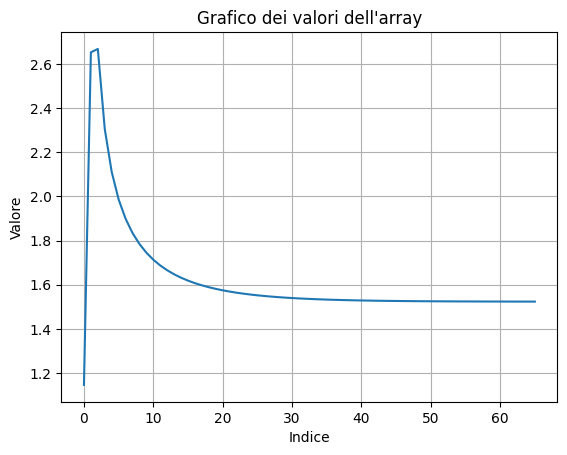

In [ ]:
speed = np.array([
    0.7, 3.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
    6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
    6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
    6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
    6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
    6.7
])


def calculate_power(speed, n, initial_power):
    # Array per memorizzare i valori della potenza
    power = np.zeros(n)
    power[0] = initial_power

    # Calcolo dei valori successivi della potenza
    for k in range(n - 1):
        P_k = power[k]
        S_k = speed[k]
        power[k + 1] = (0.007 +
                        3.601 * P_k +
                        -1.550 * S_k +
                        -0.285 * P_k**2 +
                        -0.377 * P_k * S_k +
                        0.235 * S_k**2)

    return power

def calculate_power_diff_formula(speed, n, initial_power):
# Array per memorizzare i valori della potenza
  power = np.zeros(n)
  power[0] = initial_power

# Calcolo dei valori successivi della potenza
  for k in range(n - 1):
      P_k = power[k]
      S_k = speed[k]
      power[k + 1] = P_k +(0.002 +
                    2.461 * P_k +
                    -1.322 * S_k +
                    -0.188 * P_k**2 +
                    -0.297 * P_k * S_k +
                    0.191 * S_k**2)

  return power


power_values = calculate_power_diff_formula(speed, len(speed), 1.146212)
# Creazione del grafico
plt.plot(power_values)
plt.title('Grafico dei valori dell\'array')
plt.xlabel('Indice')
plt.ylabel('Valore')
plt.grid(True)
plt.show()

##Import classi e funzioni

In [ ]:
from typing import List
# Importo la classe Timestamp da L*SHA con le relative costanti
DAYS_PER_MONTH = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
CLOSED_R = 100.0
OFF_DISTR = (100.0, 1.0, 200)
ON_DISTR = (0.7, 0.01, 200)
class Timestamp:
    def __init__(self, y: int, m: int, d: int, h: int, min: int, sec: float):
        self.year = y
        self.month = m
        self.day = d
        self.hour = h
        self.min = min
        self.sec = sec

    @staticmethod
    def from_secs(secs: int):
        new_ts = Timestamp(int(secs / (365 * 24 * 3600)), 0, 0, 0, 0, 0)
        if secs > 365 * 24 * 3600:
            secs -= new_ts.year * 365 * 24 * 3600
        sum_d = 0
        for i, month_d in enumerate(DAYS_PER_MONTH):
            sum_d += month_d
            if secs <= sum_d * 24 * 3600:
                new_ts.month = i + 1
                secs -= (sum_d - month_d) * 24 * 3600
                break
        new_ts.day = int(secs / (24 * 3600)) + 1
        secs -= (new_ts.day - 1) * 24 * 3600
        new_ts.hour = int(secs / 3600)
        secs -= new_ts.hour * 3600
        new_ts.min = int(secs / 60)
        new_ts.sec = secs - new_ts.min * 60
        return new_ts

    def to_secs(self):
        months = sum(DAYS_PER_MONTH[:self.month - 1]) if self.month > 0 else 0
        days = self.year * 365 + months + self.day - 1 if self.day > 0 else 0
        minutes = self.hour * 60 + self.min
        seconds = minutes * 60 + self.sec
        return days * 24 * 3600 + seconds

    def __str__(self):
        return '{}/{}/{} {}:{}:{}'.format(self.day, self.month, self.year, self.hour, self.min, self.sec)

    def __hash__(self):
        return hash(str(self))

    def __eq__(self, other):
        return self.to_secs() == other.to_secs()

    def __ge__(self, other):
        return self.to_secs() >= other.to_secs()

    def __lt__(self, other):
        return self.to_secs() < other.to_secs()

    def __sub__(self, other):
        return self.to_secs() - other.to_secs()
class SignalPoint:
    def __init__(self, t: Timestamp, val: float):
        self.timestamp = t
        self.value = val

    def __str__(self):
        return '{}: {}'.format(self.timestamp, self.value)

    def __eq__(self, other):
        return self.timestamp == other.timestamp and self.value == other.value


class SampledSignal:
    def __init__(self, pts: List[SignalPoint], label=None):
        self.label = label
        self.points = pts

def parse_ts(string: str):
    date = string.split('T')[0]
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    time = string.split('T')[1].split('Z')[0]
    hour = int(time[0:2])
    minute = int(time[3:5])
    second = int(time[6:8])
    return Timestamp(year, month, day, hour, minute, second)

In [ ]:
def parse_data(path: str):
    # support method to parse traces sampled by ref query
    power: SampledSignal = SampledSignal([], label='P')
    speed: SampledSignal = SampledSignal([], label='w')
    pressure: SampledSignal = SampledSignal([], label='pr')
    toolID: SampledSignal = SampledSignal([], label='id')
    speed_derivative: SampledSignal = SampledSignal([], label='wd')

    with open(path) as csv_file:
        reader = csv.DictReader(csv_file, delimiter=';')

        for i, row in enumerate(reader):
            # to skip the columns name row
            if i == 0:
                continue

            # select the timestamp from column 0
            ts = parse_ts(row['_time'])

            # parse power value
            power.points.append(SignalPoint(ts, float(row['Total_power'])))

            # parse speed value: round to closest [100]
            speed_v = round(float(row['actual_Speed_SP1']) / 100) * 100
            speed.points.append(SignalPoint(ts, speed_v))

            # parse pallet pressure value
            pressure.points.append(SignalPoint(ts, float(row['Pressure'])))

            # parse tool ID value
            toolID.points.append(SignalPoint(ts, float(row['dictID'])))

            # parse a signal which represents the derivative of the speed vector
            if i > 0:
                if round(speed.points[i-2].value) == round(speed.points[i-1].value):  # if constant
                    speed_d = 0
                elif round(speed.points[i-2].value) < round(speed.points[i-1].value):  # if going up
                    speed_d = 1
                else:  # if going down
                    speed_d = -1
                speed_derivative.points.append(SignalPoint(ts, float(speed_d)))

        return [power, speed, pressure, toolID, speed_derivative]

In [ ]:
SPEED_RANGE = 100
MIN_SPEED = 100
MAX_SPEED = 10000
PR_RANGE = 500

class Event:
    def __init__(self, guard, chan, symb):
        self.guard = guard
        self.chan = chan
        self.symbol = symb
        self.label = guard + ',' + chan if len(guard) > 0 else chan

    def __str__(self):
        return self.label

    def __eq__(self, other):
        return self.guard == other.guard and self.chan == other.chan

    def __hash__(self):
        return hash(self.label)

# define events as different velocities ranges and stop, load and unload
events: List[Event] = []
for i in range(MIN_SPEED, MAX_SPEED, SPEED_RANGE):
    if i < MAX_SPEED - SPEED_RANGE:
        new_guard = '{}<=w<{}'.format(i, i + SPEED_RANGE)
    else:
        new_guard = '{}<=w'.format(i)
    events.append(Event(new_guard, 'start', 'm_{}'.format(len(events))))

spindle_off = Event('', 'stop', 'i_0')

events.append(spindle_off)
events.append(Event('', 'load', 'l'))
events.append(Event('', 'unload', 'u'))

In [ ]:
EMPTY_STRING = '\u03B5'
class TimedTrace:
    def __init__(self, t: List[Timestamp], e: List[Event]):
        self.t = t
        self.e = e

    def __eq__(self, other):
        return all([ts == other.t[i] and self.e[i] == other.e[i] for i, ts in enumerate(self.t)])

    def __len__(self):
        return len(self.t)


class Trace:
    def __init__(self, events: List[Event] = None, tt: TimedTrace = None):
        if tt is not None:
            self.events = tt.e
        else:
            self.events = events

    def __str__(self):
        if len(self.events) == 0:
            return EMPTY_STRING
        else:
            return ''.join([e.symbol for e in self.events])

    def __eq__(self, other):
        return str(self) == str(other)

    def __len__(self):
        return len(self.events)

    def __getitem__(self, item):
        return self.events[item]

    def __add__(self, other):
        return Trace(events=self.events + other.events)

    def sub_prefix(self, prefix):
        return Trace(events=self.events[len(prefix.events):])

    def __hash__(self):
        return hash(str(self))

    def get_prefixes(self):
        prefixes: List[Trace] = []
        for i in range(len(self)):
            if i == 0:
                prefixes.append(Trace([self[0]]))
            else:
                prefixes.append(Trace(self[:i + 1]))
        return prefixes

    def startswith(self, word):
        if len(word) > len(self):
            return False

        for i, e in enumerate(word):
            if self.events[i].symbol != e.symbol:
                return False
        else:
            return True

def process_data(self, path):
    new_signals: List[SampledSignal] = self.parse_f(path)
    self.signals.append(new_signals)

    driver_sig = [sig for sig in new_signals if sig.label in self.driver]

    chg_pts = self.find_chg_pts(driver_sig)
    events = [self.label_f(self.events, new_signals, pt.t) for pt in chg_pts]
    new_tt = TimedTrace([pt.t for pt in chg_pts], events)
    self.timed_traces.append(new_tt)
    self.traces.append(Trace(tt=new_tt))

In [ ]:
def label_event(events: List[Event], signals: List[SampledSignal], t: Timestamp):
    speed_sig = signals[1]
    pressure_sig = signals[2]
    speed = {pt.timestamp: (i, pt.value) for i, pt in enumerate(speed_sig.points)}
    pressure = {pt.timestamp: (i, pt.value) for i, pt in enumerate(pressure_sig.points)}

    # create a list of tuples where each tuple contains the limits of a speed interval
    SPEED_INTERVALS: List[Tuple[int, int]] = []
    for i in range(MIN_SPEED, MAX_SPEED, SPEED_RANGE):
        if i < MAX_SPEED - SPEED_RANGE:
            SPEED_INTERVALS.append((i, i + SPEED_RANGE))
        else:
            SPEED_INTERVALS.append((i, None))

    # identify the current and previous speed wrt the given timestamp t
    curr_speed_index, curr_speed = speed[t]
    if curr_speed_index > 0:
        try:
            prev_index = [tup[0] for tup in speed.values() if tup[0] < curr_speed_index][-1]
            prev_speed = speed_sig.points[prev_index].value
        except IndexError:
            prev_speed = None
    else:
        prev_speed = curr_speed

    # identify the current and previous pressure wrt the given timestamp t
    curr_press_index, curr_press = pressure[t]
    if curr_press_index > 0:
        try:
            prev_index = [tup[0] for tup in pressure.values() if tup[0] < curr_press_index][-1]
            prev_press = pressure_sig.points[prev_index].value
        except IndexError:
            prev_press = None
    else:
        prev_press = curr_press

    identified_event = None

    # if there is a pressure change, there is a load or unload event
    if curr_press != prev_press:
        # from 0 to 1 -> load
        if curr_press == 1.0 and prev_press == 0.0:
            identified_event = events[-2]
        # from 1 to 0 -> unload
        else:
            identified_event = events[-1]
    # if the previous velocity is bigger than the current one, we are going to 0 and we need to identify a stop event
    elif curr_speed < prev_speed:
        identified_event = events[-3]
    else:
        i = curr_speed_index
        while i < speed.__len__():
            const_speed = speed_sig.points[i].value
            if const_speed == speed_sig.points[i + 1].value and const_speed != 0:
                break
            else:
                i += 1
        # if the spindle is moving, return the constant speed that it will reach as a set point
        for i, interval in enumerate(SPEED_INTERVALS):
            if interval[0] <= const_speed <= interval[1]:
                identified_event = events[i]

    #if identified_event is None:
        #LOGGER.error("No event was identified at time {}.".format(t))

    return identified_event

In [ ]:
def is_chg_pt(curr, prev):
    speed_cond = False
    if (curr[3] == 1 and prev[3] == 0) or (curr[3] == -1 and prev[3] == 0) or (curr[3] == 1 and prev[3] == -1):
        speed_cond = True
    return speed_cond or curr[1] != prev[1]

##Funzioni per elaborazione segnali

In [ ]:
DRIVER_SIG = ['w', 'pr', 'id', 'wd']
DEFAULT_M = 0
DEFAULT_DISTR = 0

base_path="/content/drive/MyDrive/TESI AUTOMATA LEARNING/TRAIN/"
data_paths = [base_path+"_03_mar_1.csv",
                base_path+"_05_may_1.csv",
                base_path+"_05_may_2.csv",
                base_path+"_11_jan_2.csv",
                base_path+"_12_apr_1.csv",
                base_path+"_12_apr_2.csv",
                base_path+"_12_jan_2.csv",
                base_path+"_12_jan_3.csv",
                base_path+"_12_jan_4.csv",
                base_path+"_12_jan_5.csv",
                base_path+"_13_feb_1.csv",
                base_path+"_13_feb_2.csv",
                base_path+"_15_feb_1.csv",
                base_path+"_17_feb_2.csv",
                base_path+"_17_feb_3.csv"
                ]

In [ ]:
import configparser
import os
from typing import List

from sha_learning.domain.lshafeatures import Event, NormalDistribution, Trace
from sha_learning.domain.sigfeatures import Timestamp, SampledSignal
from sha_learning.domain.sulfeatures import SystemUnderLearning, RealValuedVar, FlowCondition

config = configparser.ConfigParser()  # open the configuration file
config.sections()
config.read('./resources/config/config.ini')
config.sections()

[]

In [ ]:
def get_power_param(segment: List[SignalPoint], flow: FlowCondition):
    sum_power = sum([pt.value for pt in segment])
    avg_power = sum_power / len(segment)
    return avg_power

In [ ]:
def pwr_model(interval: List[Timestamp], P_0):
    interval = [ts.to_secs() for ts in interval]
    AVG_PW = 1.0
    return [AVG_PW] * len(interval)


# define flow conditions
on_fc: FlowCondition = FlowCondition(0, pwr_model)

# define distributions
off_distr = NormalDistribution(0, 0.0, 0.0)

model2distr = {0: []}
power = RealValuedVar([on_fc], [], model2distr, label='P')

# define events as different velocities ranges and stop, load and unload
events: List[Event] = []
for i in range(MIN_SPEED, MAX_SPEED, SPEED_RANGE):
    if i < MAX_SPEED - SPEED_RANGE:
        new_guard = '{}<=w<{}'.format(i, i + SPEED_RANGE)
    else:
        new_guard = '{}<=w'.format(i)
    events.append(Event(new_guard, 'start', 'm_{}'.format(len(events))))

spindle_off = Event('', 'stop', 'i_0')

events.append(spindle_off)
events.append(Event('', 'load', 'l'))
events.append(Event('', 'unload', 'u'))

DRIVER_SIG = ['w', 'pr', 'id', 'wd']
DEFAULT_M = 0
DEFAULT_DISTR = 0

args = {'name': 'energy', 'driver': DRIVER_SIG, 'default_m': DEFAULT_M, 'default_d': DEFAULT_DISTR}
energy_made_cs = SystemUnderLearning([power], events, parse_data, label_event, get_power_param, is_chg_pt, args=args)


In [ ]:
def double_plot(timestamps1, v1, timestamps2, v2, t: TimedTrace, title, filtered=False, timestamps3=None, v3=None):
    subplots = 2 if timestamps3 is None else 3
    fig, axs = plt.subplots(subplots, figsize=(60, 30), gridspec_kw={'height_ratios': [3, 3, 3]})

    SIG_WIDTH = 2.0

    t1 = [x.to_secs() for x in timestamps1]
    # t1 = [i for i, x in enumerate(timestamps1)]
    axs[0].plot(t1, v1, 'k-', label='power', linewidth=SIG_WIDTH)
    axs[0].plot(t1, [0] * len(v1), 'k--', linewidth=.5)

    t2 = [x.to_secs() for x in timestamps2]
    # t2 = [i for i, x in enumerate(timestamps2)]
    axs[1].plot(t2, v2, 'k-', label='speed', linewidth=SIG_WIDTH)
    axs[1].plot(t2, [0] * len(v2), 'k-', linewidth=.5)

    if timestamps3 is not None:
        t3 = [x.to_secs() for x in timestamps3]
        # t3 = [i for i, x in enumerate(timestamps3)]
        axs[2].plot(t3, v3, 'k-', label='pressure', linewidth=SIG_WIDTH)
        axs[2].plot(t3, [0] * len(v3), 'k-', linewidth=.5)

    LABEL_FONT = 32
    TICK_FONT = 30
    EVENT_FONT = 22
    EVENT_WIDTH = 2.0
    TITLE_FONT = 38
    MARKER_SIZE = 30

    HEIGHT1 = max(v1) + 1
    HEIGHT2 = max(v2) + 100
    HEIGHT3 = max(v3) + 100

    colors = ['orange', 'b', 'green', 'red']
    labels = ['spindle start', 'spindle stop', 'pressure up', 'pressure down']

    marker = 'x'
    height1 = HEIGHT1
    height2 = HEIGHT2
    height3 = HEIGHT3

    i = 0
    labels = [e.symbol for e in t.e]
    events = [ts.to_secs() for ts in t.t]
    print(labels)
    # events = [[i for i in t1 if timestamps1[i].to_secs() == e_t.to_secs()][0] for e_t in t.t]
    axs[0].vlines(events, [0] * len(events), [height1] * len(events), color=colors[i], linewidth=EVENT_WIDTH)
    for i, e in enumerate(events):
        if labels[i] == 'l':
            color = colors[2]
            marker = '^'
        elif labels[i] == 'u':
            color = colors[3]
            marker = 'v'
        elif labels[i] == 'i_0':
            color = colors[1]
            marker = 'v'
        else:
            color = colors[0]
            marker = '^'
        axs[0].plot(e, height1, marker, color=color, label=labels[i], markersize=MARKER_SIZE)
        axs[0].vlines(e, 0, height1, color='k', linewidth=EVENT_WIDTH)
        #axs[0].text(e, height1, labels[i], fontsize=EVENT_FONT)
    # axs[0].plot(events[1:-1], [0] * (len(events) - 2), color='k', linewidth=50, zorder=1)
    # ops = ['26', '14', '16', '4', '26', '2']
    # i_op = 0
    i = 0
    # axs[2].plot(events, [height2] * len(events), marker, color=colors[i], label=labels[i])
    # axs[2].vlines(events, [0] * len(events), [height2] * len(events), color=colors[i], linewidth=EVENT_WIDTH)
    for i, e in enumerate(events):
        if labels[i] in ['l', 'u']:
            continue

        if labels[i] == 'i_0':
            color = colors[1]
            marker = 'v'
        else:
            color = colors[0]
            marker = '^'
        axs[1].plot(e, height2, marker, color=color, label=labels[i], markersize=MARKER_SIZE)
        axs[1].vlines(e, 0, height2, color='k', linewidth=EVENT_WIDTH)
        # axs[0].vlines(e, -0.1, +0.1, color='white', linewidth=8, zorder=4)
        # if labels[i] not in ['l', 'u', 'i_0']:
        # print('{}: {}'.format(ops[i_op], e + (events[i + 1] - e)))
        # axs[0].text(e + (events[i + 1] - e) / 2, -0.05, ops[i_op], color='white', zorder=4, fontsize=40)
        # i_op += 1
        # axs[2].text(e, height2, labels[i], fontsize=EVENT_FONT)

    i = 0
    # axs[3].plot(events, [height3] * len(events), marker, color=colors[i], label=labels[i])
    # axs[3].vlines(events, [0] * len(events), [height3] * len(events), color=colors[i], linewidth=EVENT_WIDTH)
    for i, e in enumerate(events):
        if labels[i].startswith('i') or labels[i].startswith('m'):
            continue
        if labels[i] == 'l':
            color = colors[2]
            marker = '^'
        else:
            color = colors[3]
            marker = 'v'
        axs[2].plot(e, height3, marker, color=color, label=labels[i], markersize=MARKER_SIZE)
        axs[2].vlines(e, 0, height3, color='k', linewidth=EVENT_WIDTH)
        # axs[3].text(e, height3, labels[i], fontsize=EVENT_FONT)

    PAD = 0.1

    step = 300
    xticks = [str(x.hour) + ':' + str(x.min).zfill(2) for x in timestamps1][::step]
    # xticks = [str(x) for x in t1][::step] + [str(t1[-1])]
    # axs[1].set_xticks(ticks=[int(o) for o in xticks])
    axs[0].set_xticks(ticks=[x for x in t1[::step]])
    axs[0].set_xticklabels(labels=xticks, fontsize=TICK_FONT)
    xmin, xmax = axs[0].get_xlim()
    axs[0].set_xlim(xmin - PAD, xmax)
    yticks = np.arange(0, max(v1) + 1, 1)
    axs[0].set_yticks(ticks=yticks)
    axs[0].set_yticklabels(labels=yticks, fontsize=TICK_FONT)
    ymin, ymax = axs[0].get_ylim()
    axs[0].set_ylim(0, ymax)

    # step = 60
    xticks = [str(x.hour) + ':' + str(x.min).zfill(2) for x in timestamps2][::step]
    # axs[2].set_xticks(ticks=[int(o) for o in xticks])
    axs[1].set_xticks(ticks=[x for x in t1[::step]])
    axs[1].set_xticklabels(labels=xticks, fontsize=TICK_FONT)
    xmin, xmax = axs[1].get_xlim()
    axs[1].set_xlim(xmin - PAD, xmax)
    yticks = np.arange(0, max(v2) + 400, 400)
    axs[1].set_yticks(ticks=yticks)
    axs[1].set_yticklabels(labels=yticks, fontsize=TICK_FONT)
    ymin, ymax = axs[1].get_ylim()
    axs[1].set_ylim(0, ymax)

    # step = 120
    xticks = [str(x.hour) + ':' + str(x.min).zfill(2) for x in timestamps3][::step]
    # axs[3].set_xticks(ticks=[int(o) for o in xticks])
    axs[2].set_xticks(ticks=[x for x in t1[::step]])
    axs[2].set_xticklabels(labels=xticks, fontsize=TICK_FONT)
    xmin, xmax = axs[2].get_xlim()
    axs[2].set_xlim(xmin - PAD, xmax)
    yticks = np.arange(0, max(v3) + 1, 800)
    axs[2].set_yticks(ticks=yticks)
    # axs[2].set_yticklabels(labels=['unlocked', 'locked'], fontsize=TICK_FONT)
    ymin, ymax = axs[2].get_ylim()
    axs[2].set_ylim(0, ymax)

    # axs[0].set_xticks(ticks=[int(o) for o in xticks])
    # axs[0].set_xticklabels(labels=xticks, fontsize=TICK_FONT)
    # axs[0].set_yticks(ticks=[0])
    # axs[0].set_yticklabels(labels=['OP'], fontsize=TICK_FONT)
    # axs[0].set_xlabel('t [s]', fontsize=LABEL_FONT)
    # axs[0].set_ylabel('', fontsize=LABEL_FONT)
    # axs[0].set_title('Operation ID', fontsize=TITLE_FONT)

    # axs[1].set_xlim(t1[0], t1[-1])
    axs[0].set_xlabel('t [hh:mm]', fontsize=LABEL_FONT)
    axs[0].set_ylabel('[kW]', fontsize=LABEL_FONT)
    axs[0].set_title('Potenza Totale', fontsize=TITLE_FONT)

    # axs[2].set_xlim(t1[0], t1[-1])
    axs[1].set_xlabel('t [hh:mm]', fontsize=LABEL_FONT)
    axs[1].set_ylabel('[rpm]', fontsize=LABEL_FONT)
    axs[1].set_title('Velocità Mandrino', fontsize=TITLE_FONT)

    # axs[3].set_xlim(t1[0], t1[-1])
    axs[2].set_xlabel('t [hh:mm]', fontsize=LABEL_FONT)
    axs[2].set_ylabel('', fontsize=LABEL_FONT)
    axs[2].set_title('Pressione', fontsize=TITLE_FONT)

    # axs[1].legend(fontsize=20)
    # axs[2].legend(fontsize=20)

    plt.tight_layout(pad=10.0)
    #fig.savefig(SAVE_PATH + '{}.pdf'.format(title))

    del fig, axs


In [ ]:
def extractTimestamps(points):
  return [str(point.timestamp).split(' ', 1)[1] for point in points]

def transform_times_to_seconds_cumulative(times):
    # Converte i tempi nel formato 'HH:MM:SS' in secondi totali
    times_seconds = [sum(int(x) * 60**i for i, x in enumerate(reversed(time.split(':')))) for time in times]
    # Calcola il tempo cumulativo trascorso dal primo elemento
    times_transformed = [time - times_seconds[0] for time in times_seconds]
    return np.array(times_transformed)

In [ ]:
n = 100
def plot_series(t1, x1, t2, x2, label1, label2, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Creazione della figura con 1 riga e 2 colonne

    # Plot del primo grafico sul primo subplot
    axs[0].plot(t1, x1, label=label1, color='red')
    axs[0].set_xlabel('Timestamp')
    axs[0].set_ylabel('Value')
    axs[0].set_title(title)
    axs[0].legend()
    axs[0].grid(True)
   # axs[0].set_xticks(np.arange(min(t1[:n]), max(t1[:n])+1, 1))  # Stampare i timestamp ogni 5 unità sull'asse x


    axs[1].plot(t2, x2, label=label2, linestyle='--', color='blue')
    axs[1].set_xlabel('Timestamp')
    axs[1].set_ylabel('Value')
    axs[1].set_title(title)
    axs[1].legend()
    axs[1].grid(True)
    #axs[1].set_xticks(np.arange(min(t2), max(t2)+1, 1))  # Stampare i timestamp ogni 5 unità sull'asse x


    # Mostra i grafici
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_versus_features(power, speed, t, x_learned):

  plt.figure(figsize=(10, 6))
  plt.plot(t, power, label=f'Real Data - Power', color='blue')
  plt.plot(t, x_learned, label=f'Simulated - Power', linestyle='--',color='red')
  plt.xlabel('Tempo')
  plt.ylabel('Valore')
  plt.title(f'Power Real')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.plot(t, speed, label=f'Real Data - Speed', color='blue')
  plt.xlabel('Tempo')
  plt.ylabel('Valore')
  plt.title(f'Speed')
  plt.legend()
  plt.grid(True)
  plt.show()

##PySindy Signals

In [ ]:
import matplotlib.pyplot as plt
import math
from typing import List
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import solve_ivp
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
from scipy.signal import medfilt
import csv
from typing import Tuple

In [ ]:
import pysindy as ps
from pysindy import SINDy, SINDyDerivative
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from pykalman import KalmanFilter
from scipy.signal import butter, filtfilt
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from pykalman import KalmanFilter
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def generateData(data_path):
  new_signals: List[SampledSignal] = parse_data(data_path)
  chg_pts = energy_made_cs.find_chg_pts([sig for sig in new_signals if sig.label in DRIVER_SIG])
  power_pts = new_signals[0].points
  speed_pts = new_signals[1].points
  pressure_pts = new_signals[2].points
  power_values = [pt.value for pt in power_pts]
  speed_values = [st.value for st in speed_pts]
  id_events = [label_event(events, new_signals, pt.t) for pt in chg_pts[:10]]
  energy_made_cs.process_data(data_path)
  trace = energy_made_cs.timed_traces[-1]

  power_data = np.array([pt.value for pt in power_pts]).ravel()
  speed_data = np.array([pt.value/1000 for pt in speed_pts]).ravel() # qui
  t_power = transform_times_to_seconds_cumulative(np.array(extractTimestamps(power_pts)))
  t_speed = transform_times_to_seconds_cumulative(np.array(extractTimestamps(speed_pts)))
  plot_series([pt.timestamp.to_secs() for pt in power_pts], [pt.value for pt in power_pts],
          [pt.timestamp.to_secs() for pt in speed_pts], [pt.value/1000 for pt in speed_pts],"power","speed","")
  return power_data, speed_data, t_power

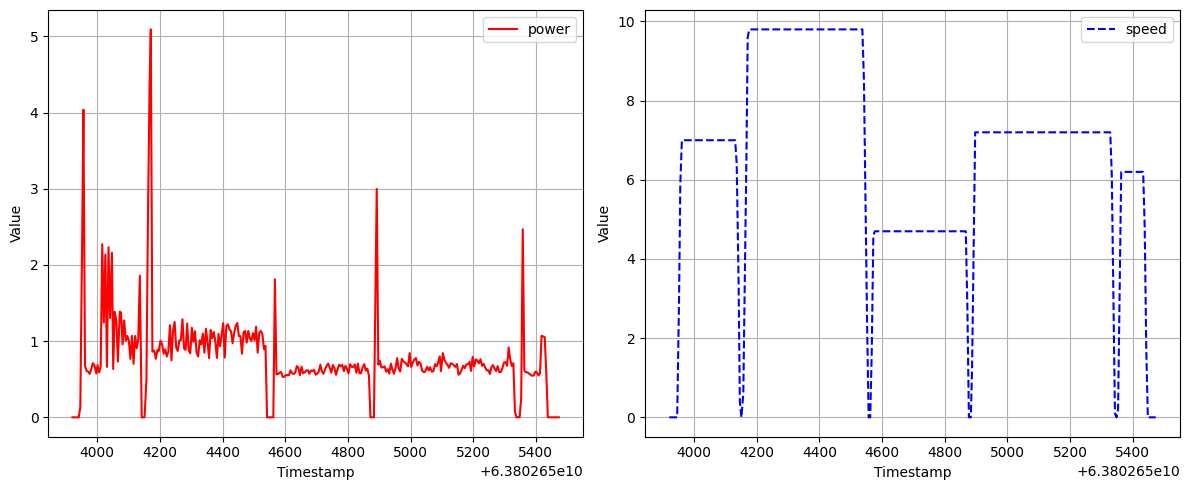

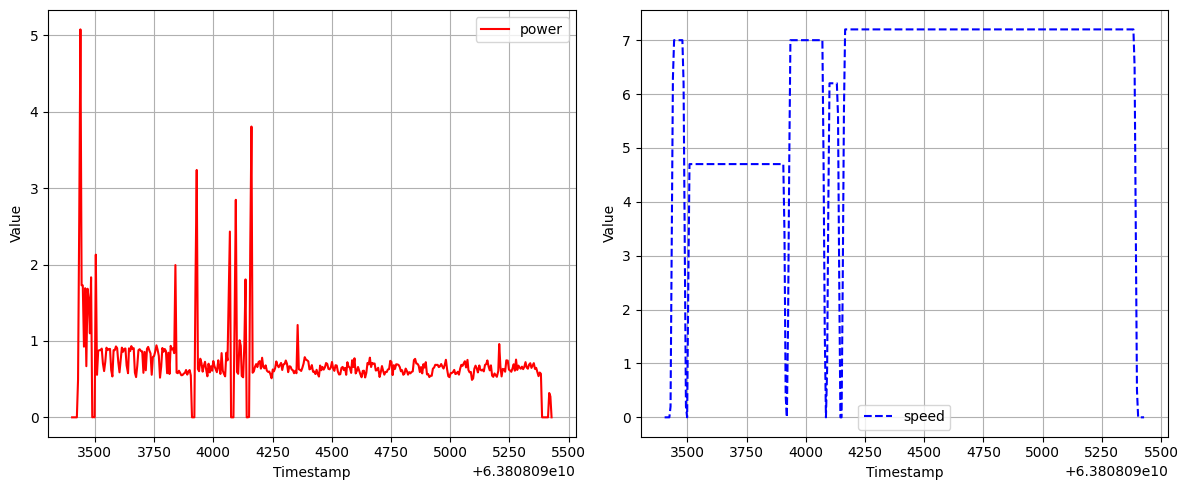

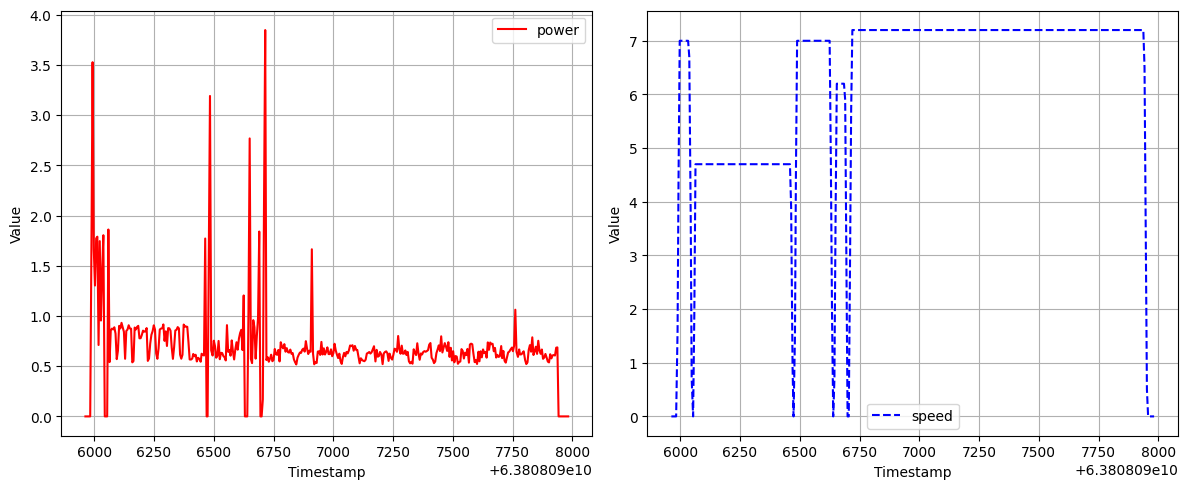

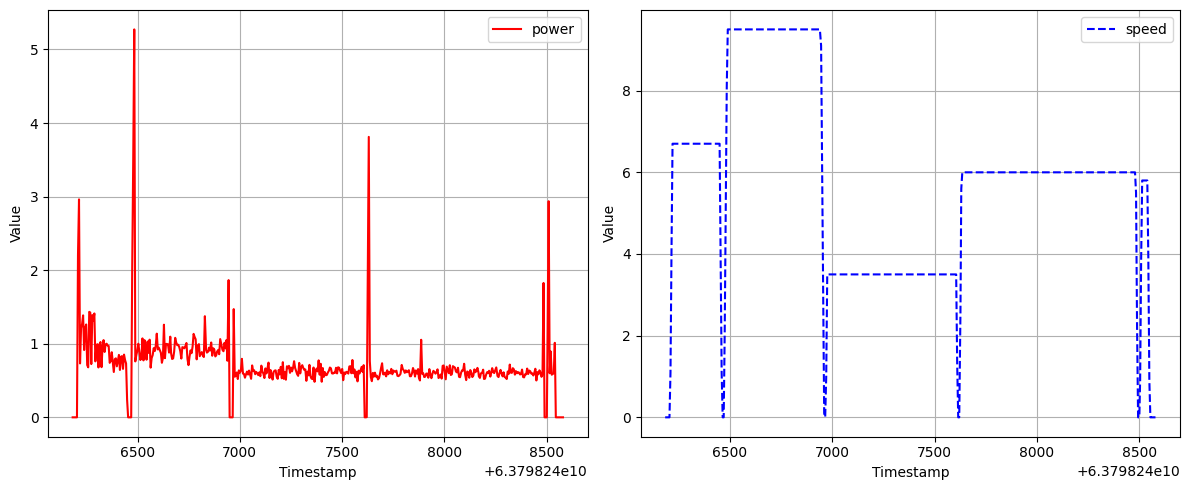

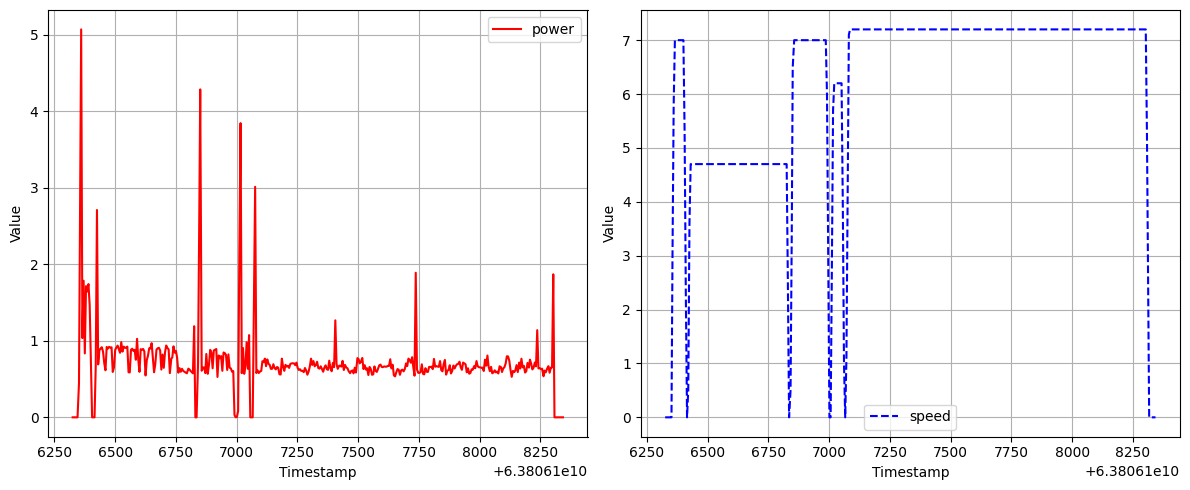

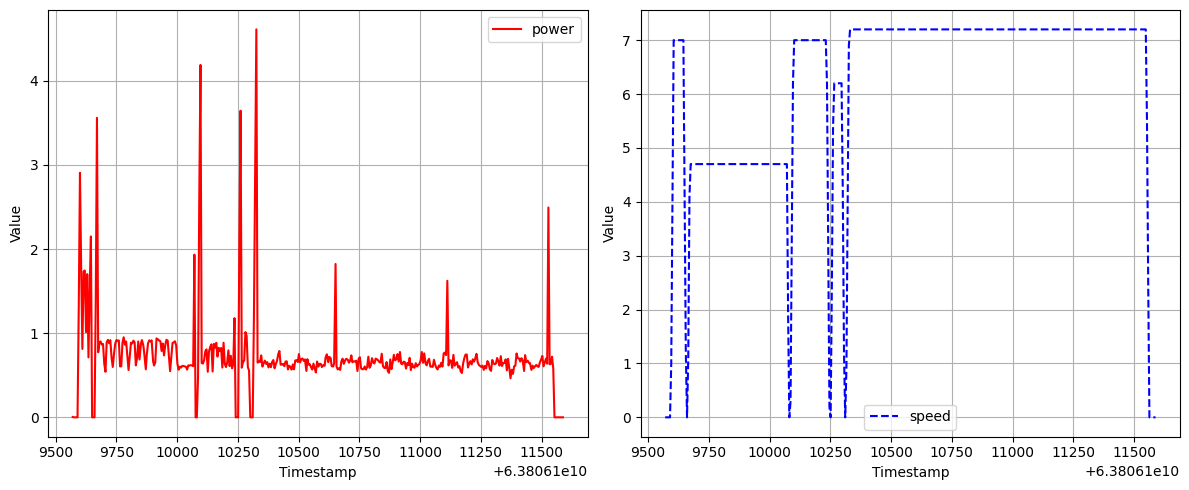

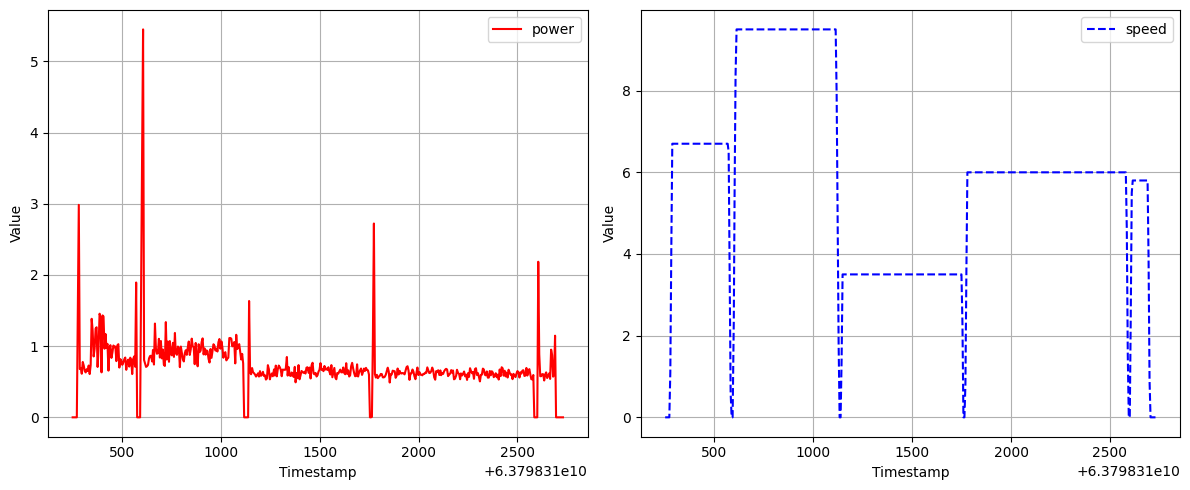

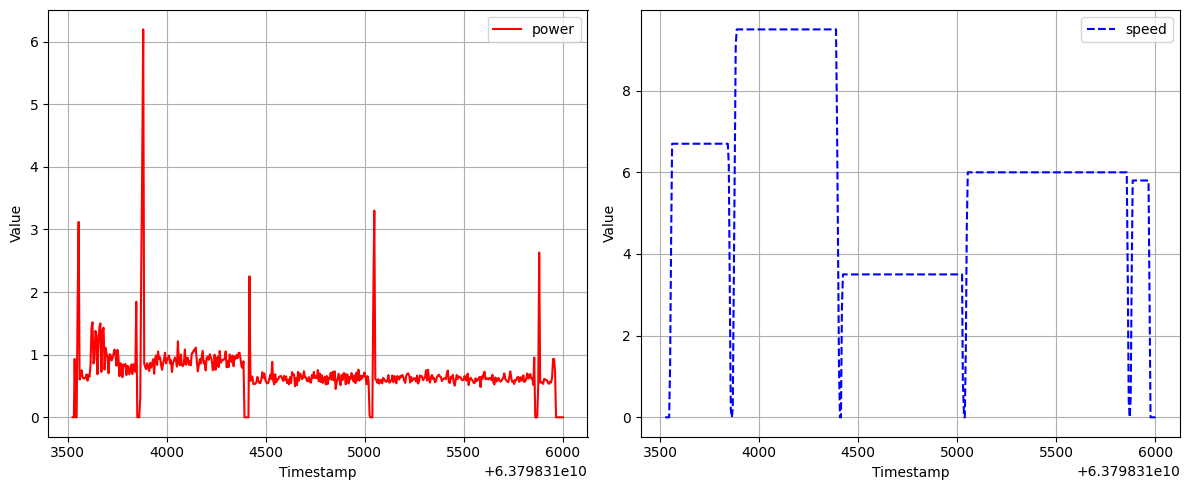

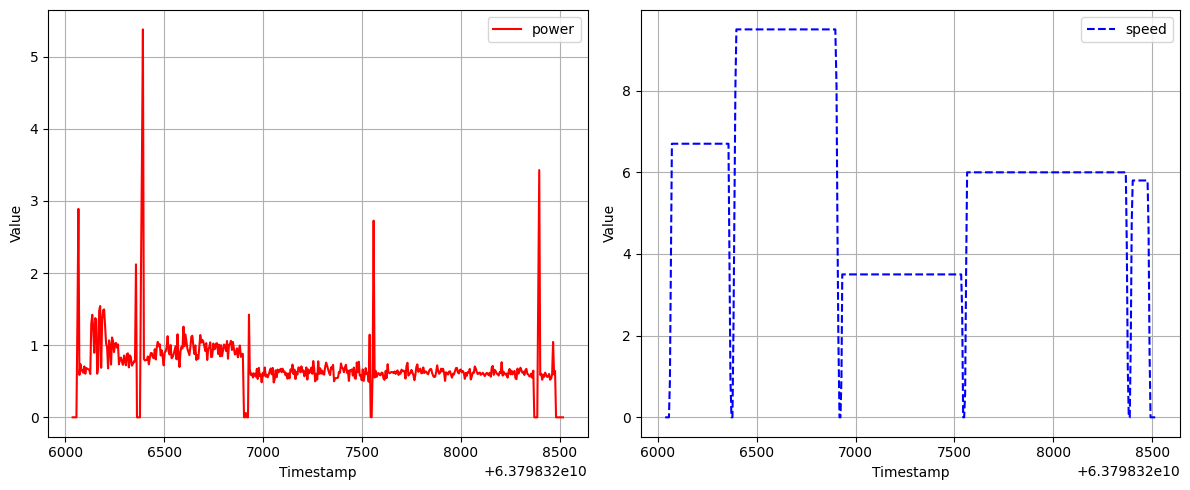

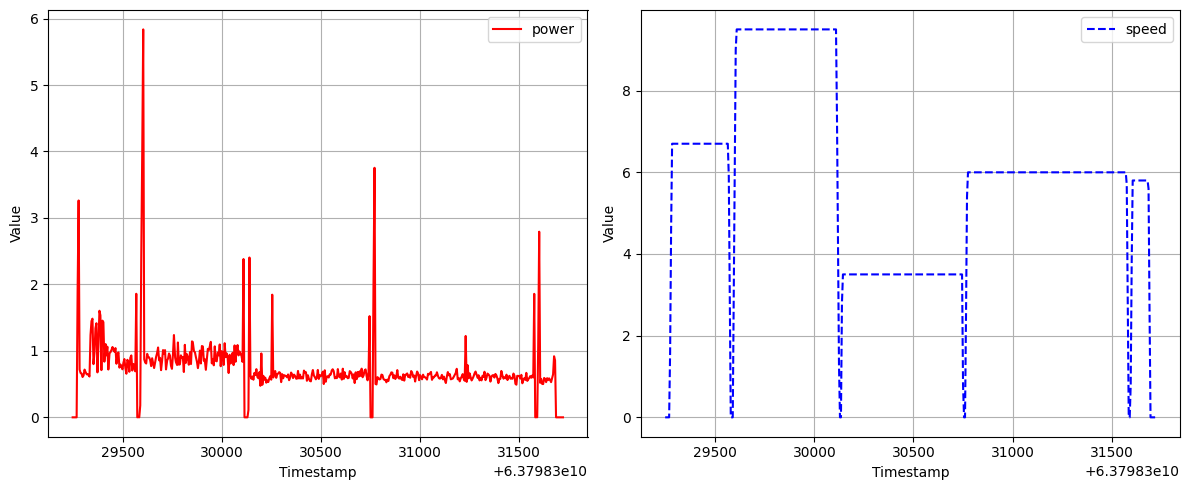

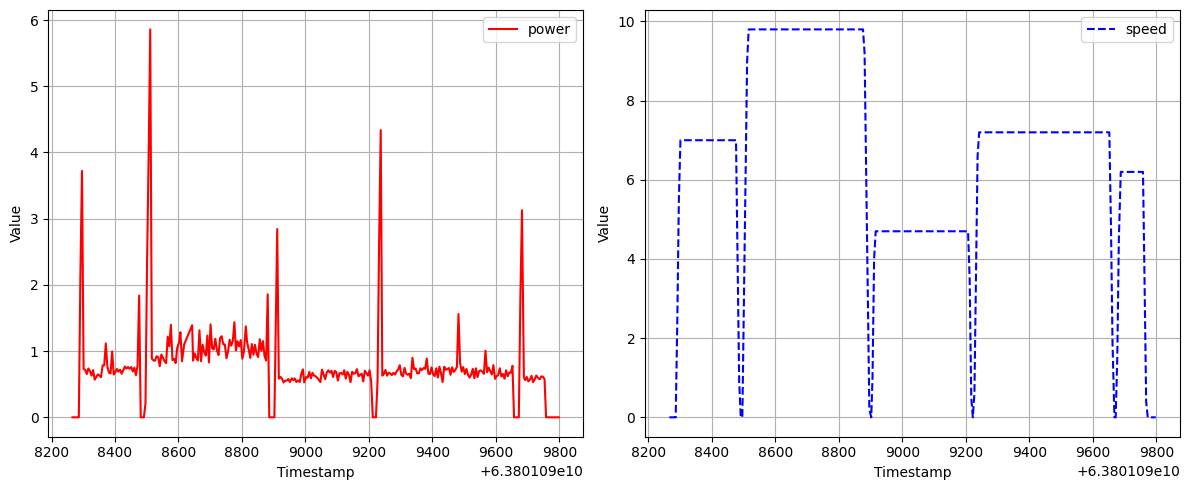

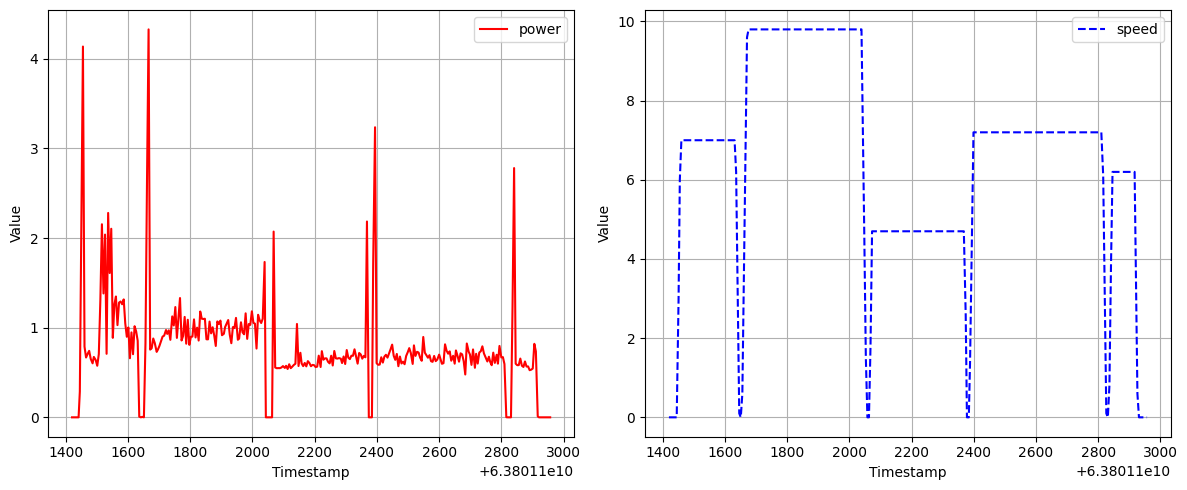

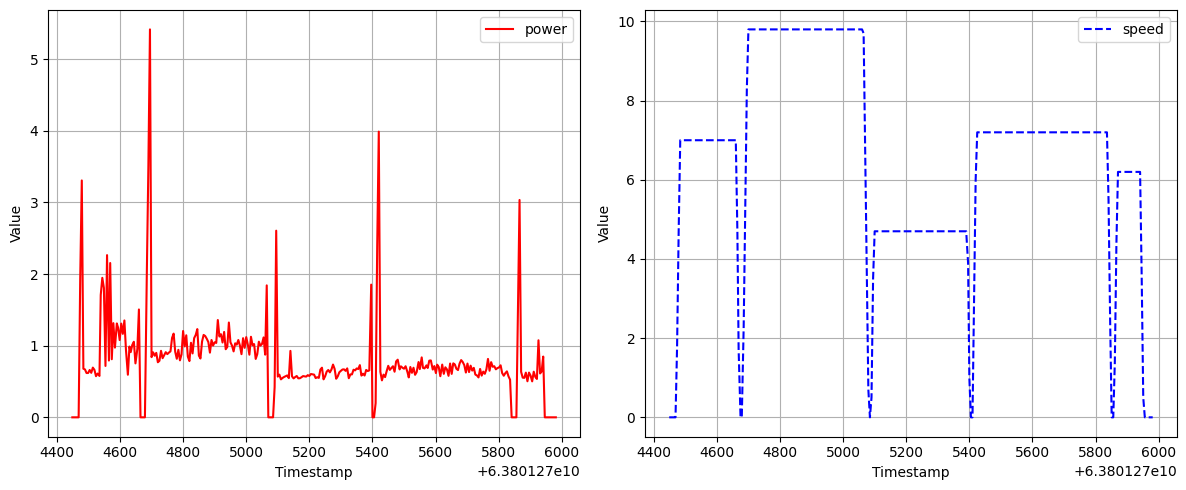

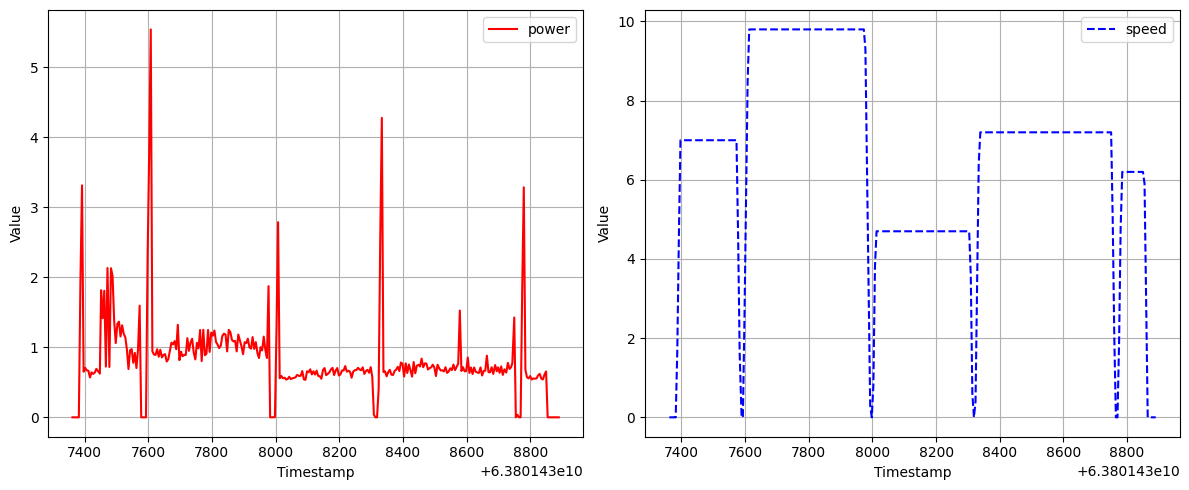

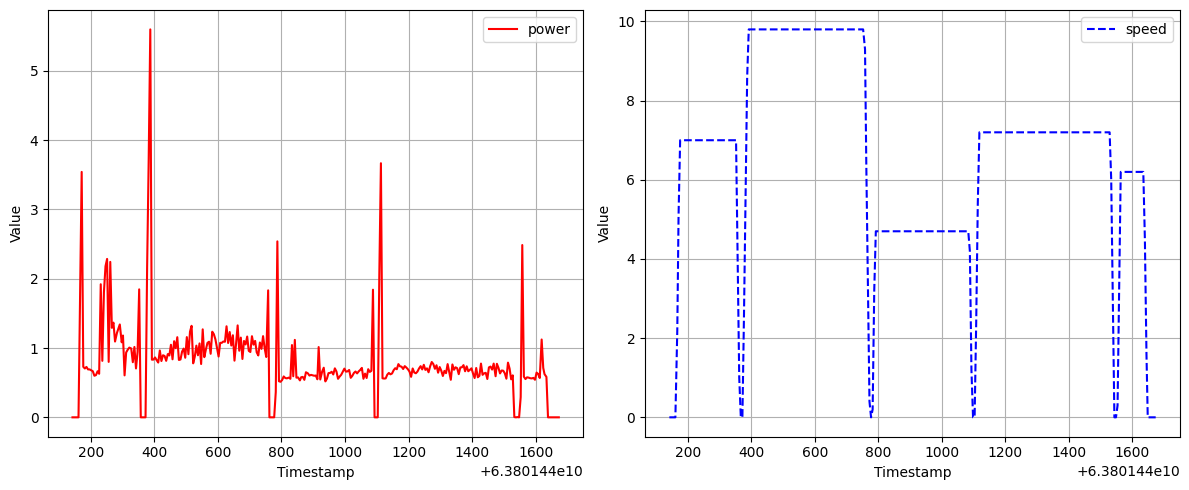

In [ ]:
power_datas = []
speed_datas = []
ts = []

for dp in data_paths:
  pd, sd, t = generateData(dp)
  power_datas.append(pd)
  speed_datas.append(sd)
  ts.append(t)

In [ ]:
print(power_datas[0].shape)

(311,)


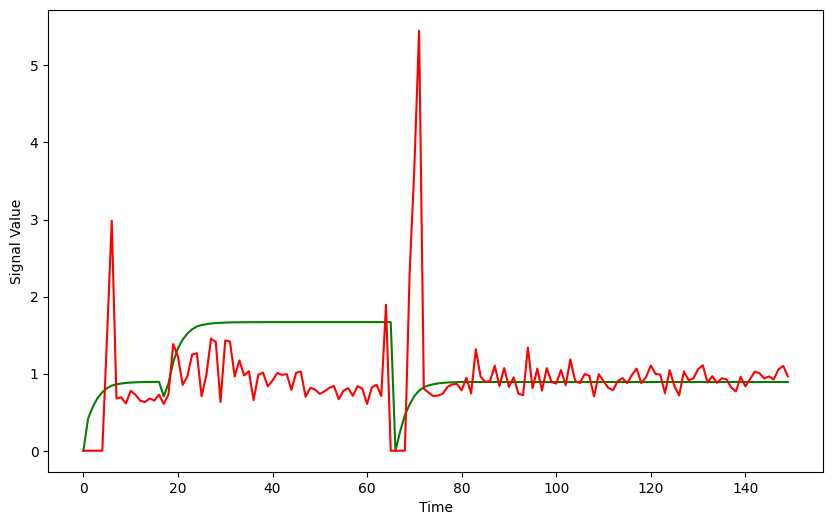

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/MADE2.csv'
data = pd.read_csv(file_path, header=None, names=['time', 'value'])
time = data['time']
values = data['value']
real = power_datas[6]
avg_model = [1] * 150


plt.figure(figsize=(10, 6))
plt.plot(list(range(len(values)))[:150], values[:150], linestyle='-',color='green')
plt.plot(list(range(len(real)))[:150], real[:150], linestyle='-',color='red')
plt.title('')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.grid(False)
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcola le statistiche
mse = mean_squared_error(real[:150], values[:150])

# Stampa i risultati
print(f"Mean Squared Error (MSE): {mse:.17f}")
avg_model
print("------------------")
real_nopeeks = np.array(real)
real_nopeeks[real_nopeeks > 2] = 1

# Calcola le statistiche
mse = mean_squared_error(real_nopeeks[:150], values[:150])
#mse = mean_squared_error(real_nopeeks[:150], avg_model)

# Stampa i risultati
print(f"Mean Squared Error (MSE): {mse:.17}")


Mean Squared Error (MSE): 0.32139897841192006
------------------
Mean Squared Error (MSE): 0.21567854295480895


In [ ]:
train_speed = []
train_power = []
test_speed = []
test_power = []

for i in range(0,len(speed_datas)):
  if i == 1 or i == 2 or i == 4 or i == 5 or i == 7:
    test_speed.append(speed_datas[i])
    test_power.append(power_datas[i])
  else:
    train_speed.append(speed_datas[i])
    train_power.append(power_datas[i])

In [ ]:
print(len(train_speed))

10


In [ ]:
combined_speed_data = []
combined_power_data = []
for st,pt in zip(train_speed, train_power):
  combined_speed_data = np.concatenate((combined_speed_data, st), axis=0)
  combined_power_data = np.concatenate((combined_power_data, pt), axis=0)
combined_power_data = combined_power_data.reshape(-1,1)
combined_speed_data = combined_speed_data.reshape(-1,1)
print(combined_speed_data.shape)

(3808, 1)


In [ ]:
model_simple = ps.SINDy(feature_library =ps.PolynomialLibrary(degree=2), differentiation_method=SINDyDerivative(kind="trend_filtered"), optimizer=ps.SR3(threshold=0.0001, thresholder="l1", normalize_columns=True), feature_names = ['P', 'S'], discrete_time=True)


model_simple.fit(combined_power_data, u=combined_speed_data)

model_simple.print()

(P)[k+1] = 0.418 1 + 1.498 P[k] + -0.169 S[k] + -0.042 P[k]^2 + -0.147 P[k] S[k] + 0.023 S[k]^2


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


0.2740183587284308


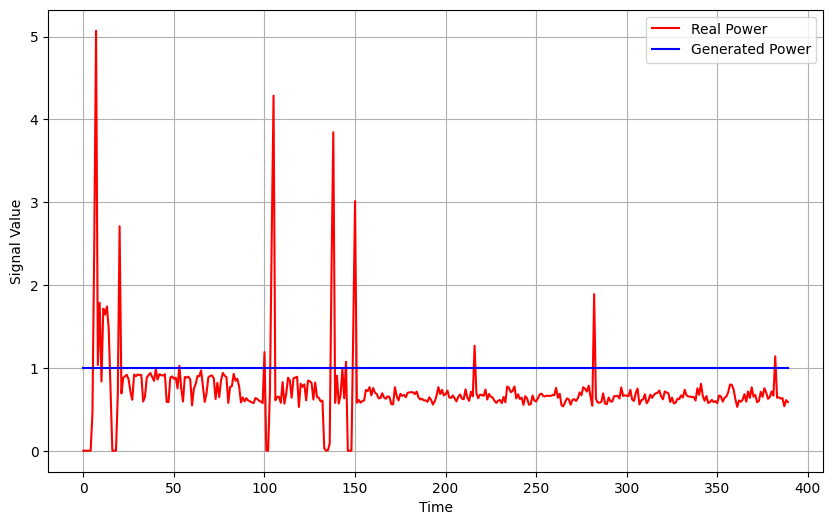

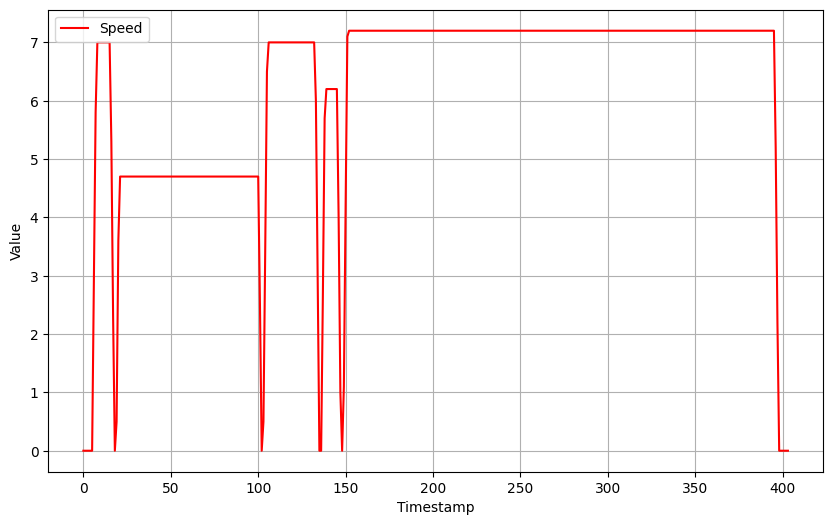

In [ ]:
def calcola_P(pk, sk): #overstima
    return (
        0.506 +
        2.211 * pk +
        -0.276 * sk +
        -0.153 * (pk ** 2) +
        -0.238 * pk * sk +
        0.037 * (sk ** 2)
    )

elem = 2
St = [1000, 4000, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700]
S = [s/1000 for s in St]
generatedPower = []
prevP = test_power[elem][0]
for s in test_speed[elem]:
#for s in S:
  generatedPower.append(prevP)
  newP = calcola_P(prevP, s)
  prevP = newP


avg_model = [1] * 390
print(mean_squared_error(avg_model,test_power[elem][:390]))
plt.figure(figsize=(10, 6))
plt.plot(test_power[elem][:390], color='r', label='Real Power')
plt.plot(avg_model, color='b', label='Generated Power')
plt.title('')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.plot(test_speed[elem], color='r', label='Speed')
plt.title('')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

0.08205659669543602


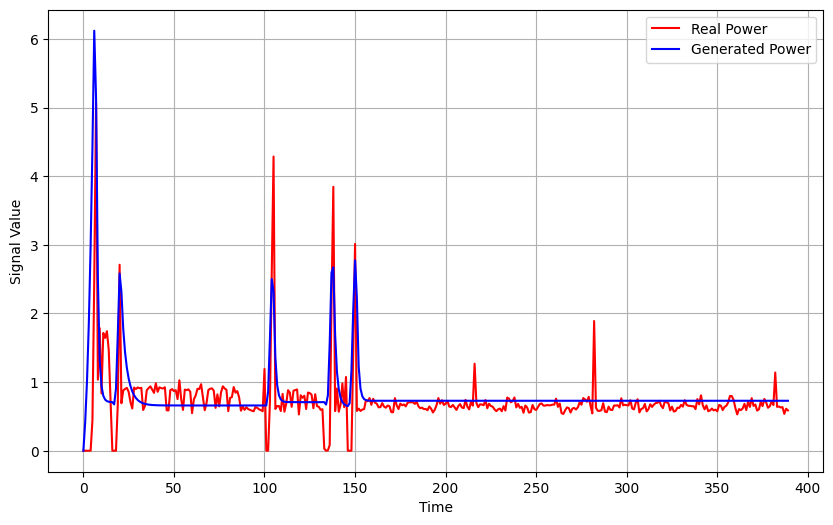

In [ ]:
def calcola_P(pk, sk):
    return (
        0.417 +
        1.450 * pk +
        -0.163 * sk +
        -0.036 * (pk ** 2) +
        -0.142 * pk * sk +
        0.023 * (sk ** 2)
    )


elem = 2

generatedPower = []
prevP = test_power[elem][0]
for s in test_speed[elem]:
  generatedPower.append(prevP)
  newP = calcola_P(prevP, s)
  prevP = newP
print(mean_squared_error(test_power[elem][20:390], generatedPower[20:390]))
plt.figure(figsize=(10, 6))
plt.plot(test_power[elem][:390], color='r', label='Real Power')
plt.plot(generatedPower[:390], color='b', label='Generated Power')
plt.title('')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)

In [ ]:
prediction_model = []
for pt,st in zip(test_power, test_speed):
  pt = pt.reshape(-1,1)
  st = st.reshape(-1,1)
  power_test_predicted = model_simple.predict(pt,u=st)
  print("MSE: " + str(mean_squared_error(power_test_predicted[:,0], pt)))
  prediction_model.append(power_test_predicted)

MSE: 0.15047298152869001
MSE: 0.07473447579010824
MSE: 0.05397780169436542
MSE: 0.04565852316580627
MSE: 0.060770366891451
MSE: 0.06675799199937024
MSE: 0.14595890191607774
MSE: 0.11298021630088834
MSE: 0.12857794112906587
MSE: 0.14710529181293452
MSE: 0.1170773535360755


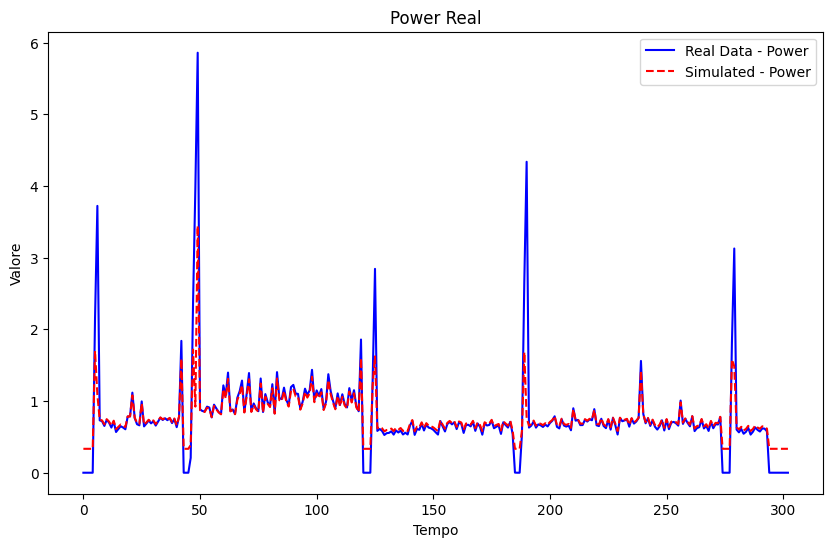

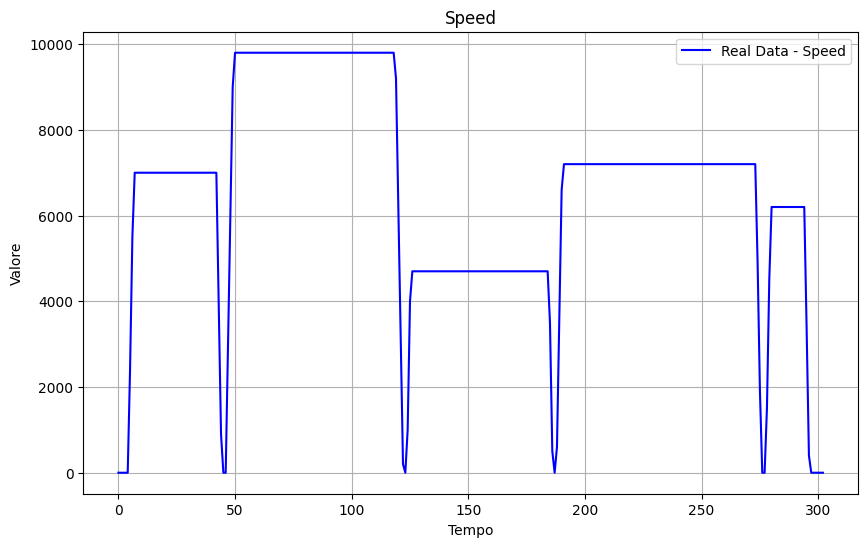

0.14595890191607774


In [ ]:
elem = 6 # Elemento di test casuale
t_end_test = len(test_power[elem])
t_test = np.arange(0, t_end_test, 1)
plot_versus_features(test_power[elem], test_speed[elem], t_test, prediction_model[elem])
print(mean_squared_error(test_power[elem],  prediction_model[elem] ))

In [ ]:
prediction_model = []
for pt,st in zip(test_power, test_speed):
  power_test_predicted = model_simple.simulate(0,len(st),st)
  print("MSE: " + str(mean_squared_error(power_test_predicted, pt)))
  prediction_model.append(power_test_predicted)

MSE: 0.30460337315747565
MSE: 0.18592399591959355
MSE: 0.15938815797425376
MSE: 0.19550124654960815
MSE: 0.1671603665488827
MSE: 0.20928904679166876
MSE: 0.3494400697864757
MSE: 0.2673979454168446
MSE: 0.31550694475017843
MSE: 0.345080797402575
MSE: 0.32330742294178105


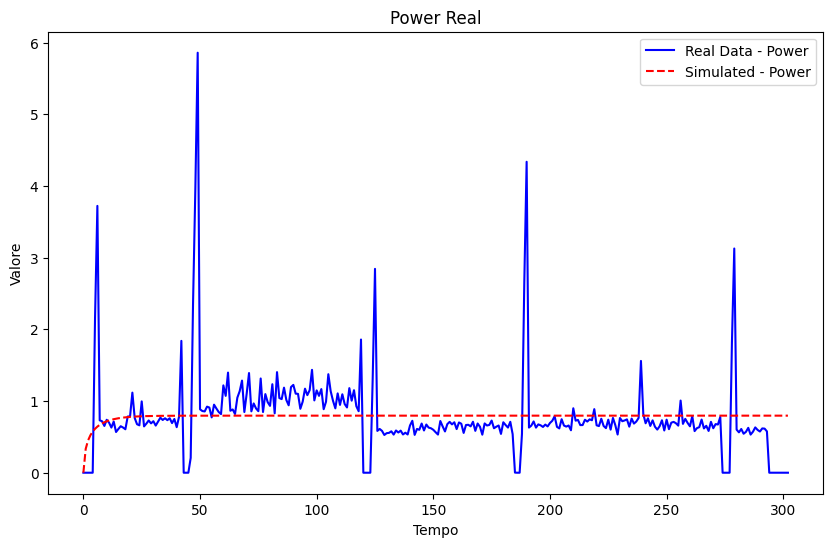

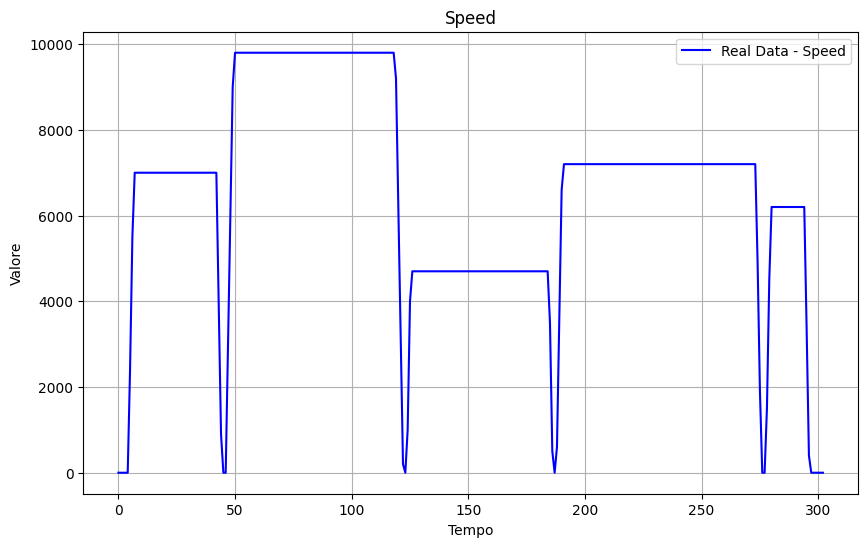

0.3494400697864757


In [ ]:
t_end_test = len(test_power[elem])
t_test = np.arange(0, t_end_test, 1)
plot_versus_features(test_power[elem], test_speed[elem], t_test, prediction_model[elem])
print(mean_squared_error(test_power[elem],  prediction_model[elem] ))

##PySindy Segment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import pysindy as ps
from pysindy import SINDy, SINDyDerivative
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pysindy import SINDy

In [ ]:
event_segments = []
speed_segments = []
power_segments = []
event_symbol = []

for data_path in data_paths:
  new_signals: List[SampledSignal] = parse_data(data_path)
  chg_pts = energy_made_cs.find_chg_pts([sig for sig in new_signals if sig.label in DRIVER_SIG])
  power_pts = new_signals[0].points
  power_values = [pt.value for pt in power_pts]
  speed_pts = new_signals[1].points
  speed_values = [st.value for st in speed_pts]
  id_events = [label_event(events, new_signals, pt.t) for pt in chg_pts[:10]]
  energy_made_cs.process_data(data_path)
  trace = energy_made_cs.timed_traces[-1]
  '''kf = KalmanFilter(transition_matrices=[1],
                observation_matrices=[1],
                initial_state_mean=power_values[0],
                initial_state_covariance=1,
                observation_covariance=1,
                transition_covariance=0.01)   # Aumenta la covarianza di transizione
  smoothed_power_kalman, _ = kf.filter(power_values)
  for i, pt in enumerate(power_pts):
        if power_values[i] < 0.5:
            smoothed_power_kalman[i] = 0

  smoothed_power_kalmanvv1, _ = kf.filter(smoothed_power_kalman)
  smoothed_power_kalmanvv2, _ = kf.filter(smoothed_power_kalmanvv1)
  smoothed_power_kalmanvv3, _ = kf.filter(smoothed_power_kalmanvv2)
  smoothed_power_kalmanvv4, _ = kf.filter(smoothed_power_kalmanvv3)
  for i, pt in enumerate(power_pts):
      if power_values[i] < 0.5 and speed_values[i] < 0.5:
          smoothed_power_kalmanvv4[i] = 0

  for i, pt in enumerate(power_pts):
    pt.value = smoothed_power_kalmanvv4[i]'''

  for i in range(1, len(chg_pts) - 1):
      cp_start = chg_pts[i]
      cp_end = chg_pts[i + 1]
      event = label_event(events, new_signals, cp_start.t)

      event_start_timestamp = cp_start.t
      event_end_timestamp = cp_end.t
      speed_segment = np.array([pt.value/1000 for pt in speed_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]).ravel()
      power_segment = np.array([pt.value for pt in power_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]).ravel()

      speed_segment_timestamp = [pt for pt in speed_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]
      power_segment_timestamp = [pt for pt in power_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]
      event_segments.append((event.label, event.symbol, speed_segment_timestamp, power_segment_timestamp))
      speed_segments.append(speed_segment)
      power_segments.append(power_segment)
      event_symbol.append(event.symbol)

In [ ]:
max_length = max(max(len(segment) for segment in speed_segments),
                 max(len(segment) for segment in power_segments))
def pad_sequences(sequences, max_length):
    padded_sequences = []
    for sequence in sequences:
        num_zeros = max_length - len(sequence)
        padded_sequence = np.pad(sequence, (0, num_zeros), 'constant')
        padded_sequences.append(padded_sequence)
    return padded_sequences


speed_segments_padded = pad_sequences(speed_segments, max_length)
power_segments_padded = pad_sequences(power_segments, max_length)

speed_data = np.array(speed_segments_padded)
power_data = np.array(power_segments_padded)


print("Speed data shape: "+str(speed_data.shape))
print("Power data shape: "+str(power_data.shape))

Speed data shape: (150, 247)
Power data shape: (150, 247)


In [ ]:
from collections import Counter
counters = Counter(event_symbol)
listCounter = list(counters.items())
print(listCounter)

[('m_69', 14), ('i_0', 75), ('m_97', 6), ('m_46', 10), ('m_71', 10), ('m_61', 10), ('m_66', 5), ('m_94', 5), ('m_34', 5), ('m_59', 5), ('m_57', 5)]


In [ ]:
noRepetitions = list(set(event_symbol))
print(noRepetitions)

['m_59', 'm_94', 'm_69', 'm_71', 'i_0', 'm_66', 'm_34', 'm_57', 'm_46', 'm_97', 'm_61']


m_69


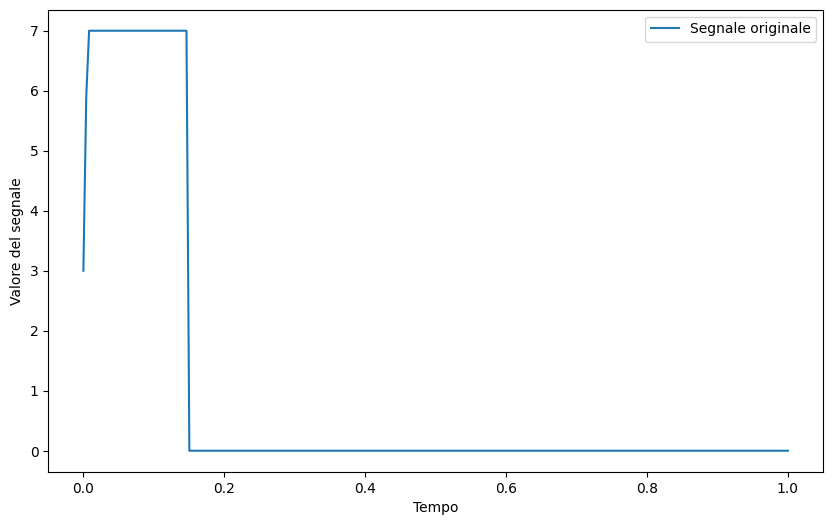

i_0


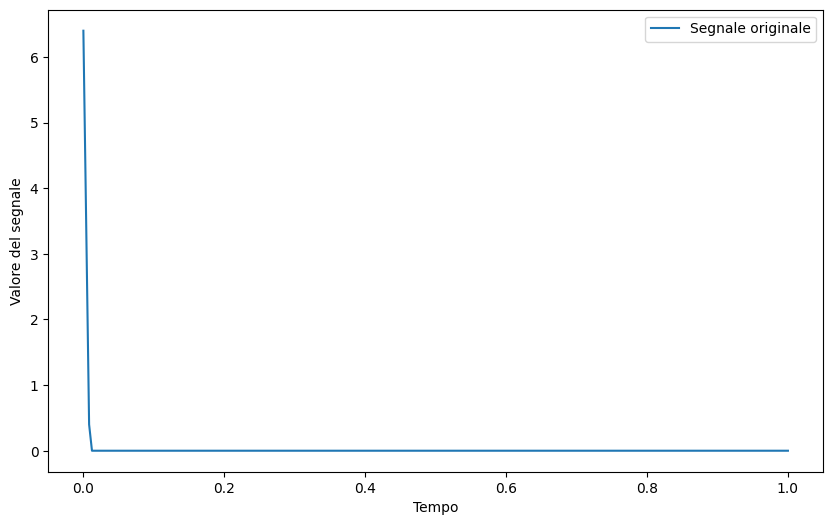

m_97


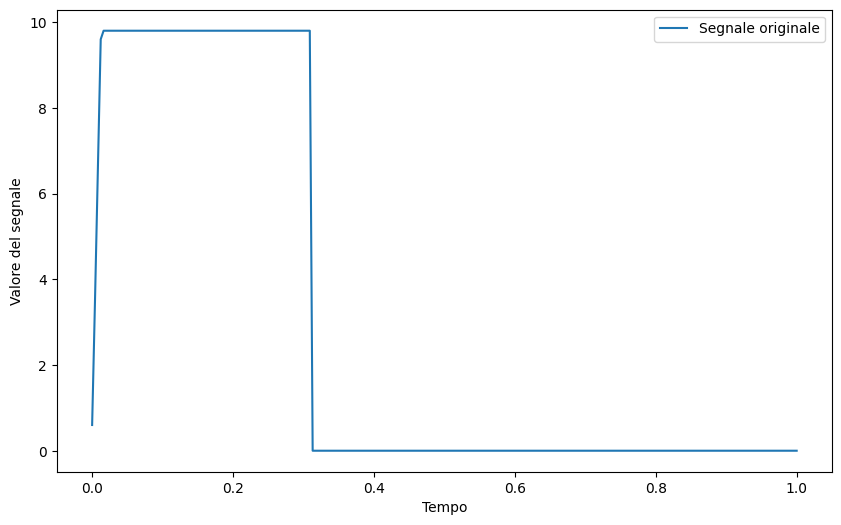

m_46


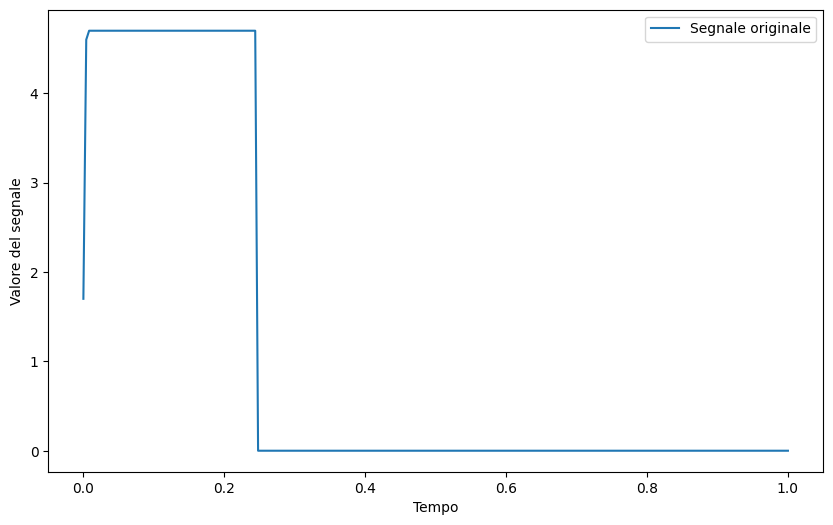

m_71


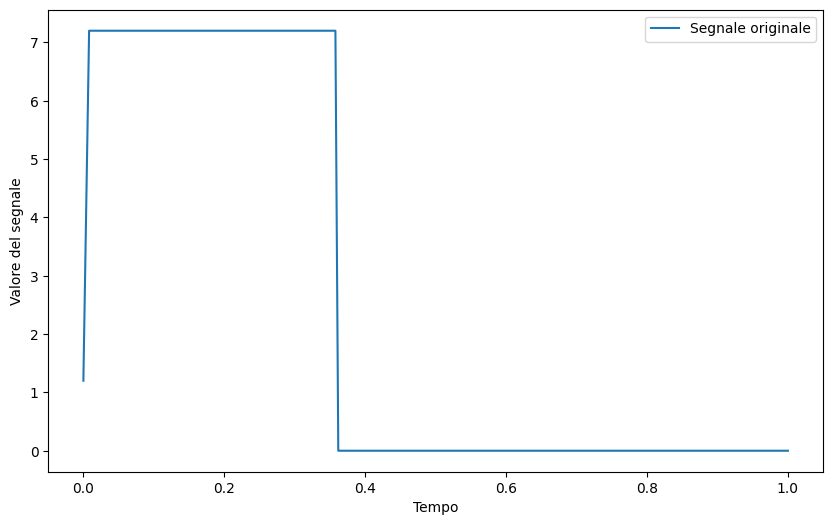

m_61


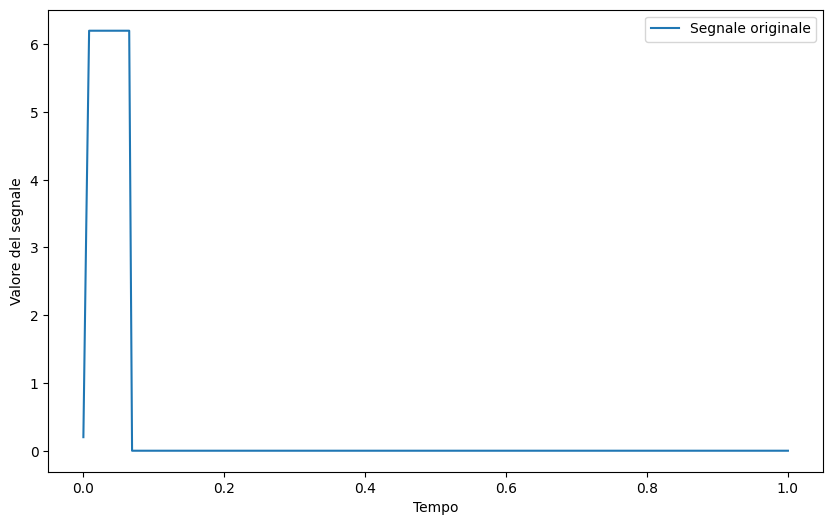

m_66


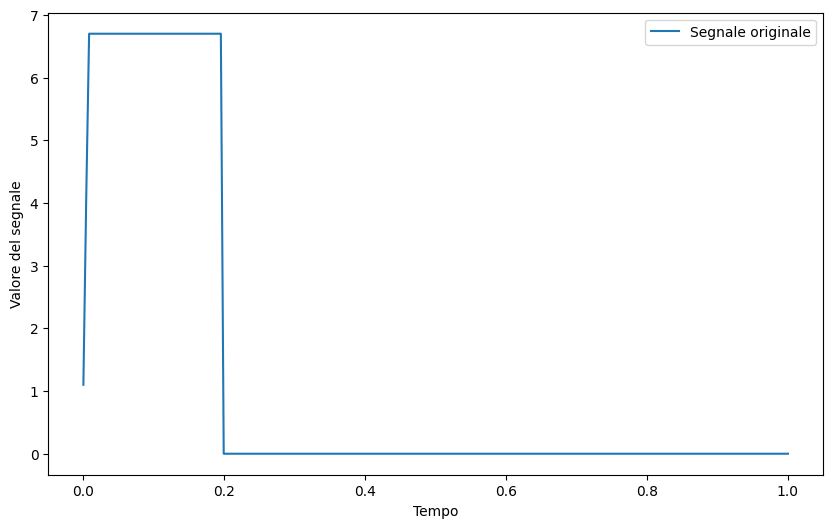

m_94


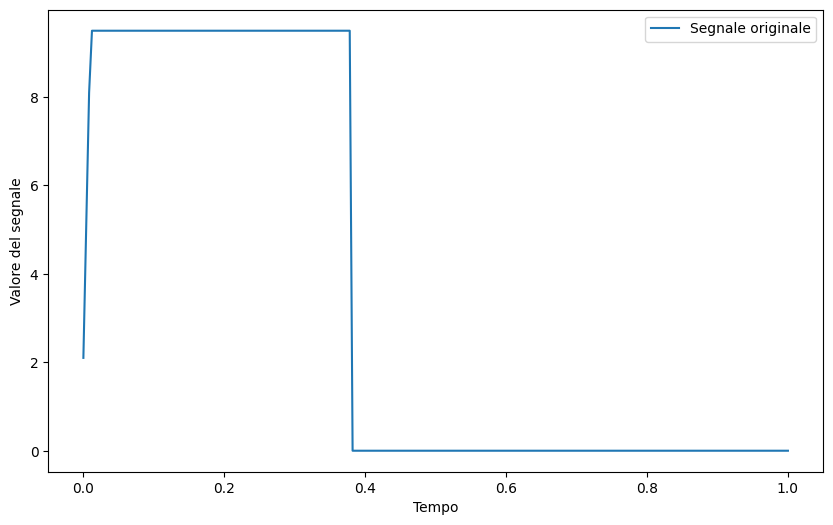

m_34


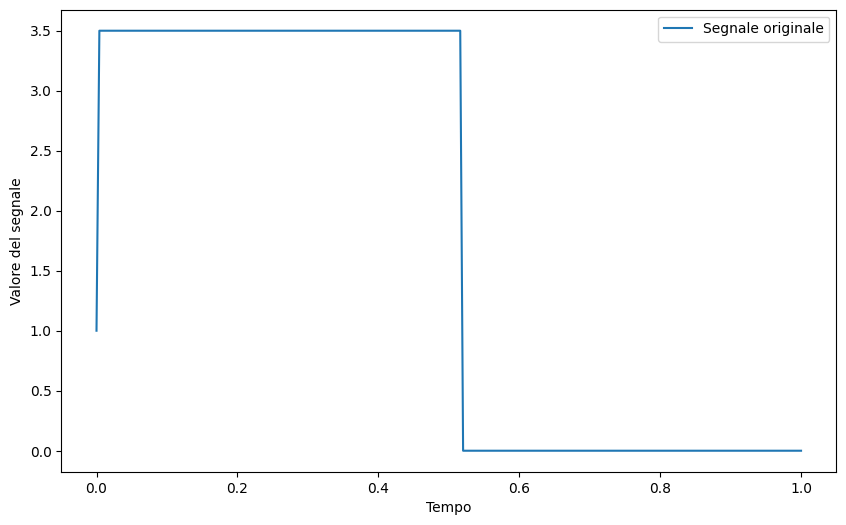

m_59


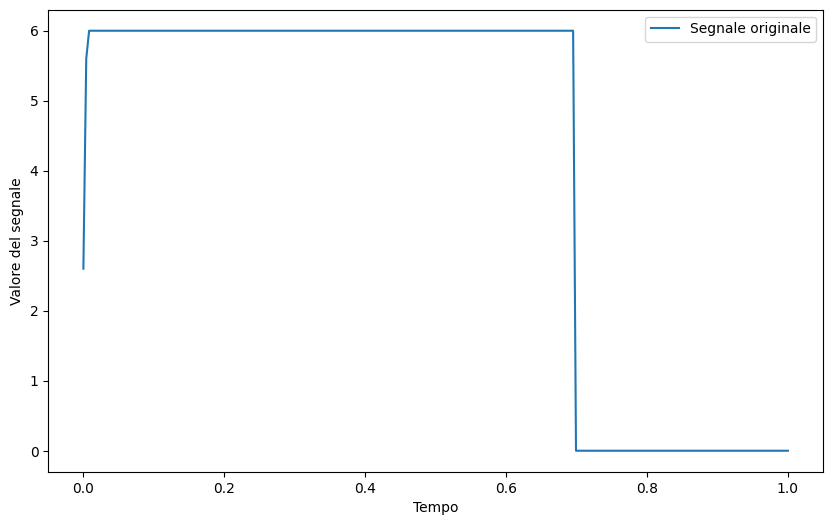

m_57


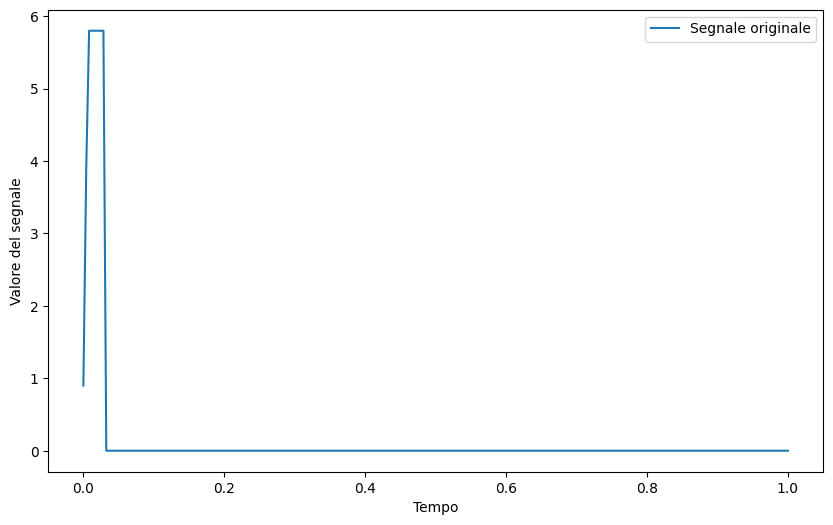

In [ ]:
k = 0
for i, val in enumerate(speed_data):
    pd = speed_data[i]
    x = np.linspace(0, 1, len(pd))
    e = event_symbol[i]

    if e in noRepetitions:
      k = k + 1
      print(e)
      plt.figure(figsize=(10, 6))
      plt.plot(x, pd, label='Segnale originale')
      plt.xlabel('Tempo')
      plt.ylabel('Valore del segnale')
      plt.legend()
      plt.show()
      noRepetitions.remove(e)
noRepetitions = list(set(event_symbol))

In [ ]:
speed_train_data = []
power_train_data = []
for i,val in enumerate(event_symbol):
  if val == "m_69" or val == "m_61" or val == "m_46" or  val == "m_71":
    speed_train_data.append(speed_data[i])
    power_train_data.append(power_data[i])

print(len(power_train_data))

speed_test_data = []
power_test_data = []
test_symbol = []
for i,val in enumerate(event_symbol):
  if val != "m_69" and val != "m_61" and val != "m_46" and  val != "m_71":
    speed_test_data.append(speed_data[i])
    power_test_data.append(power_data[i])
    test_symbol.append(event_symbol[i])
print(len(power_test_data))

44
106


In [ ]:
combined_speed_train_data = []
combined_power_train_data = []
for st,pt in zip(speed_train_data, power_train_data):
  combined_speed_train_data = np.concatenate((combined_speed_train_data, st), axis=0)
  combined_power_train_data = np.concatenate((combined_power_train_data, pt), axis=0)
combined_power_train_data = combined_power_train_data.reshape(-1,1)
combined_speed_train_data = combined_speed_train_data.reshape(-1,1)
print(combined_speed_train_data.shape)

(10868, 1)


In [ ]:
#model = ps.SINDy(optimizer = ps.STLSQ(threshold = 0.01), feature_names = ['P','S'], discrete_time=True,)
model = ps.SINDy(feature_library =ps.PolynomialLibrary(degree=2),optimizer=ps.SR3(threshold=0.0001, thresholder="l1"), feature_names = ['P', 'S'], discrete_time=True)

print(model.get_params(deep=False))

model.fit(combined_power_train_data,u=combined_speed_train_data)
model.print()

{'differentiation_method': FiniteDifference(axis=-2), 'discrete_time': True, 'feature_library': PolynomialLibrary(), 'feature_names': ['P', 'S'], 'optimizer': SR3(threshold=0.0001, thresholder='l1'), 't_default': 1}
(P)[k+1] = 0.010 1 + 2.394 P[k] + -0.160 S[k] + -0.239 P[k]^2 + -0.215 P[k] S[k] + 0.027 S[k]^2


In [ ]:
def find_zeros_index(arr):
    for i in range(len(arr)):
        if all(x == 0 for x in arr[i:]):
            return i
    return -1

def compute_power(P_k, S_k):
  return 0.010 + 2.394 * P_k - 0.160 * S_k - 0.239 * (P_k ** 2) - 0.215 * P_k * S_k + 0.027 * (S_k ** 2)

def compute_powers(prev, S):
  toret = []
  prevP = prev
  index = find_zeros_index(S)
  for i,s in enumerate(S):
    if i >= index:
      toret.append(0)
    else:
      nextP = compute_power(prevP,s)
      toret.append(nextP)
      prevP = nextP
  return toret

In [ ]:
#S = [1000, 4000, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700, 4700]

1
m_97
0.1293522417606349
0.42531058750556394


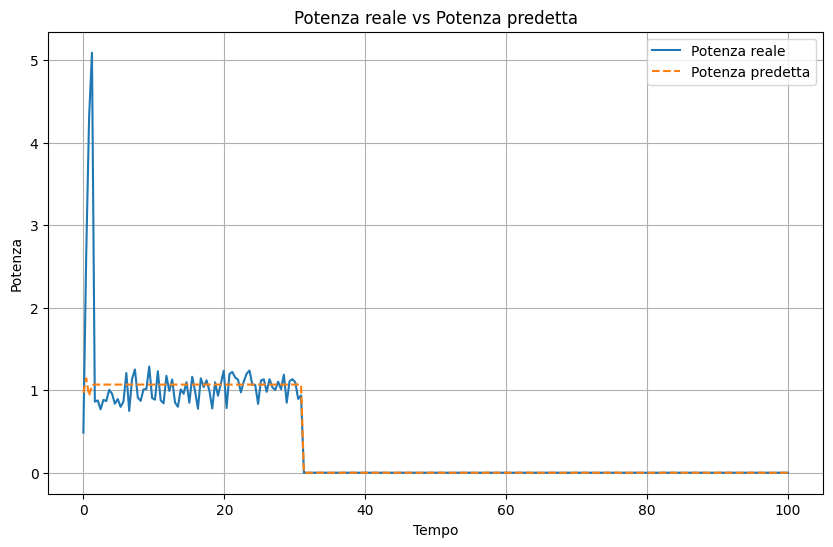

16
m_66
0.029331190553753706
0.8608397566657418


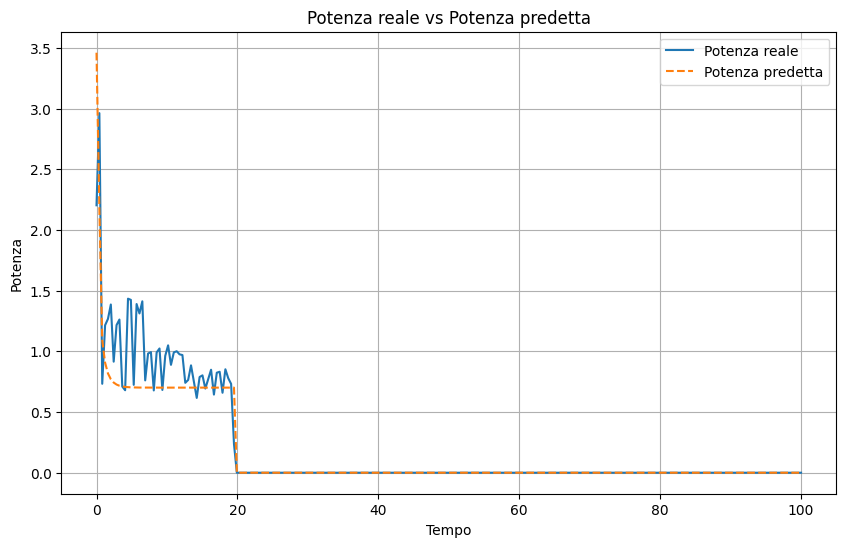

18
m_94
0.10272999113863074
0.6416667647491983


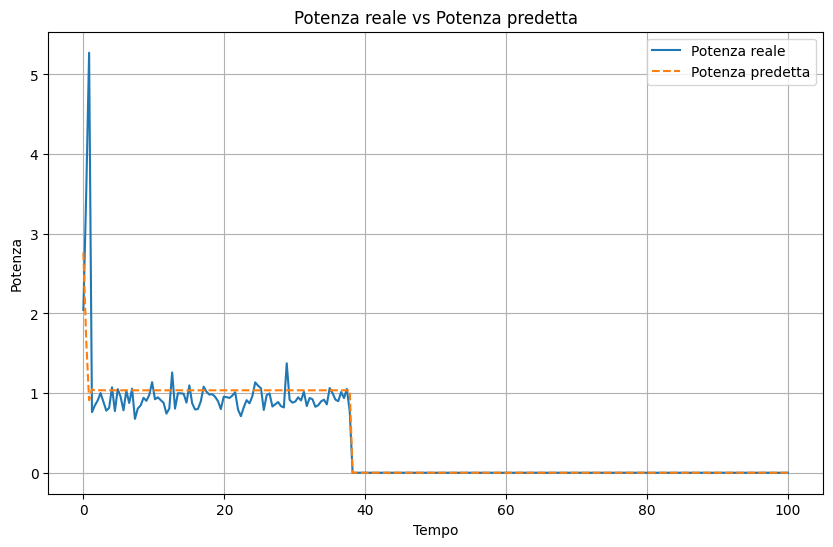

20
m_34
1.4328305129687042
0.7013275744598559


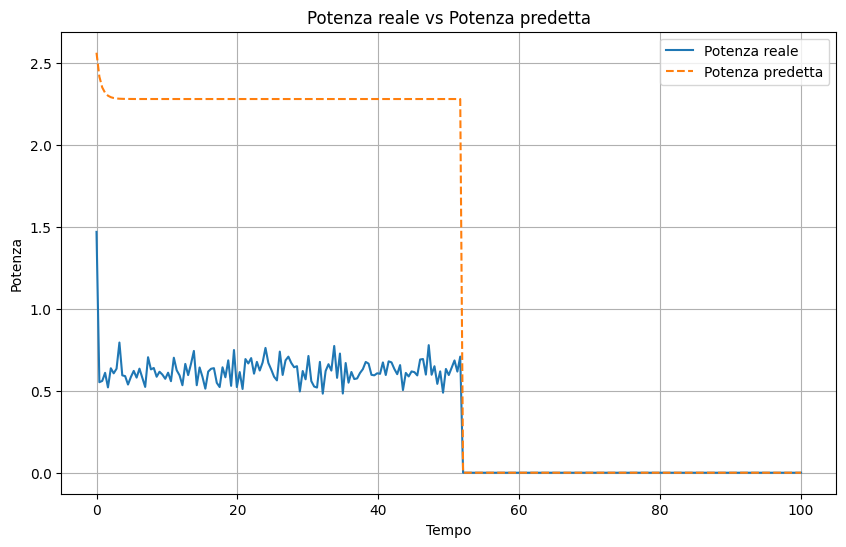

22
m_59
0.028510684797310434
0.9184405783257912


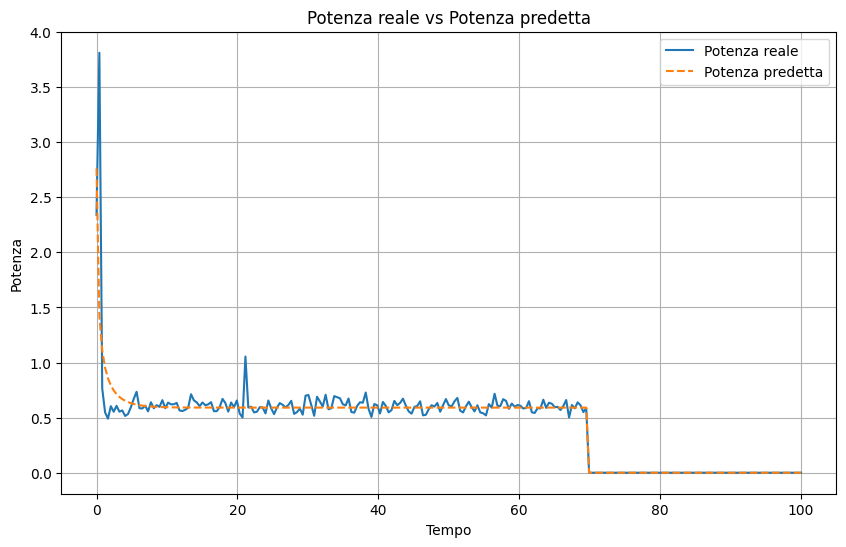

24
m_57
0.01080295639669668
0.6052966982059776


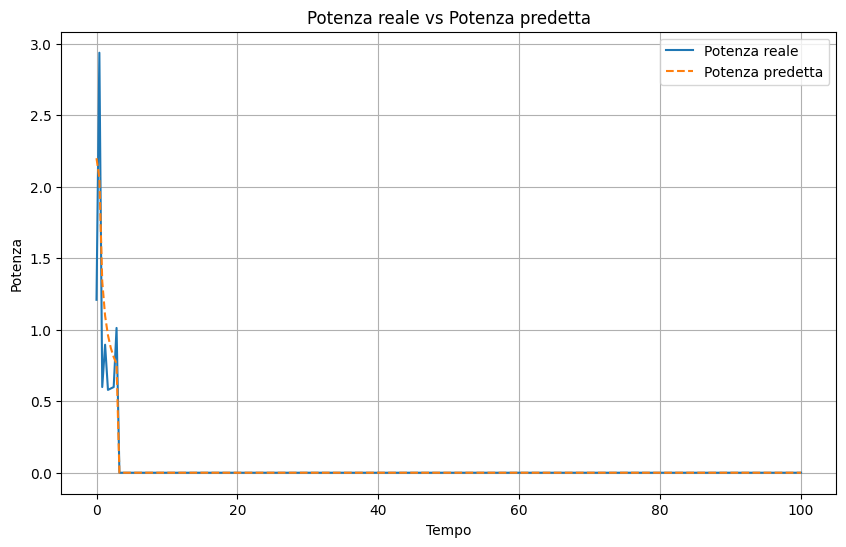

36
m_66
0.029036929308996855
0.8621927426600299


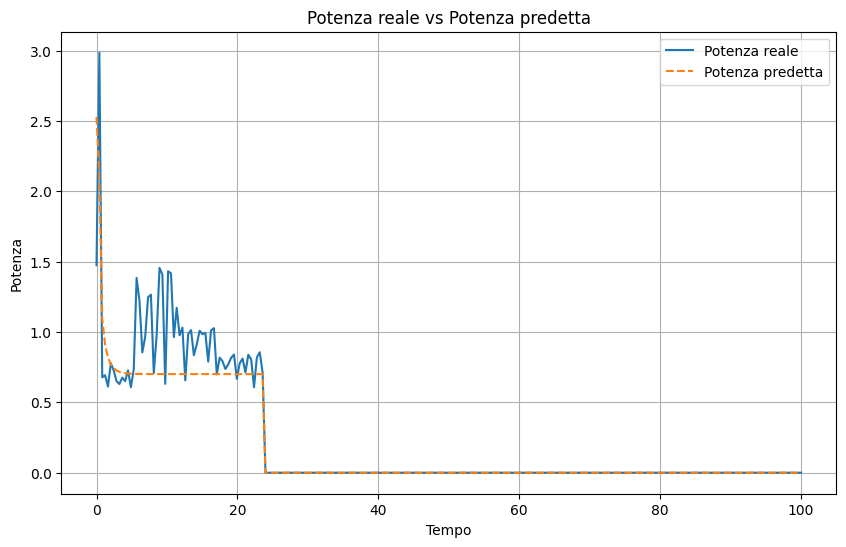

38
m_94
0.11551640340125811
0.552674419194954


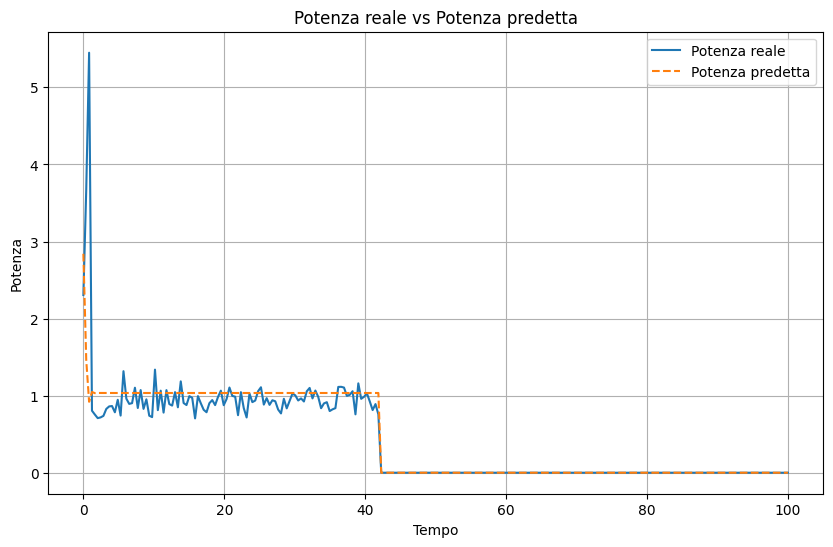

40
m_34
1.3330073825892004
0.7425959844898417


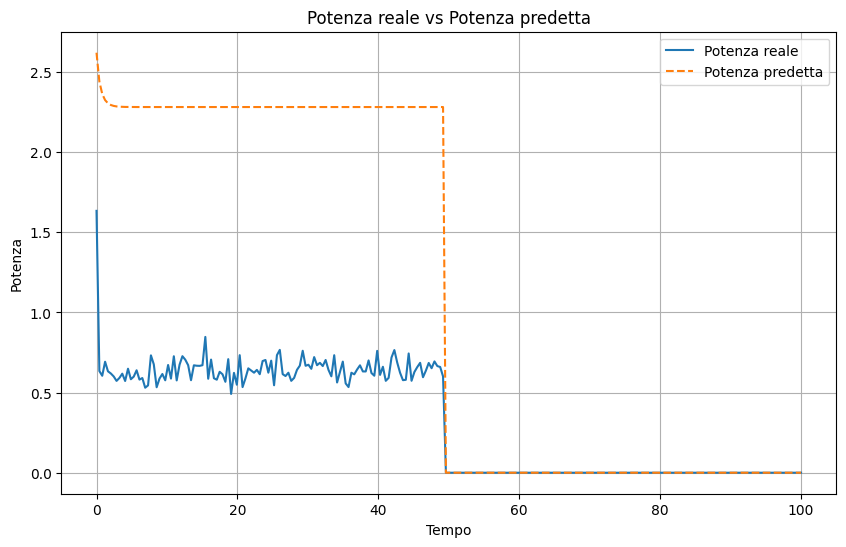

42
m_59
0.010949231381650998
0.8286843261543368


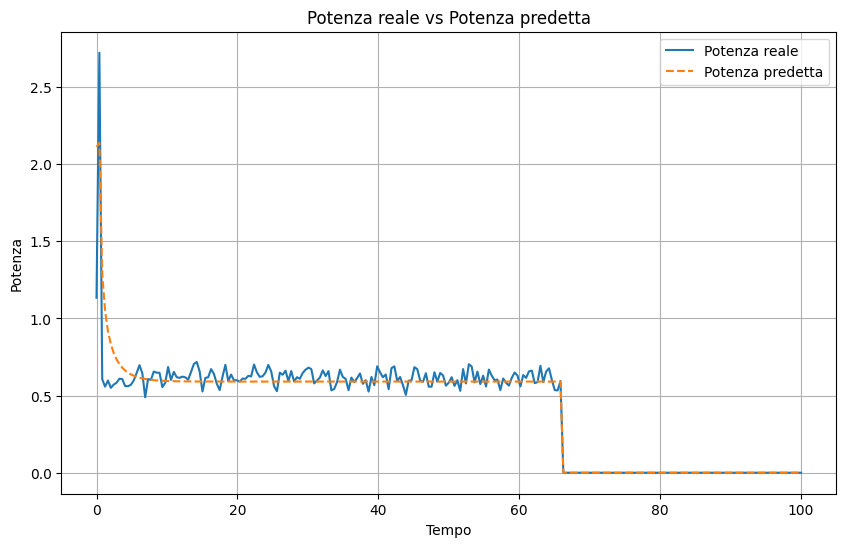

44
m_57
0.0076281147023233515
0.36326569069985415


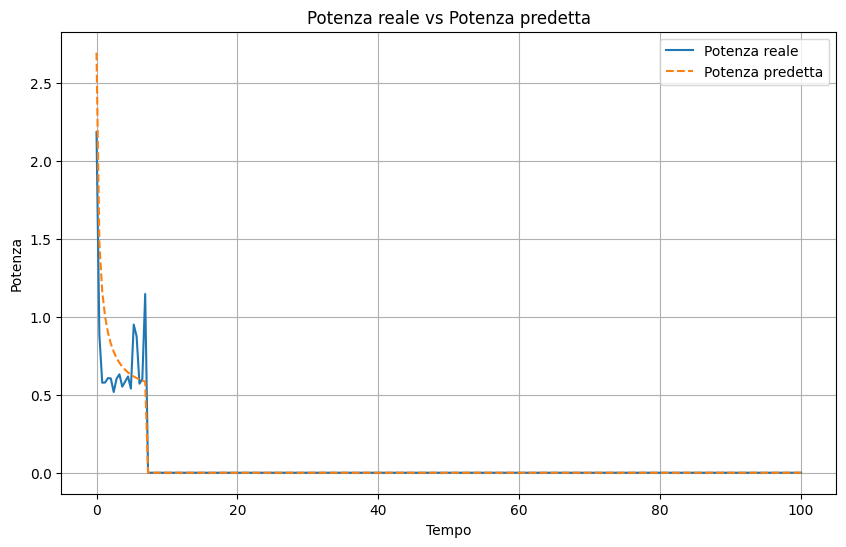

46
m_66
0.0344502303589738
0.8659510438313311


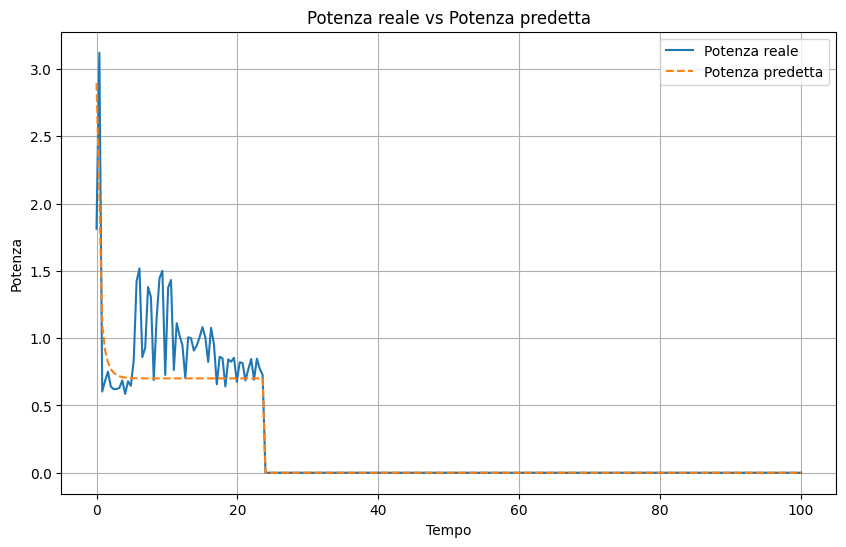

48
m_94
0.17458129959383864
0.1570063532759105


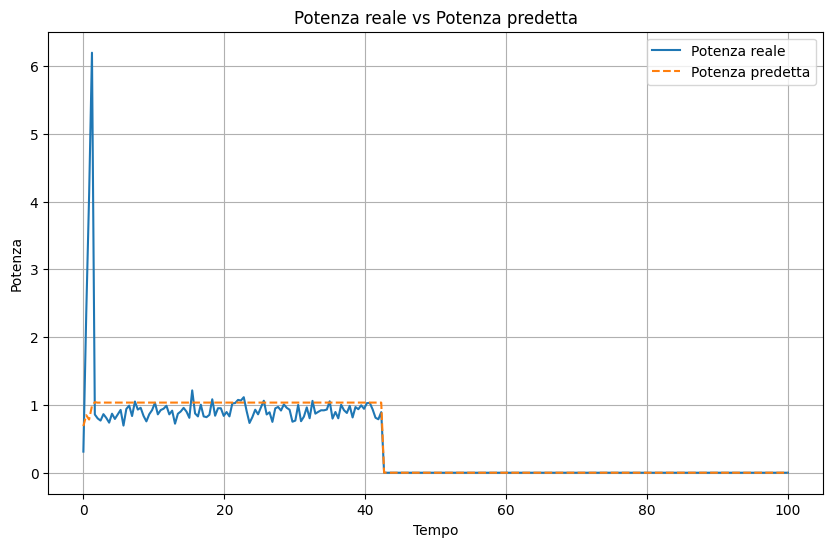

50
m_34
1.3653807868812986
0.7016619914596097


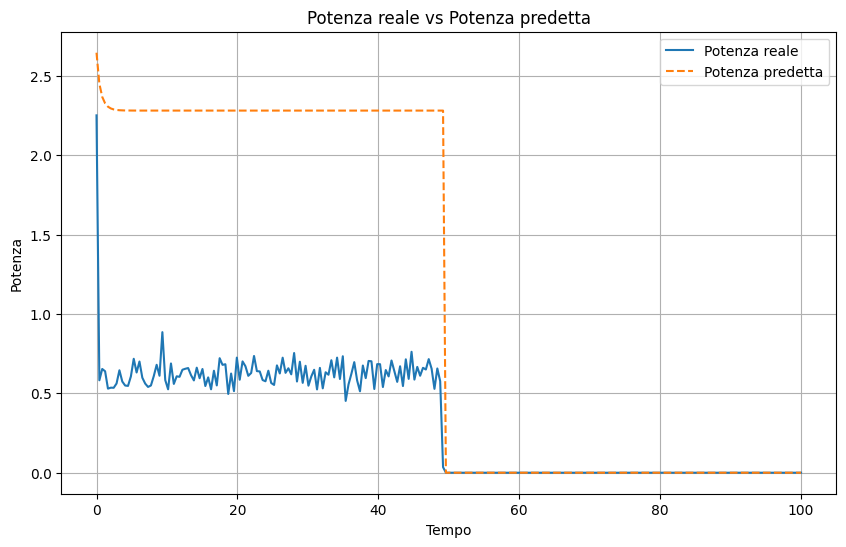

52
m_59
0.01783580756914572
0.891592230001825


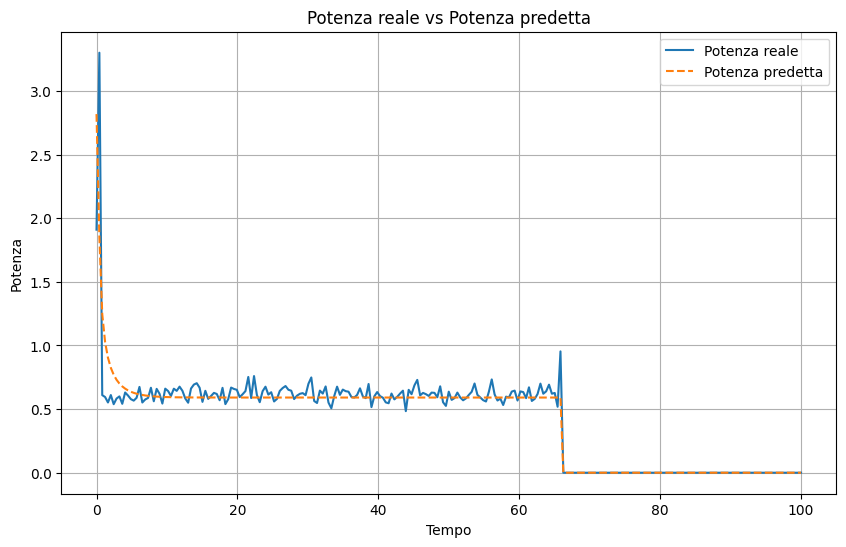

54
m_57
0.013998005827301645
0.46838918167277555


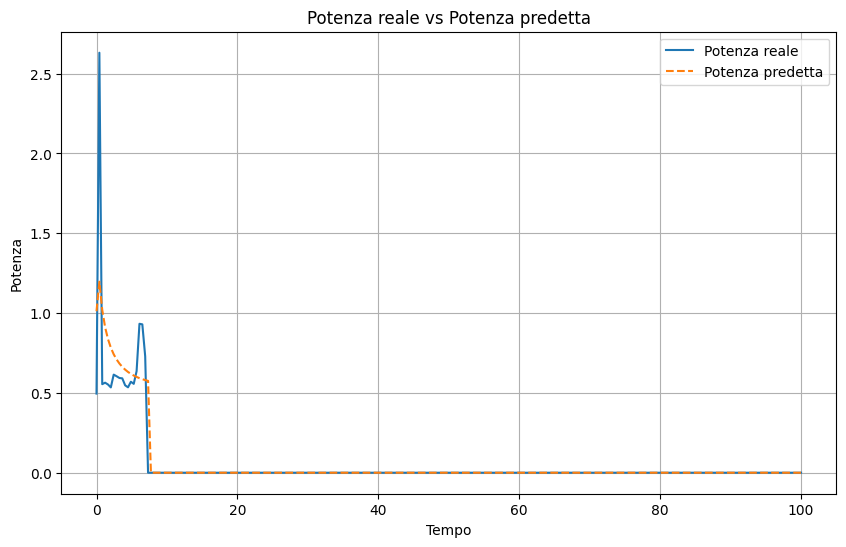

56
m_66
0.043381191613313524
0.7987467877042576


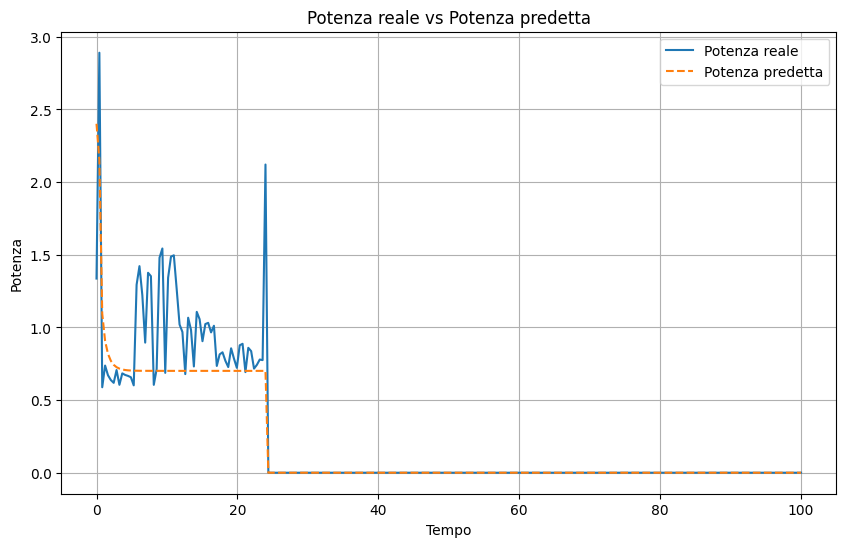

58
m_94
0.10573436604393817
0.6246315617056086


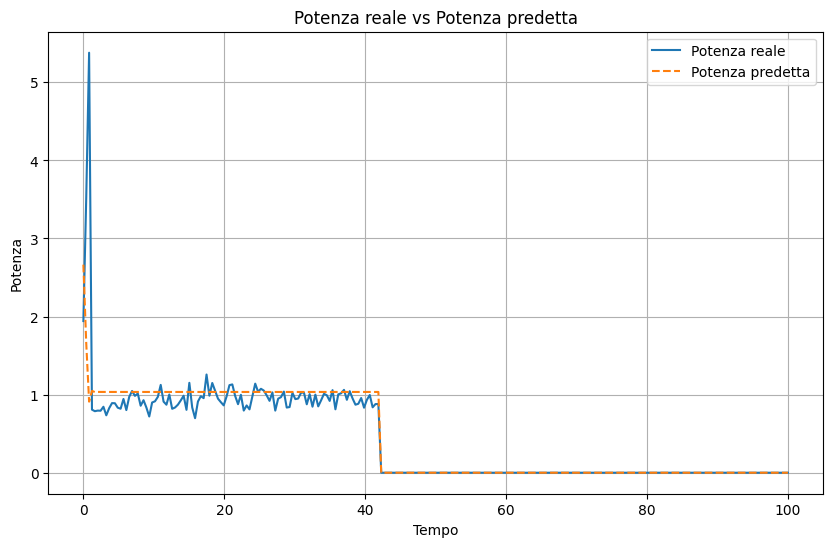

60
m_34
1.3593476949936794
0.7542572634690038


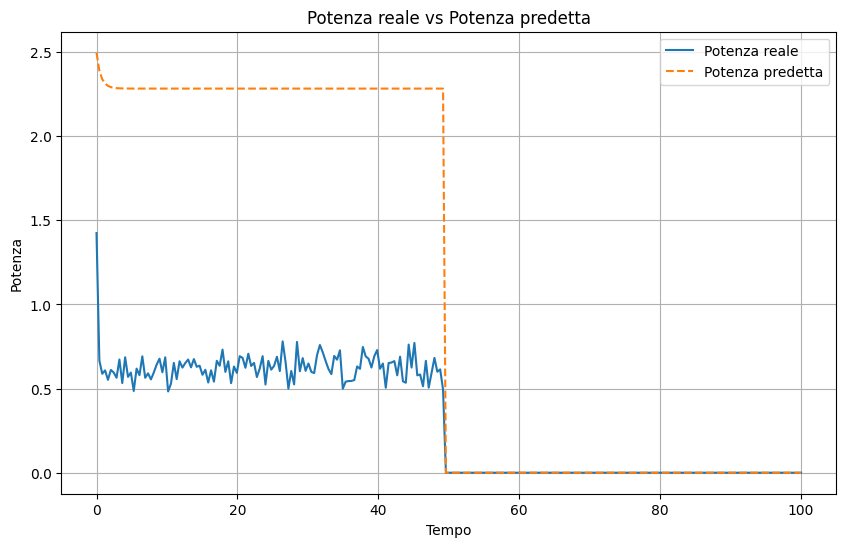

62
m_59
0.012632151135721033
0.7527492058628614


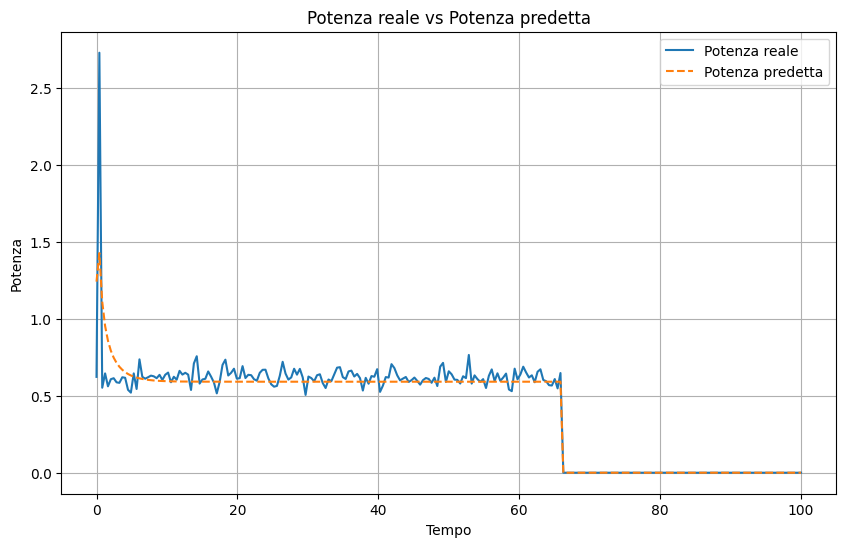

64
m_57
0.018897416215379274
0.8441145452394108


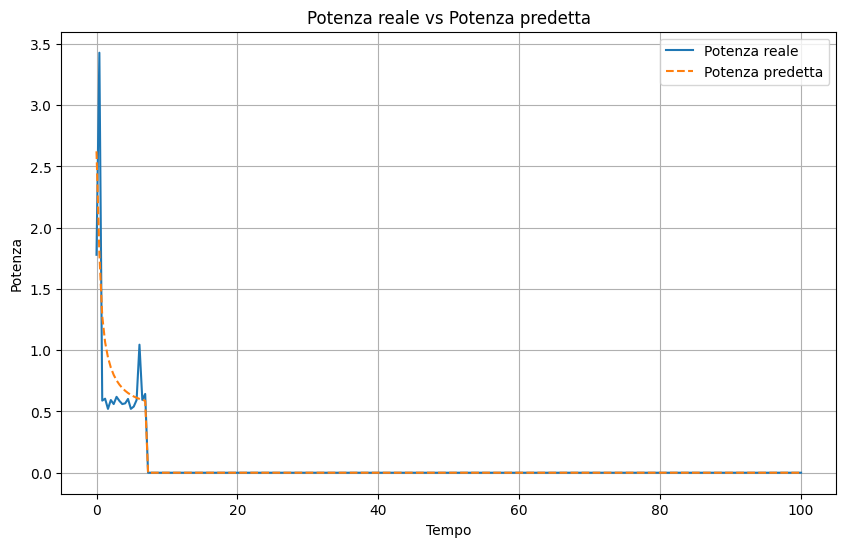

66
m_66
0.03911164753564383
0.8797024744840148


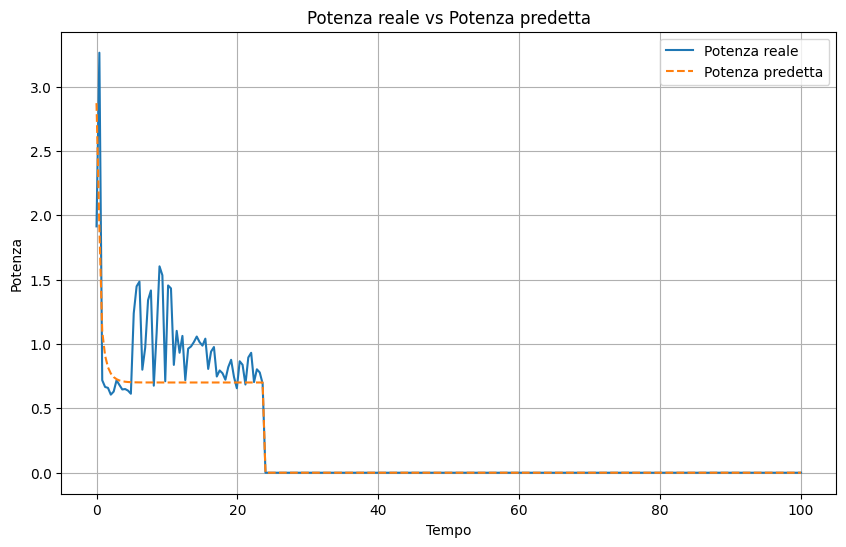

68
m_94
0.14584361451214997
0.32292070947264184


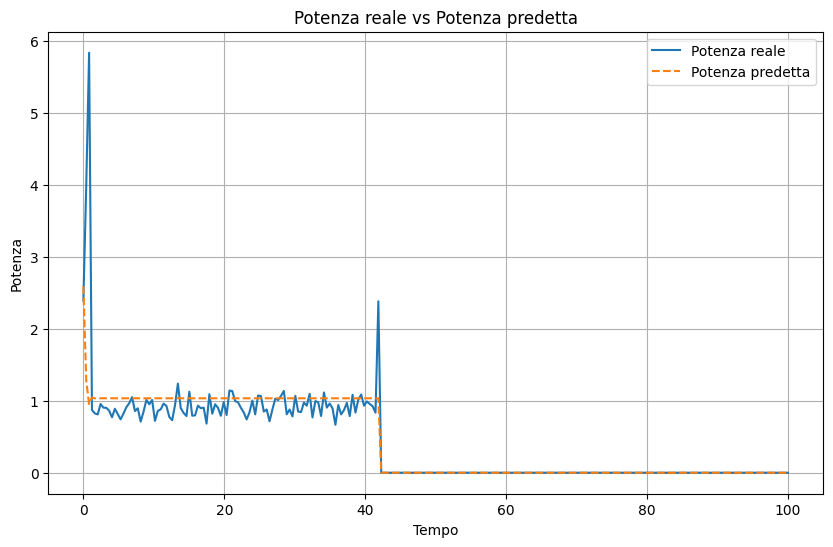

70
m_34
1.3330415439830527
0.5142898675284606


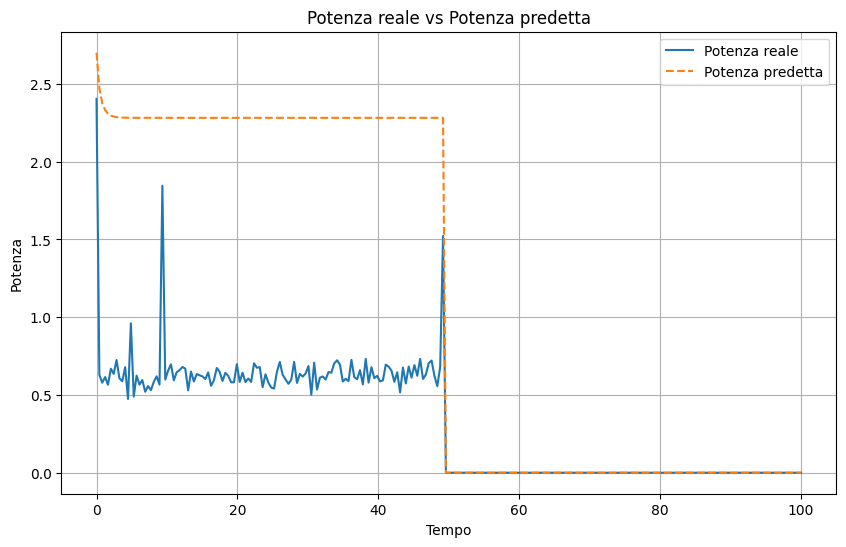

72
m_59
0.02784164030826295
0.8941228659986838


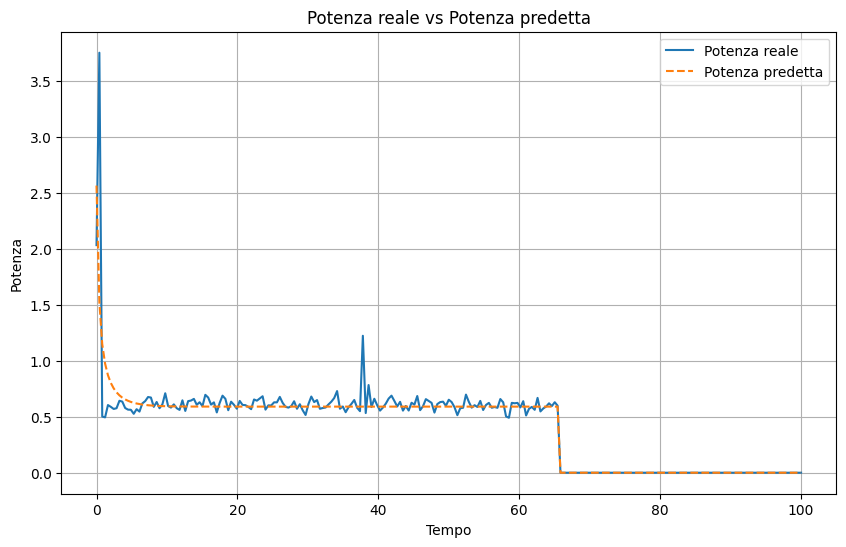

74
m_57
0.012609656832905217
0.6508762687581884


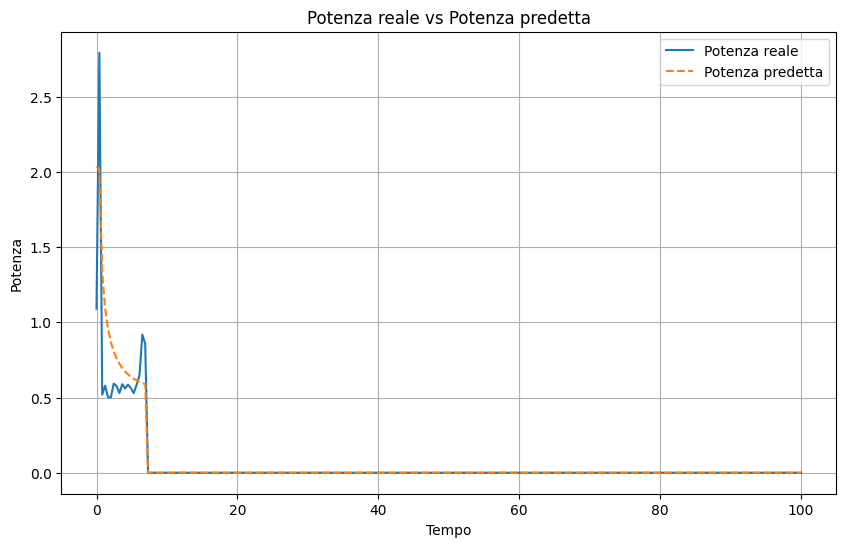

77
m_97
0.13492377353485116
0.34671527090944954


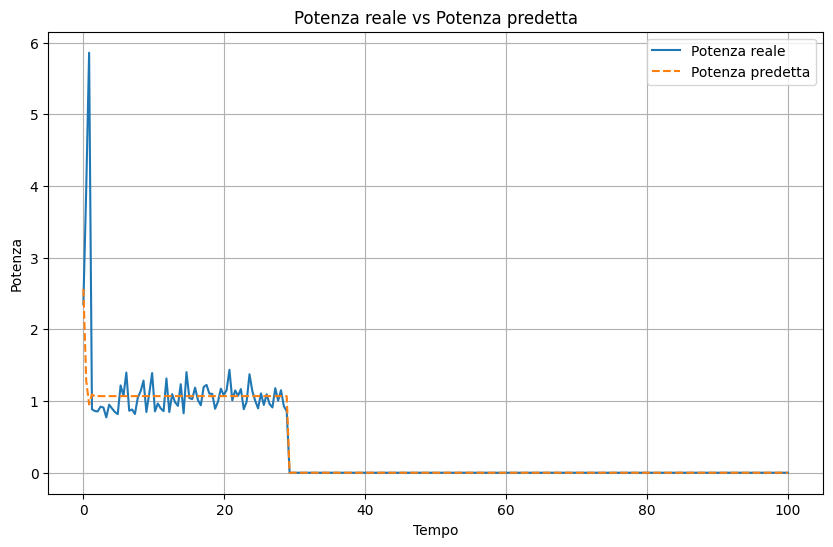

83
m_97
0.056797272612399204
0.8869138625884807


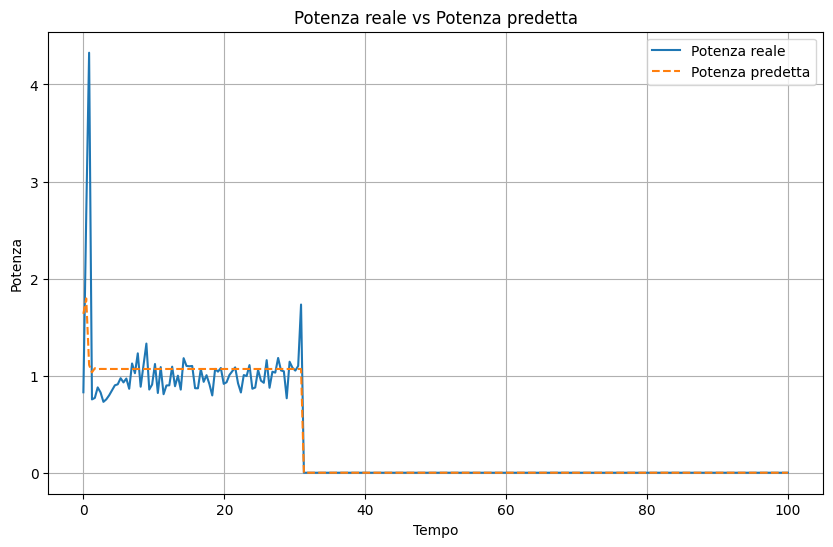

89
m_97
0.10584285131898685
0.5899262597779713


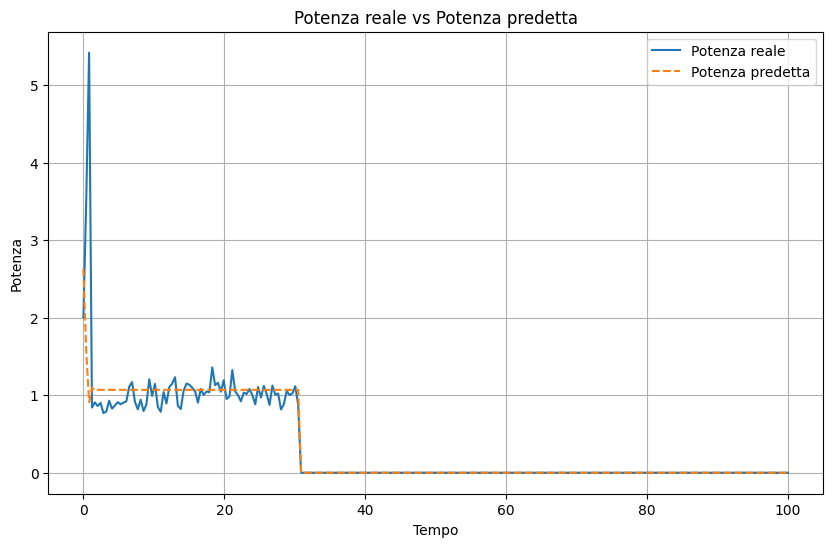

95
m_97
0.11541188456806004
0.5210634705257393


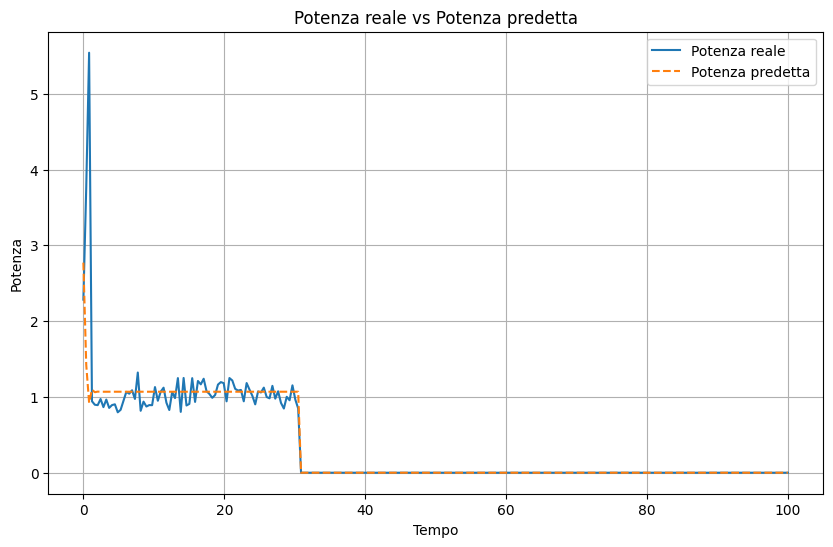

101
m_97
0.11830310455282934
0.49946634241970056


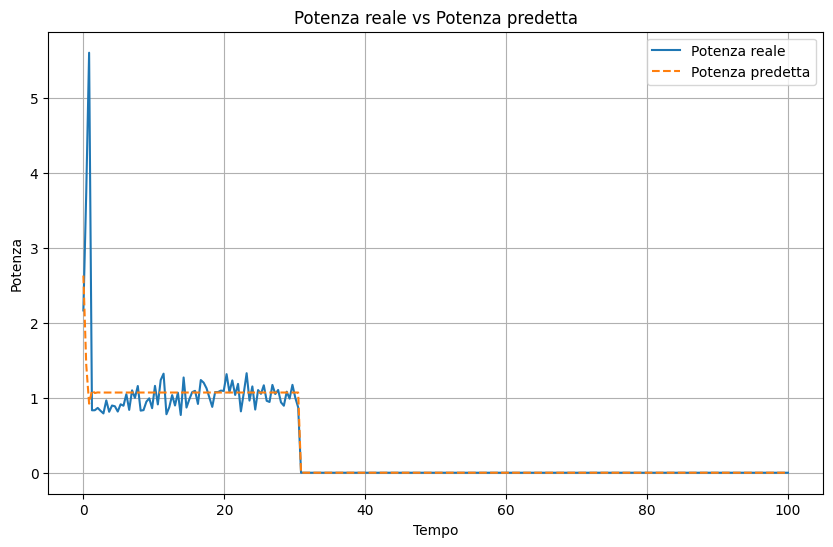

In [ ]:
t = np.linspace(0, 100, len(power_test_data[0]))
for index in range(0,len(power_test_data)):
  if test_symbol[index] != 'i_0':
  #predicted_power = model.predict(power_test_data[index], u=speed_test_data[index])
    predicted_power = compute_powers(power_test_data[index][0], speed_test_data[index])
    mse = mean_squared_error(power_test_data[index], predicted_power)
  #['m_97', 'm_34', 'm_61', 'm_69', 'm_94', 'm_59', 'm_66', 'm_46', 'm_57', 'i_0', 'm_71']
  #if test_symbol[index] == "m_34" :
    print(index)
    print(test_symbol[index])
    print(mse)
    print(model.score(power_test_data[index], u=speed_test_data[index]))

    plt.figure(figsize=(10, 6))
    plt.plot(t,power_test_data[index], label='Potenza reale')
    plt.plot(t, predicted_power, linestyle='--',label='Potenza predetta')
    plt.xlabel('Tempo')
    plt.ylabel('Potenza')
    plt.title('Potenza reale vs Potenza predetta')
    plt.legend()
    plt.grid(True)
    plt.show()

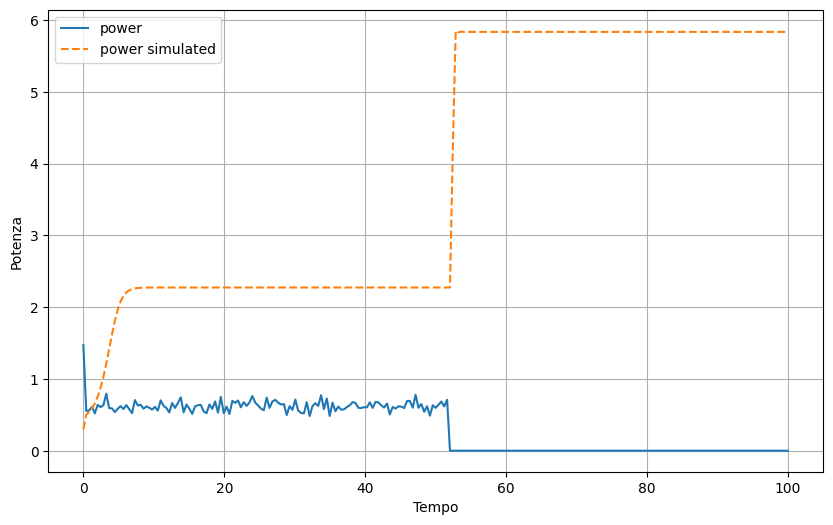

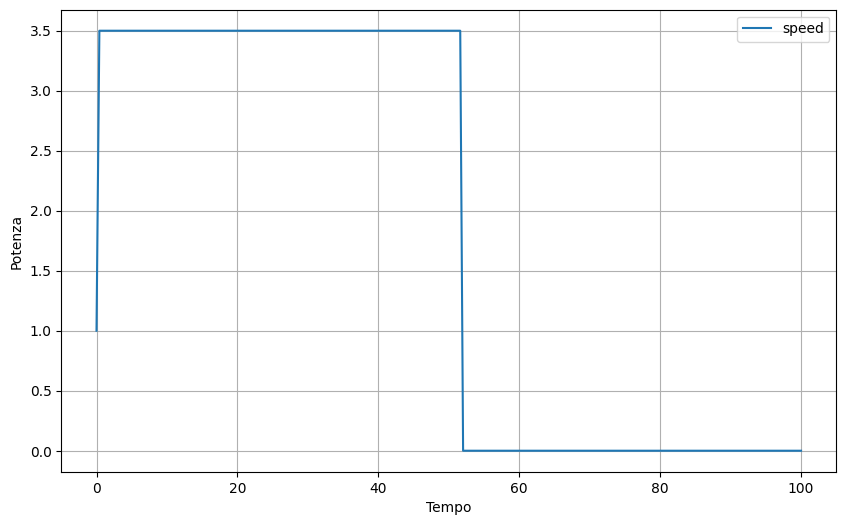

In [ ]:
index = 20 # Indice di prova casuale
test_sim = model.simulate(0.3, len(speed_test_data[index]), u=speed_test_data[index])
plt.figure(figsize=(10, 6))
plt.plot(t, power_test_data[index],label='power')
plt.plot(t, test_sim,linestyle='--',label='power simulated')

plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t,speed_test_data[index], label='speed')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.legend()
plt.grid(True)
plt.show()


##Implementazione Regressore Segments


In [ ]:
from pykalman import KalmanFilter
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
event_segments = []
speed_segments = []
power_segments = []
event_symbol = []

for data_path in data_paths:
  new_signals: List[SampledSignal] = parse_data(data_path)
  chg_pts = energy_made_cs.find_chg_pts([sig for sig in new_signals if sig.label in DRIVER_SIG])
  power_pts = new_signals[0].points
  power_values = [pt.value for pt in power_pts]
  speed_pts = new_signals[1].points
  speed_values = [st.value for st in speed_pts]
  id_events = [label_event(events, new_signals, pt.t) for pt in chg_pts[:10]]
  energy_made_cs.process_data(data_path)
  trace = energy_made_cs.timed_traces[-1]
  kf = KalmanFilter(transition_matrices=[1],
                observation_matrices=[1],
                initial_state_mean=power_values[0],
                initial_state_covariance=1,
                observation_covariance=1,
                transition_covariance=0.01)   # Aumenta la covarianza di transizione
  smoothed_power_kalman, _ = kf.filter(power_values)
  for i, pt in enumerate(power_pts):
        if power_values[i] < 0.5:
            smoothed_power_kalman[i] = 0

  for i, pt in enumerate(power_pts):
    pt.value = smoothed_power_kalman[i]

  for i in range(1, len(chg_pts) - 1):
      cp_start = chg_pts[i]
      cp_end = chg_pts[i + 1]
      event = label_event(events, new_signals, cp_start.t)

      event_start_timestamp = cp_start.t
      event_end_timestamp = cp_end.t
      speed_segment = np.array([pt.value for pt in speed_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]).ravel()
      power_segment = np.array([pt.value for pt in power_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]).ravel()

      speed_segment_timestamp = [pt for pt in speed_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]
      power_segment_timestamp = [pt for pt in power_pts if event_start_timestamp <= pt.timestamp < event_end_timestamp]

      event_segments.append((event.label, event.symbol, speed_segment_timestamp, power_segment_timestamp))
      speed_segments.append(speed_segment)
      power_segments.append(power_segment)
      event_symbol.append(event.symbol)

max_length = max(max(len(segment) for segment in speed_segments),
                 max(len(segment) for segment in power_segments))
def pad_sequences(sequences, max_length):
    padded_sequences = []
    for sequence in sequences:
        num_zeros = max_length - len(sequence)
        padded_sequence = np.pad(sequence, (0, num_zeros), 'constant')
        padded_sequences.append(padded_sequence)
    return padded_sequences


speed_segments_padded = pad_sequences(speed_segments, max_length)
power_segments_padded = pad_sequences(power_segments, max_length)

speed_data = np.array(speed_segments_padded)
power_data = np.array(power_segments_padded)


print("Speed data shape: "+str(speed_data.shape))
print("Power data shape: "+str(power_data.shape))

Speed data shape: (150, 247)
Power data shape: (150, 247)


In [ ]:
speed_train_data = []
power_train_data = []
for i,val in enumerate(event_symbol):
  if val != "m_69" and val != "m_61":
    speed_train_data.append(speed_data[i])
    power_train_data.append(power_data[i])

print(len(power_train_data))

speed_test_data = []
power_test_data = []
test_symbol = []
for i,val in enumerate(event_symbol):
  if val == "m_69" or val == "m_61":
    speed_test_data.append(speed_data[i])
    power_test_data.append(power_data[i])
    test_symbol.append(event_symbol[i])
print(len(power_test_data))

126
24


In [ ]:
combined_speed_data = []
combined_power_data = []
for st,pt in zip(speed_train_data, power_train_data):
  combined_speed_data = np.concatenate((combined_speed_data, st), axis=0)
  combined_power_data = np.concatenate((combined_power_data, pt), axis=0)
combined_power_data = combined_power_data.reshape(-1,1)
combined_speed_data = combined_speed_data.reshape(-1,1)
print(combined_speed_data.shape)

(31122, 1)


In [ ]:
regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
regressor.fit(combined_speed_data, combined_power_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

0.01073600581605182


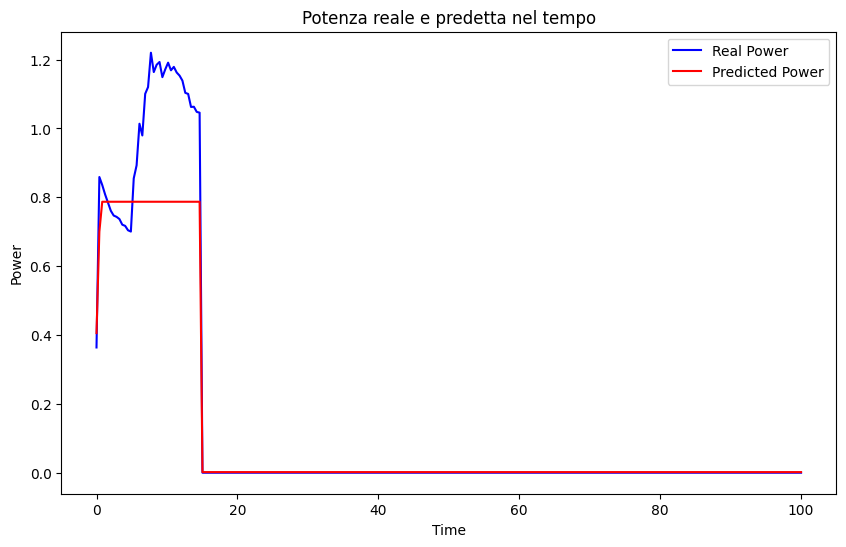

0.000751542018049916


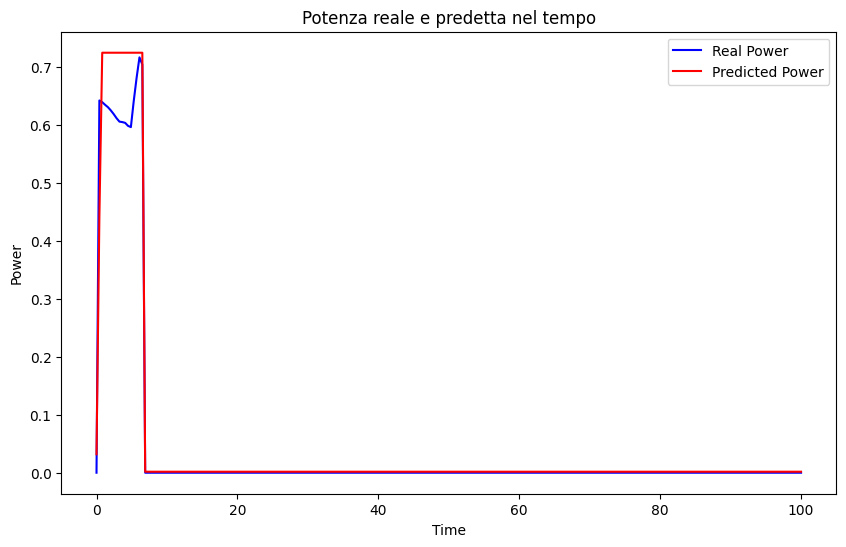

0.006525893541439973


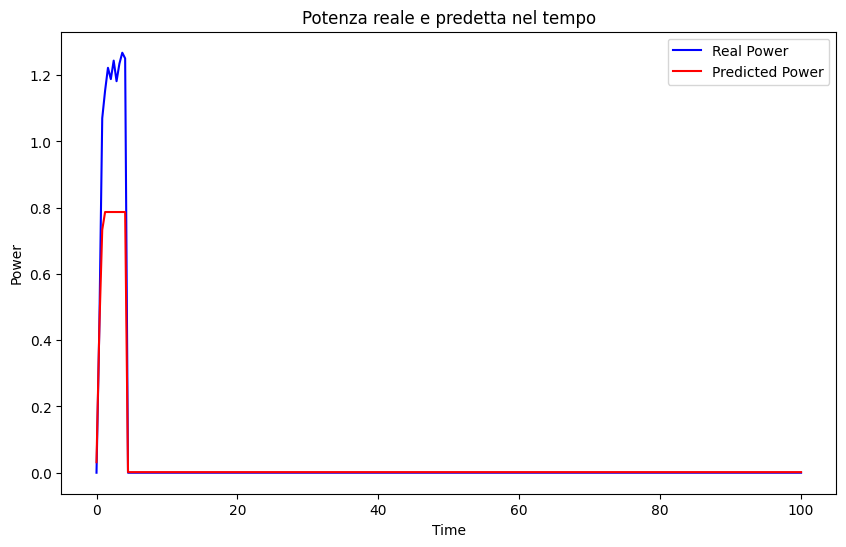

0.0016667812388658674


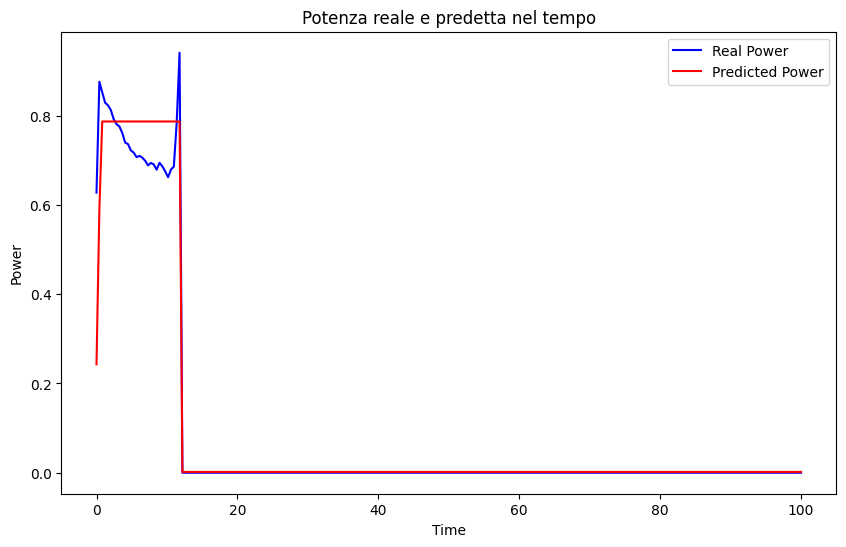

0.0030623432372485497


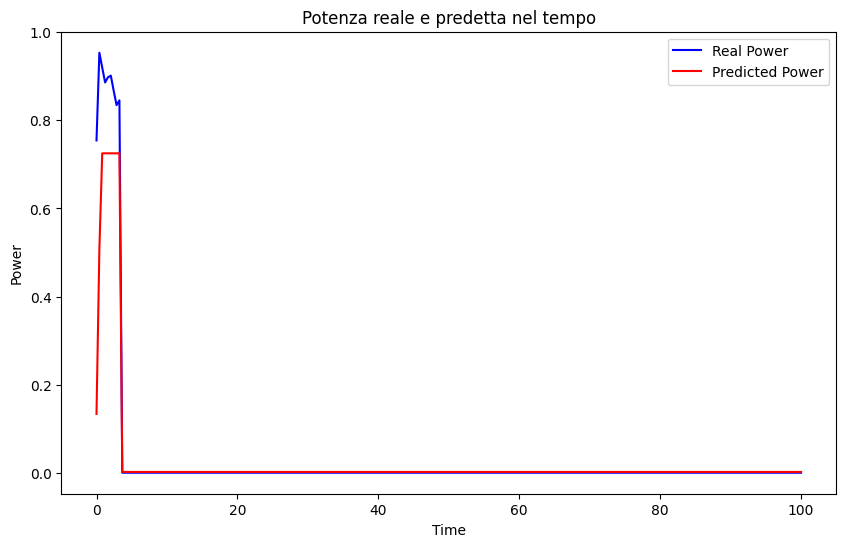

0.0032295682003681365


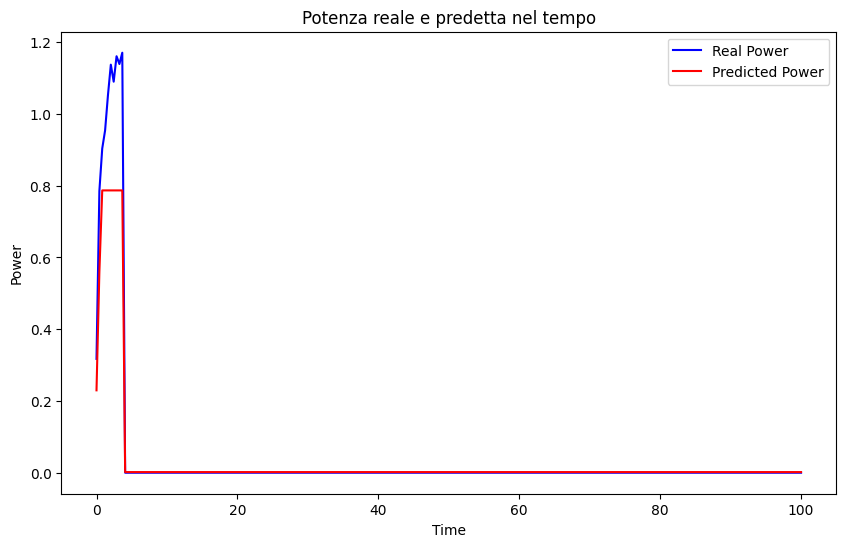

0.0023553267777489404


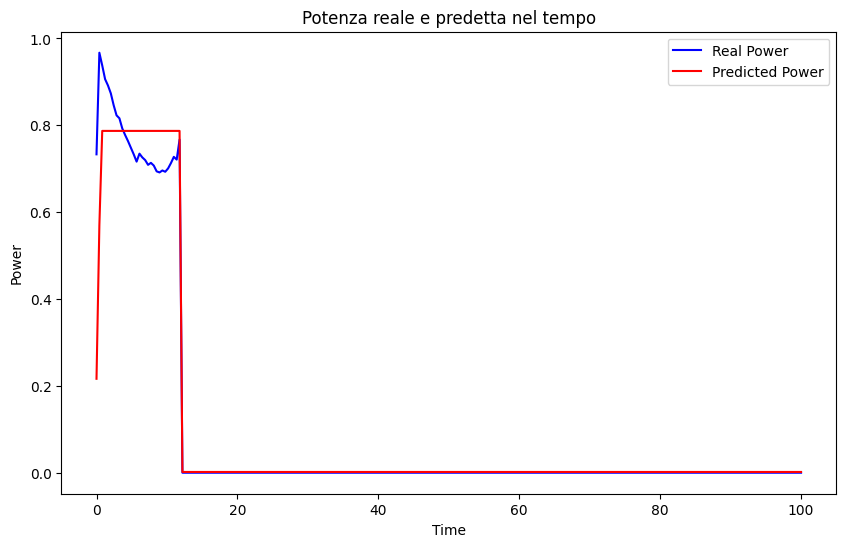

0.0015779807560873309


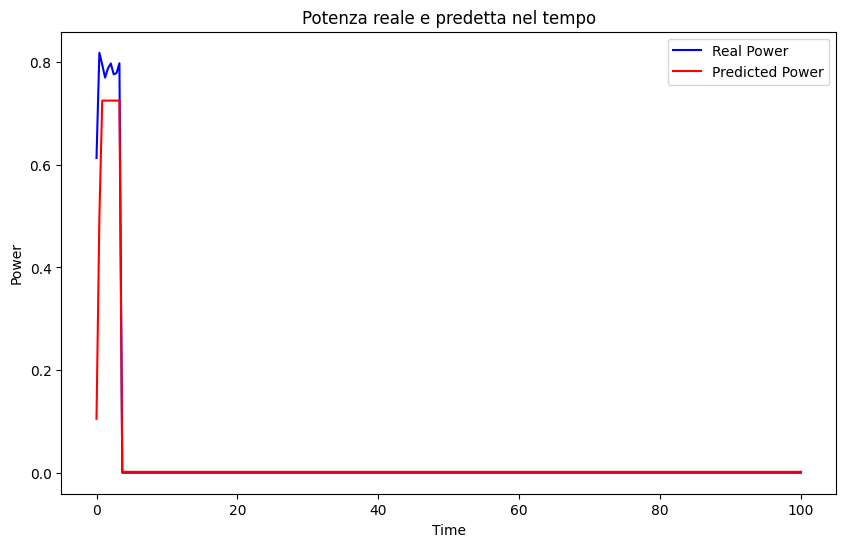

0.005878101517454618


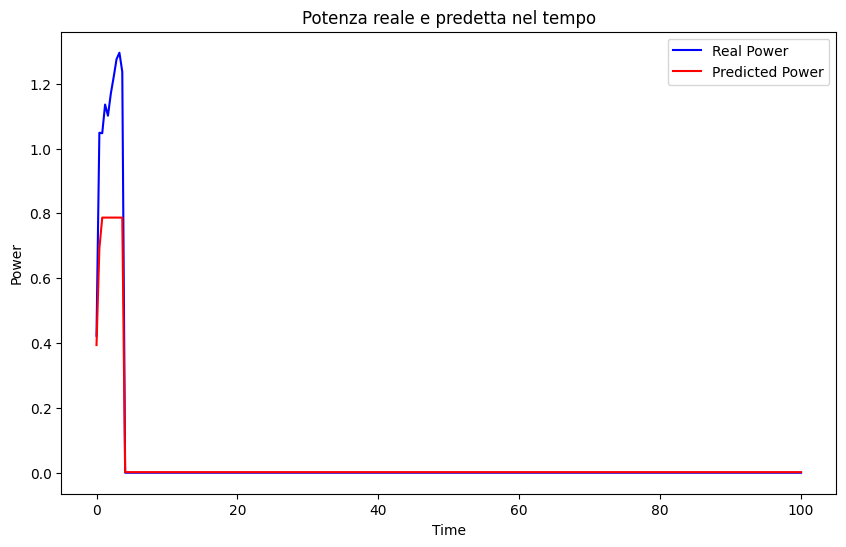

0.0033343102686070073


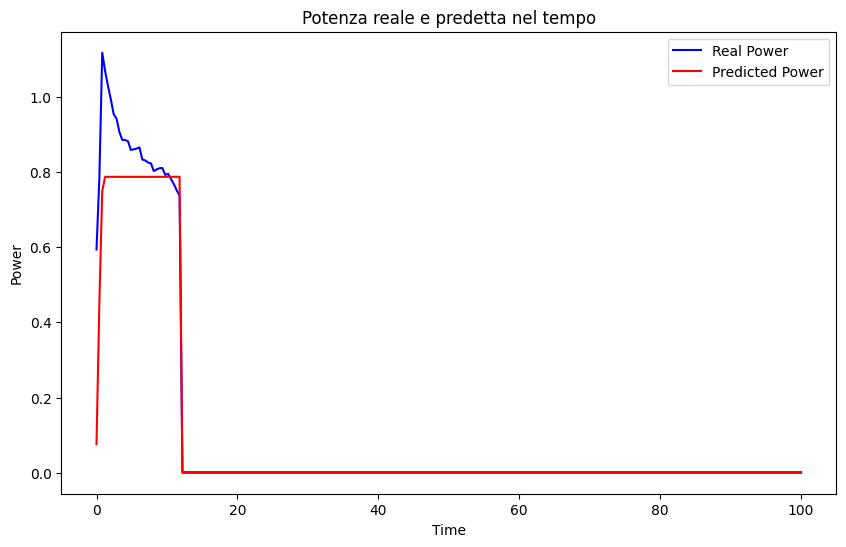

0.001484987711358689


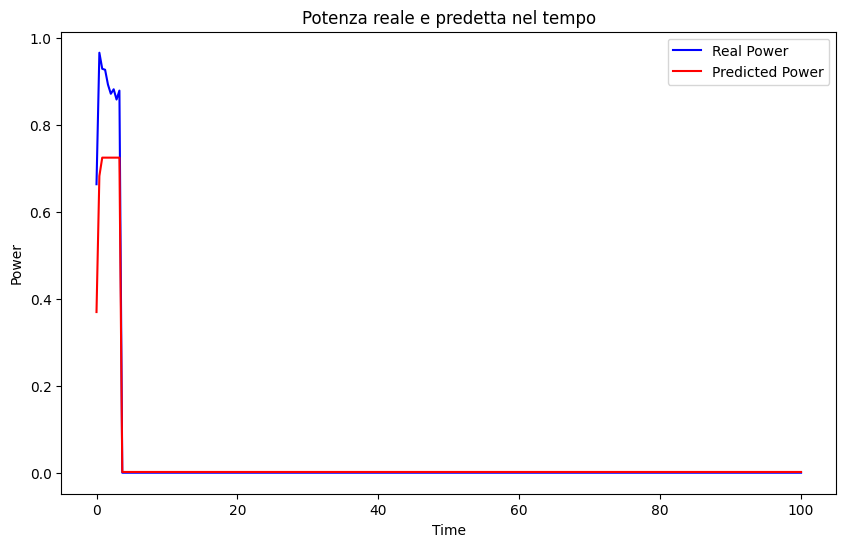

0.0019382868152984312


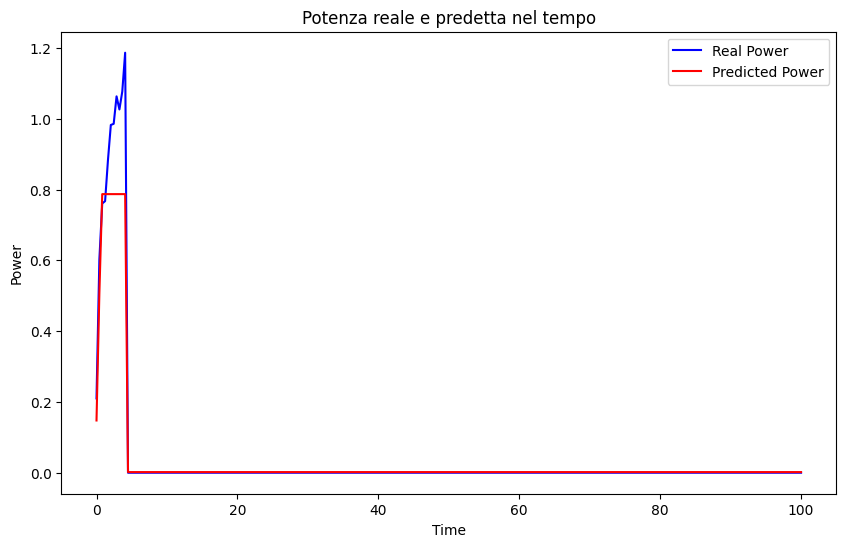

0.002885313239427393


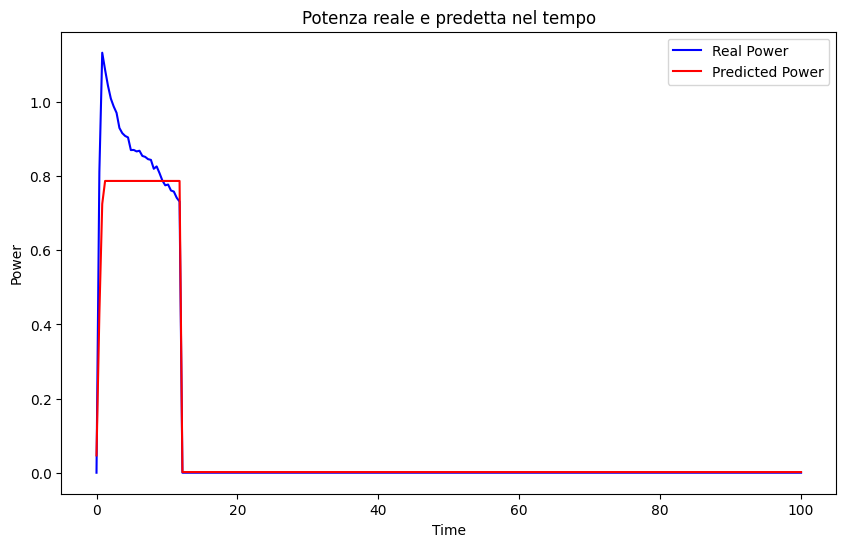

0.002065219299754052


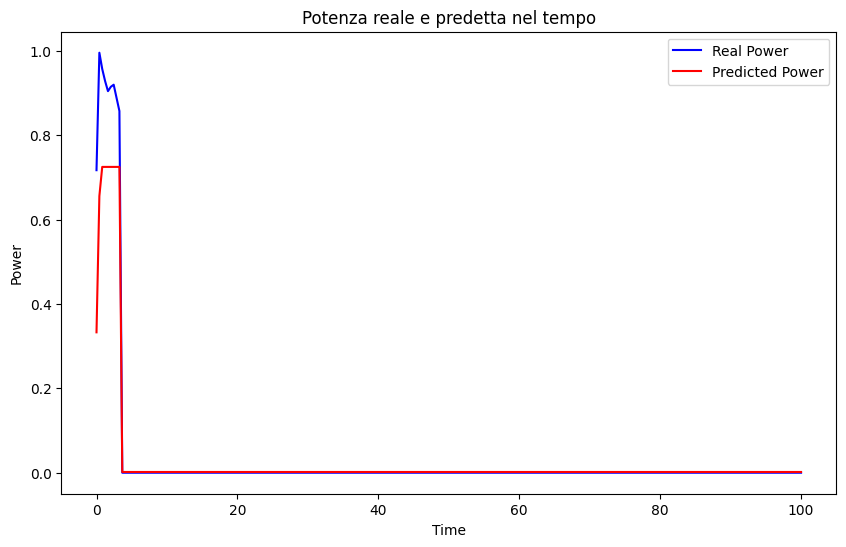

0.0005108899559122733


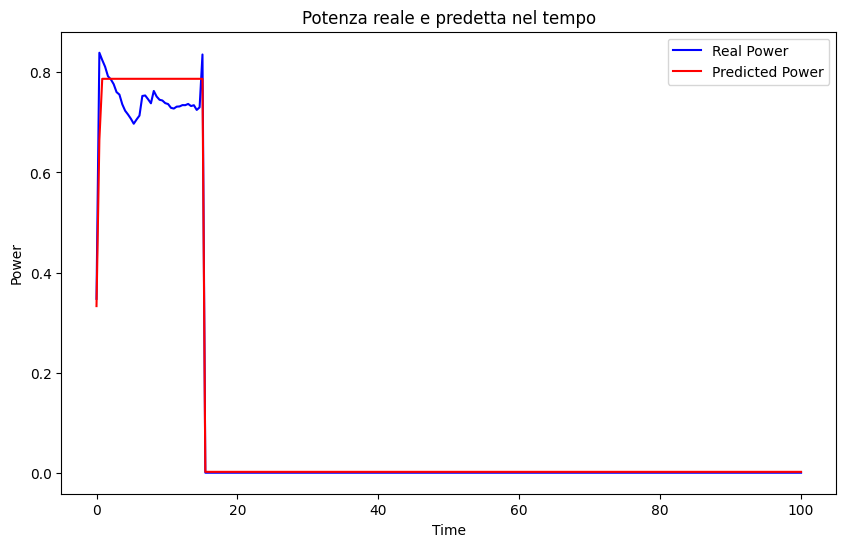

0.003116357678190692


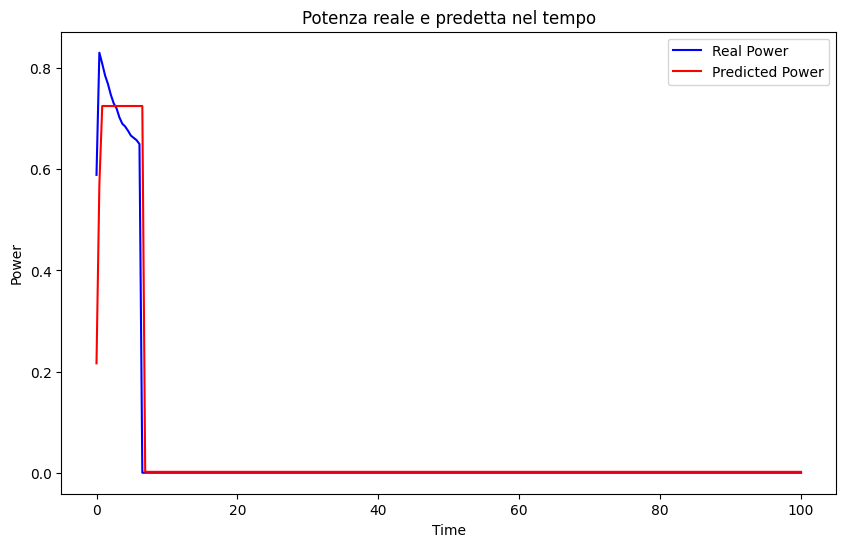

0.014761956441636095


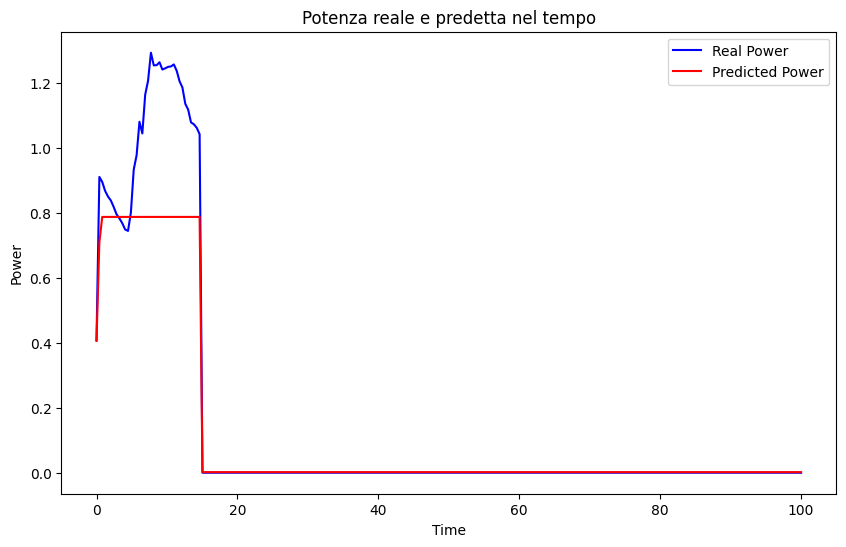

0.0032776853342611012


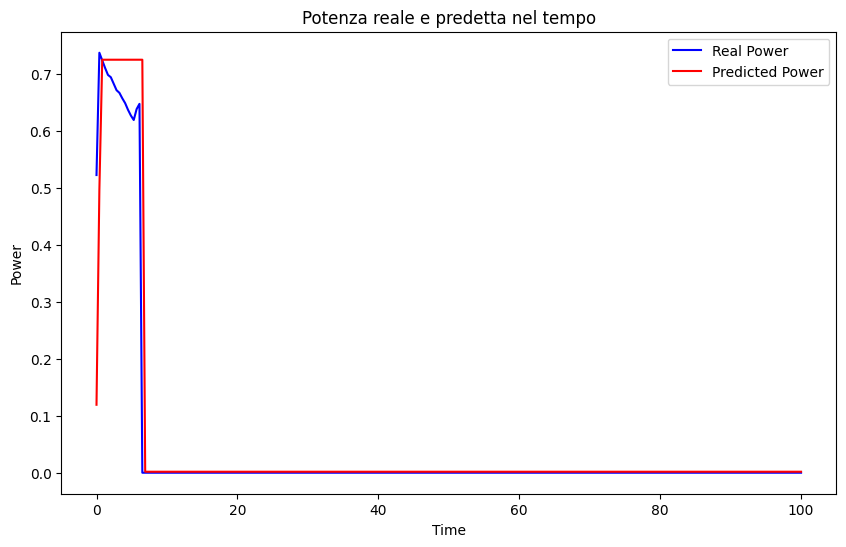

0.009796495963556221


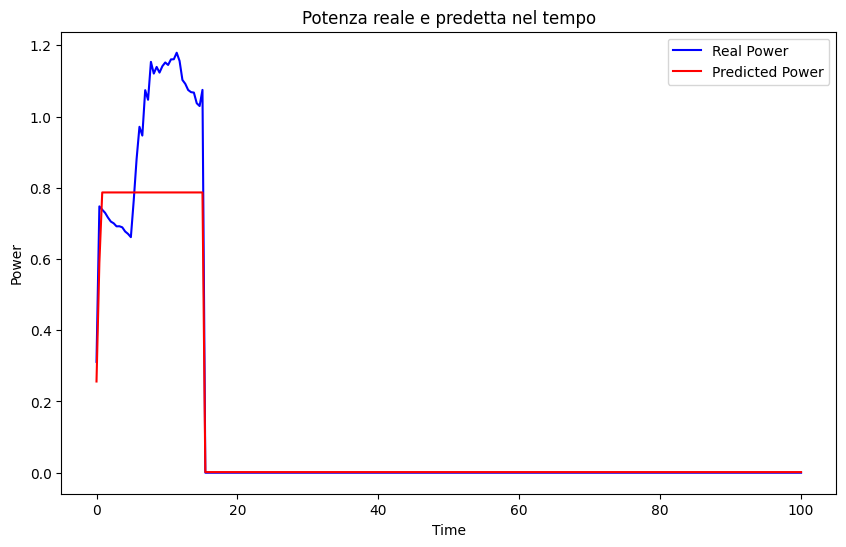

0.0007999795291945631


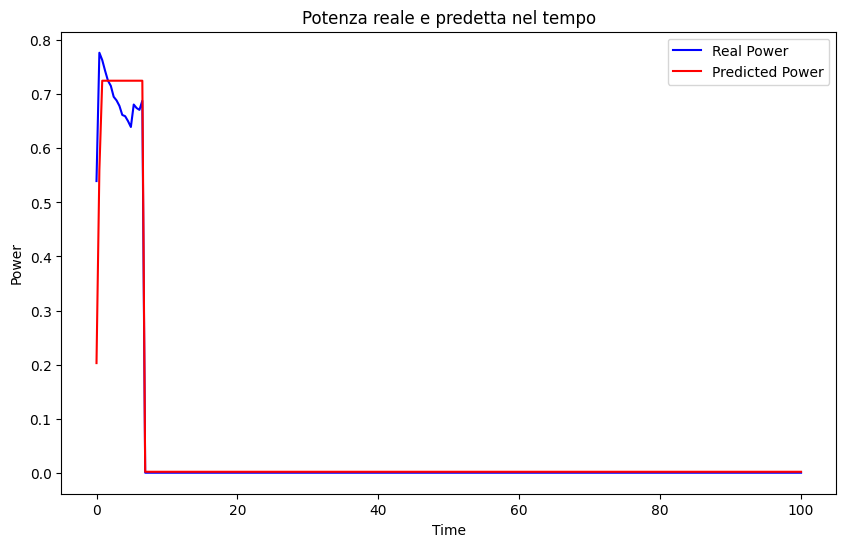

0.012044509391476995


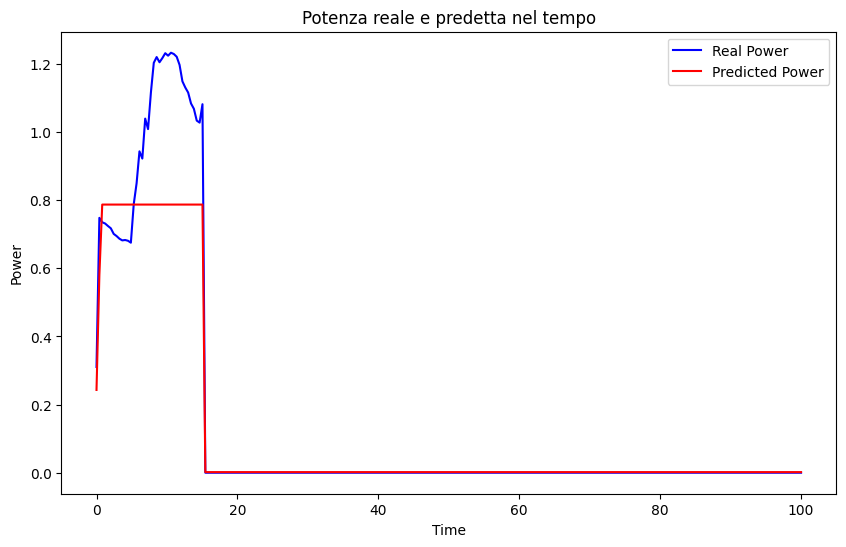

0.0011965612832139508


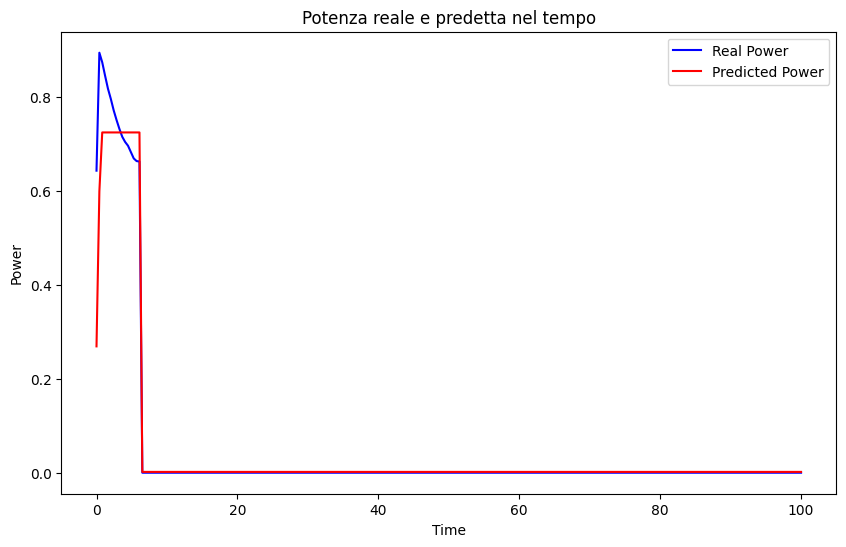

0.013064117118406889


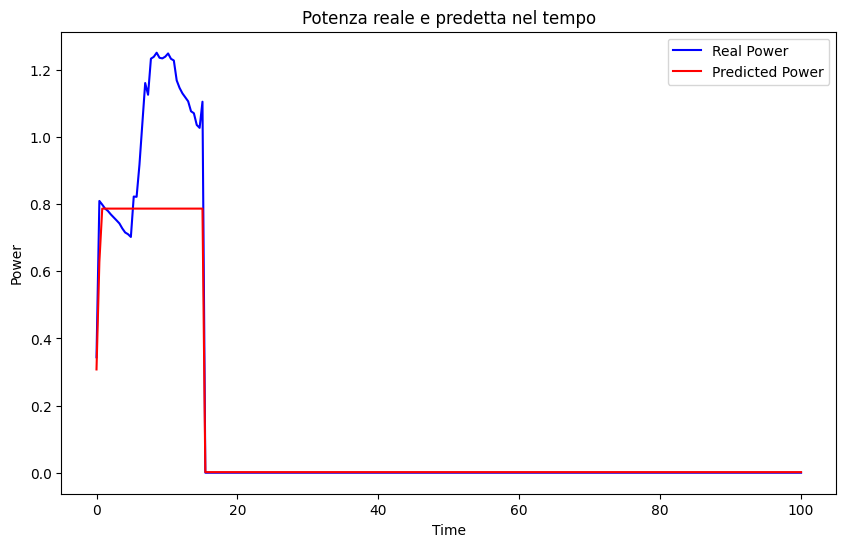

0.0009121930337303731


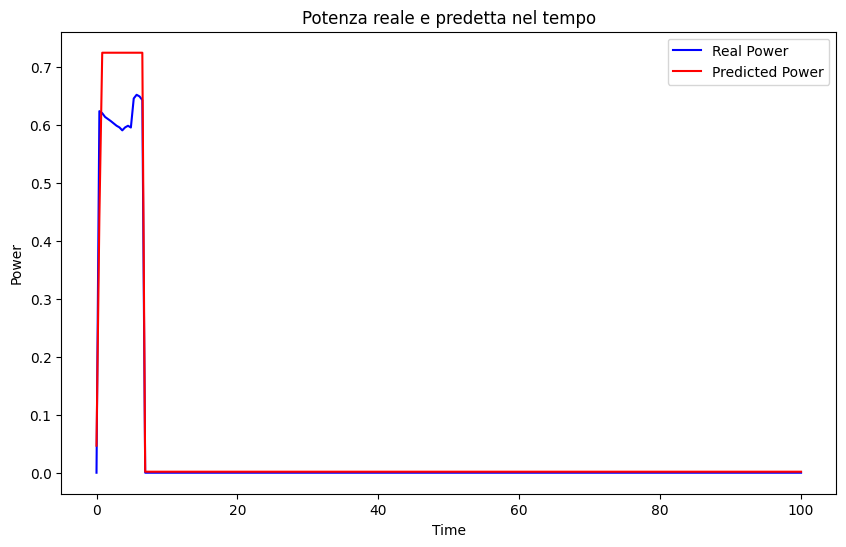

In [ ]:
for i,s in enumerate(speed_test_data):
  predictions = regressor.predict(s.reshape(-1,1))
  mse = mean_squared_error(power_test_data[i], predictions)
  print(mse)
  plt.figure(figsize=(10, 6))
  t_test = np.linspace(0, 100, len(power_test_data[0]))
  plt.plot(t_test, power_test_data[i], label='Real Power', color='blue')
  plt.plot(t_test, predictions, label='Predicted Power', color='red')
  plt.xlabel('Time')
  plt.ylabel('Power')
  plt.title('Potenza reale e predetta nel tempo')
  plt.legend()
  plt.show()

####Rappresentazione White Box

In [ ]:
best_degree = regressor.named_steps['polynomialfeatures'].degree

linear_regressor = regressor.named_steps['linearregression']

coefficients = linear_regressor.coef_

def predict_power(speed, coefficients, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(speed.reshape(-1, 1))
    feature_names = poly.get_feature_names_out(input_features=['speed'])
    power = np.dot(X_poly, coefficients.T)
    return power

for i in range(0,len(speed_test_data)):
  if test_symbol[i] == "m_69":
    predictions = predict_power(speed_test_data[i], coefficients, best_degree)
    mse = mean_squared_error(power_test_data[i], predictions)
    print("Mean Squared Error:", mse)

Mean Squared Error: 0.010837586009461631
Mean Squared Error: 0.006576573020993832
Mean Squared Error: 0.0016553505172733577
Mean Squared Error: 0.0032641215573683854
Mean Squared Error: 0.0023560537316323293
Mean Squared Error: 0.005926121279317648
Mean Squared Error: 0.0033764354060718663
Mean Squared Error: 0.0019611853358296022
Mean Squared Error: 0.0029244118166945193
Mean Squared Error: 0.0004904315339145375
Mean Squared Error: 0.014893550997159125
Mean Squared Error: 0.009885749189813041
Mean Squared Error: 0.01214414573873064
Mean Squared Error: 0.013178147171435414


##Implementazione Regressore Signal

In [ ]:
n = 100
def plot_series(t1, x1, t2, x2, label1, label2, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(t1, x1, label=label1, color='red')
    axs[0].set_xlabel('Tempo')
    axs[0].set_ylabel('Valore')
    axs[0].set_title(title)
    axs[0].legend()
    axs[0].grid(True)
    axs[1].plot(t2, x2, label=label2, linestyle='--', color='blue')
    axs[1].set_xlabel('Tempo')
    axs[1].set_ylabel('Valore')
    axs[1].set_title(title)
    axs[1].legend()
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
from pykalman import KalmanFilter
from scipy.signal import butter, filtfilt
def generateData(data_path):
  new_signals: List[SampledSignal] = parse_data(data_path)
  chg_pts = energy_made_cs.find_chg_pts([sig for sig in new_signals if sig.label in DRIVER_SIG])
  power_pts = new_signals[0].points
  speed_pts = new_signals[1].points
  pressure_pts = new_signals[2].points
  power_values = [pt.value for pt in power_pts]
  speed_values = [st.value for st in speed_pts]
  id_events = [label_event(events, new_signals, pt.t) for pt in chg_pts[:10]]
  energy_made_cs.process_data(data_path)
  trace = energy_made_cs.timed_traces[-1]
  kf = KalmanFilter(transition_matrices=[1],
                observation_matrices=[1],
                initial_state_mean=power_values[0],
                initial_state_covariance=1,
                observation_covariance=1,
                transition_covariance=0.01)   # Aumenta la covarianza di transizione
  smoothed_power_kalman, _ = kf.filter(power_values)
  for i, pt in enumerate(power_pts):
        if power_values[i] < 0.5 and speed_values[i] < 0.5:
            smoothed_power_kalman[i] = 0
        '''if i > 0:
          if power_values[i] - power_values[i-1] > 0.5 and power_values[i-2]<0.5:
            smoothed_power_kalman[i] = power_values[i]'''
  smoothed_power_kalmanvv2, _ = kf.filter(smoothed_power_kalman)
  for i, pt in enumerate(power_pts):
        if power_values[i] < 0.5 and speed_values[i] < 0.5:
            smoothed_power_kalmanvv2[i] = 0

  for i, pt in enumerate(power_pts):
    pt.value = smoothed_power_kalmanvv2[i]

  power_data = np.array([pt.value for pt in power_pts]).ravel()
  speed_data = np.array([pt.value for pt in speed_pts]).ravel()
  t_power = transform_times_to_seconds_cumulative(np.array(extractTimestamps(power_pts)))
  t_speed = transform_times_to_seconds_cumulative(np.array(extractTimestamps(speed_pts)))
  '''double_plot([pt.timestamp for pt in power_pts], [pt.value for pt in power_pts],
          [pt.timestamp for pt in speed_pts], [pt.value for pt in speed_pts],
          trace, title="file", filtered=True,
          timestamps3=[pt.timestamp for pt in pressure_pts],
          v3=[pt.value for pt in pressure_pts])'''
  plot_series([pt.timestamp.to_secs() for pt in power_pts], [pt.value for pt in power_pts],
          [pt.timestamp.to_secs() for pt in speed_pts], [pt.value for pt in speed_pts],"power","speed","ciao")
  return power_data, speed_data, t_power

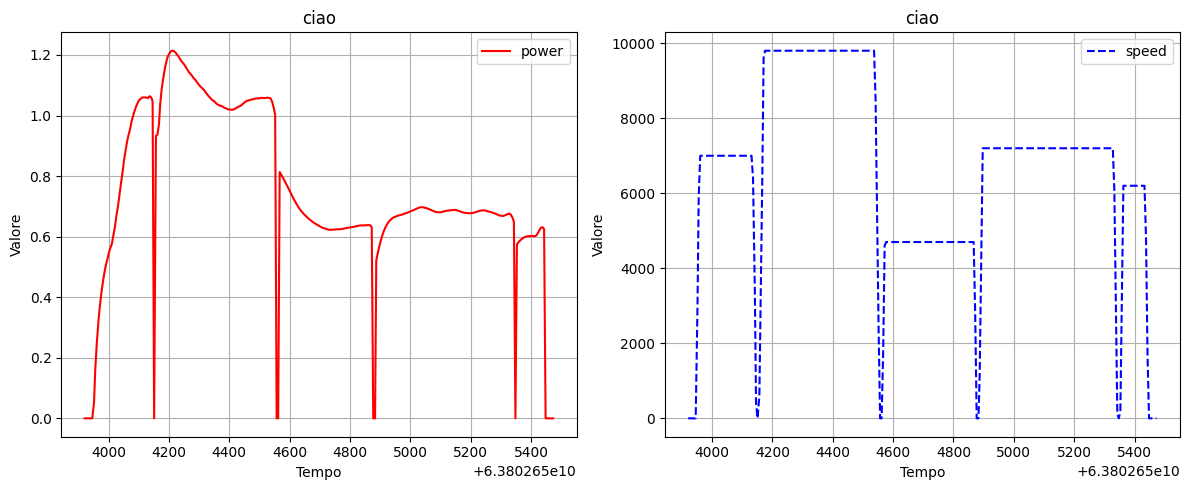

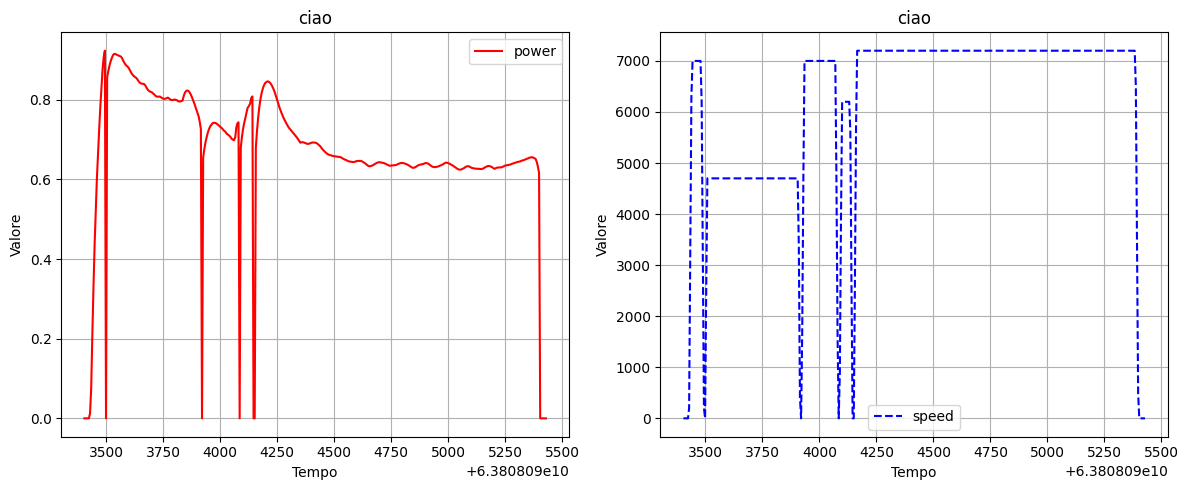

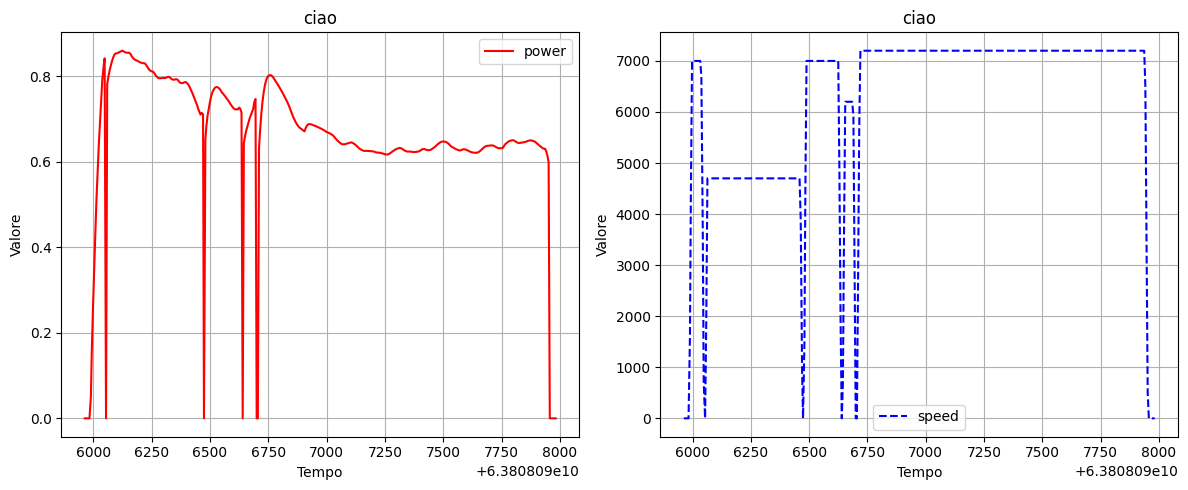

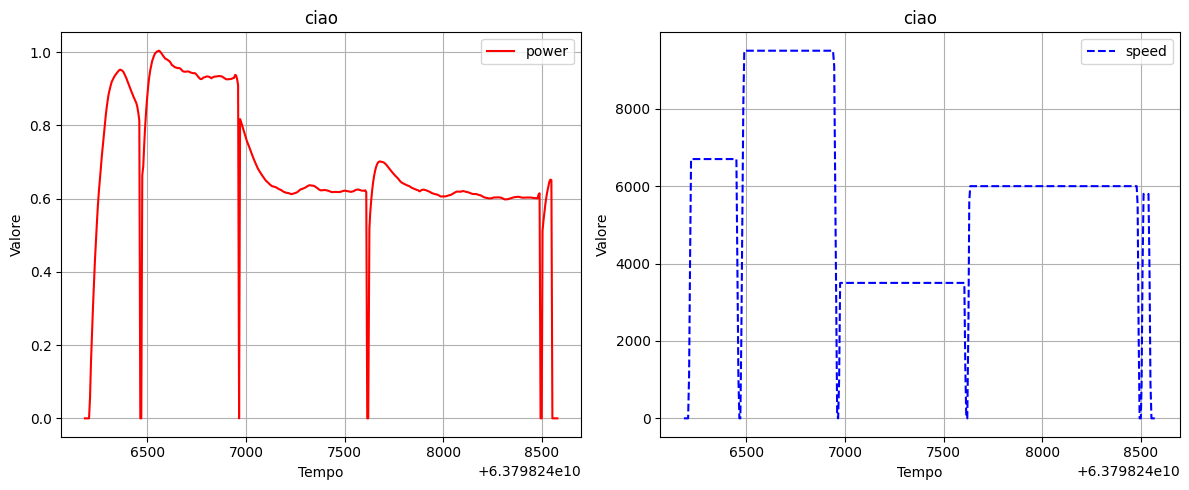

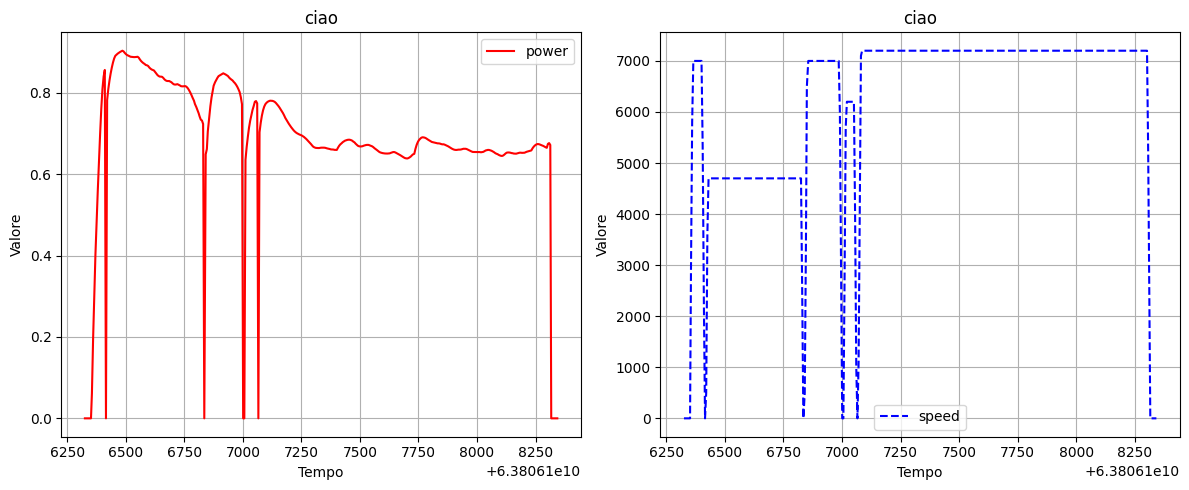

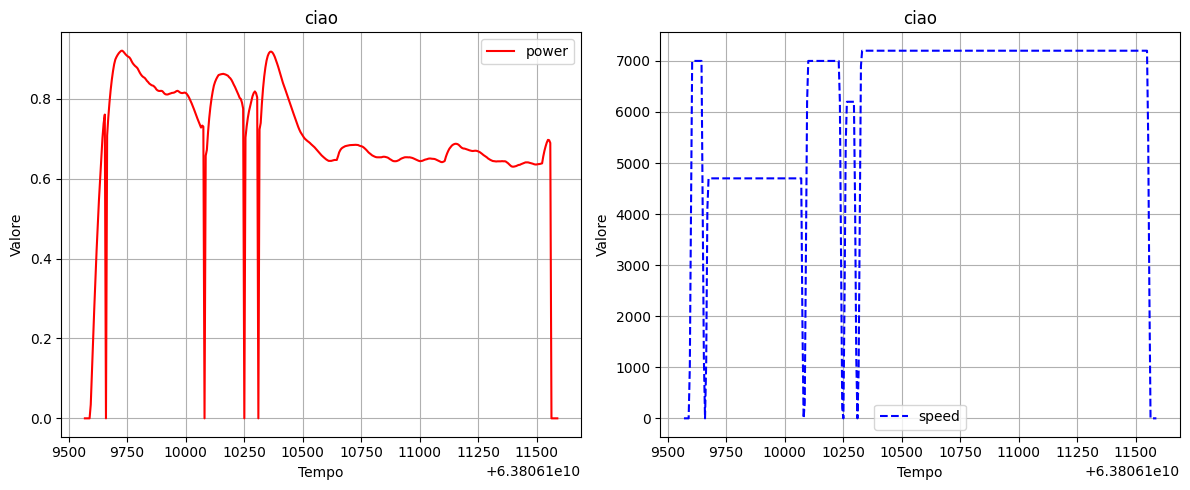

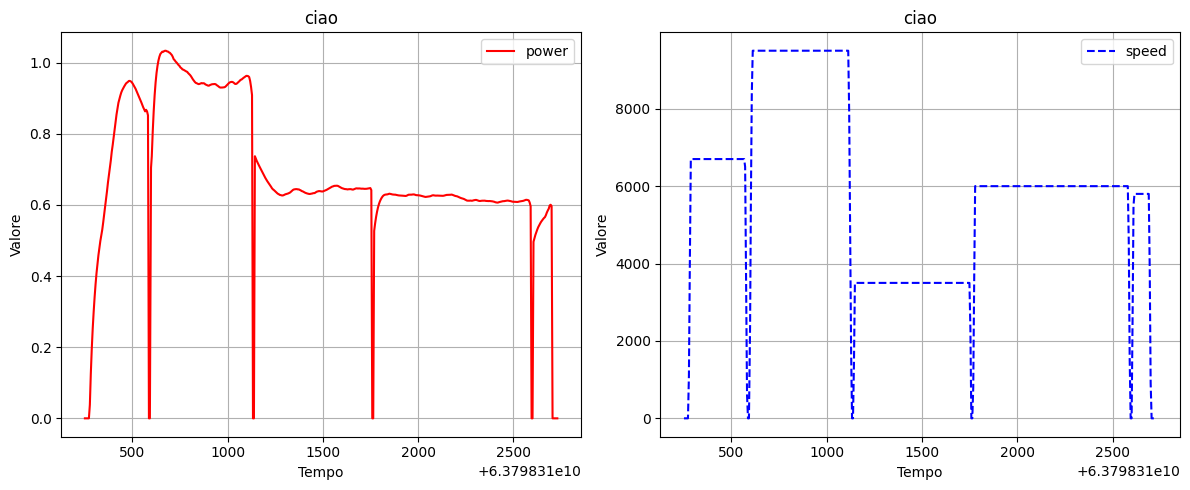

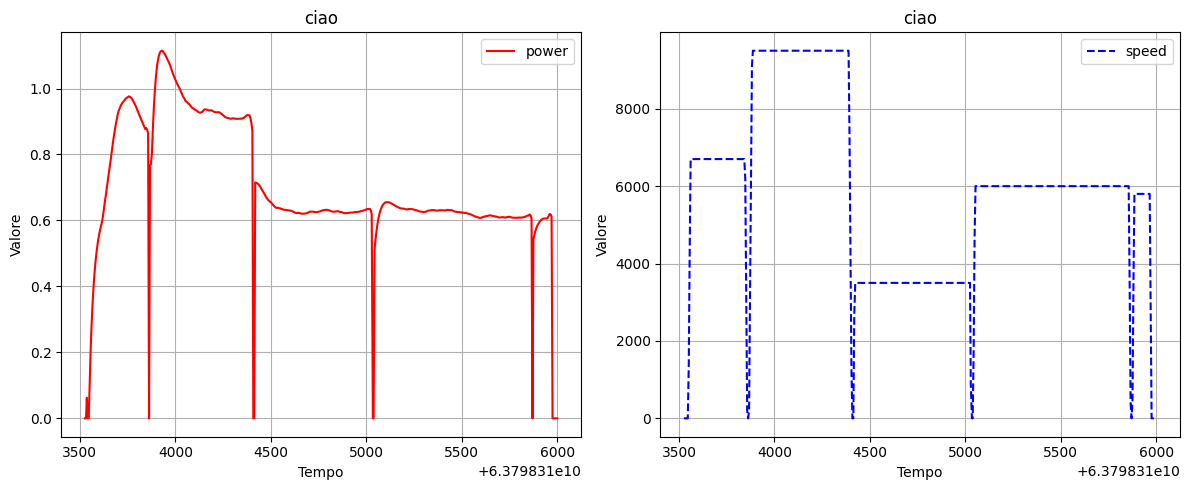

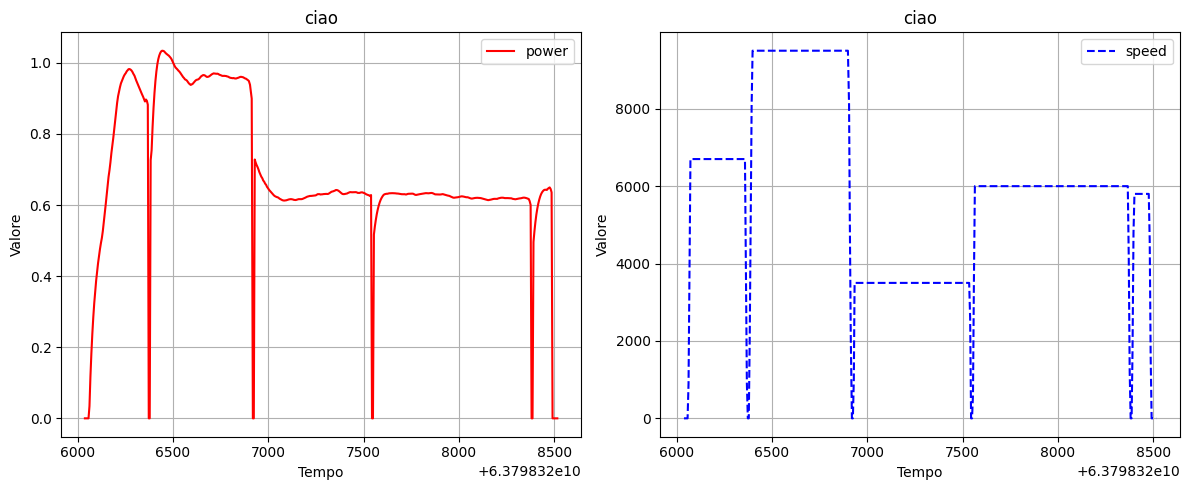

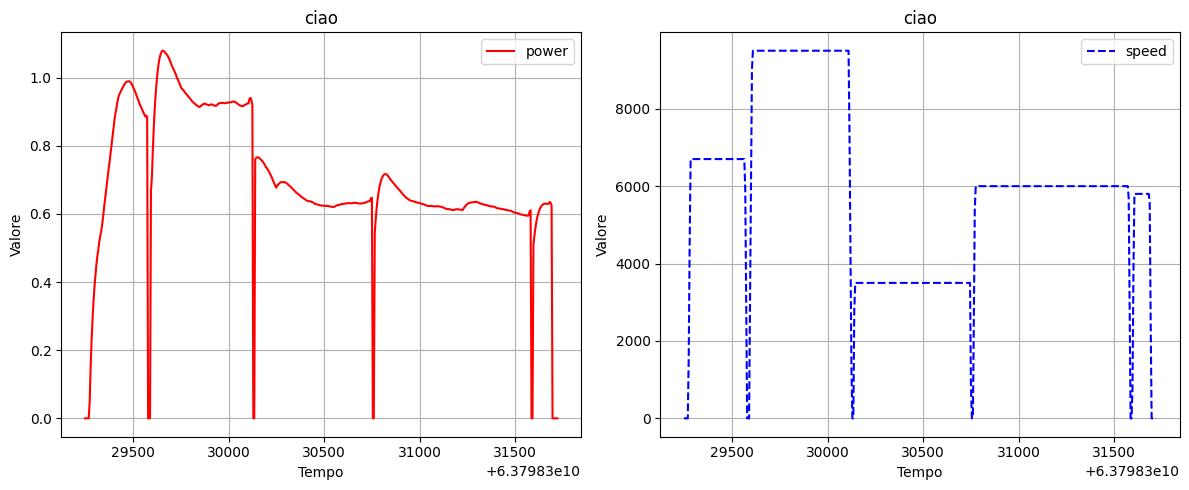

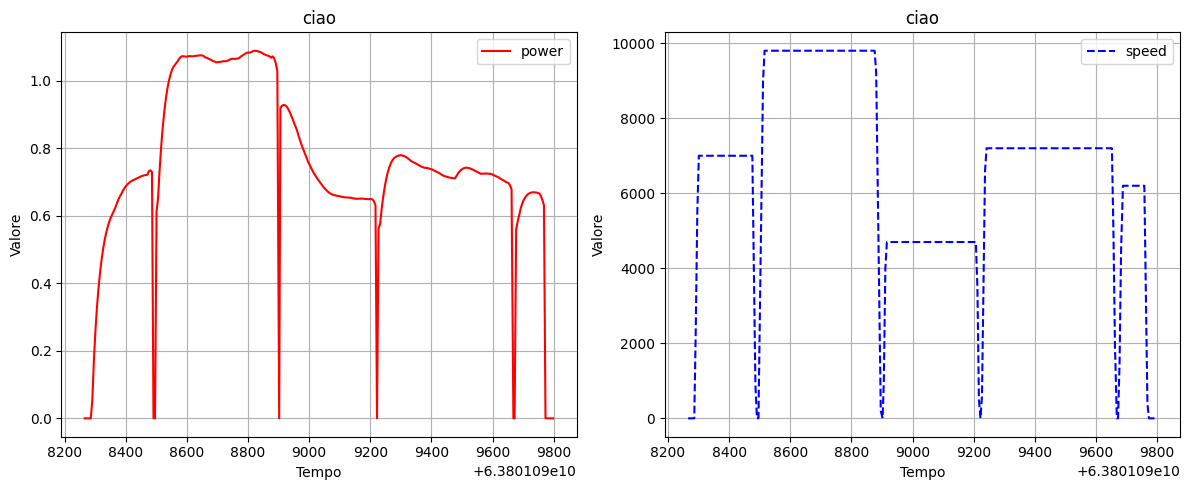

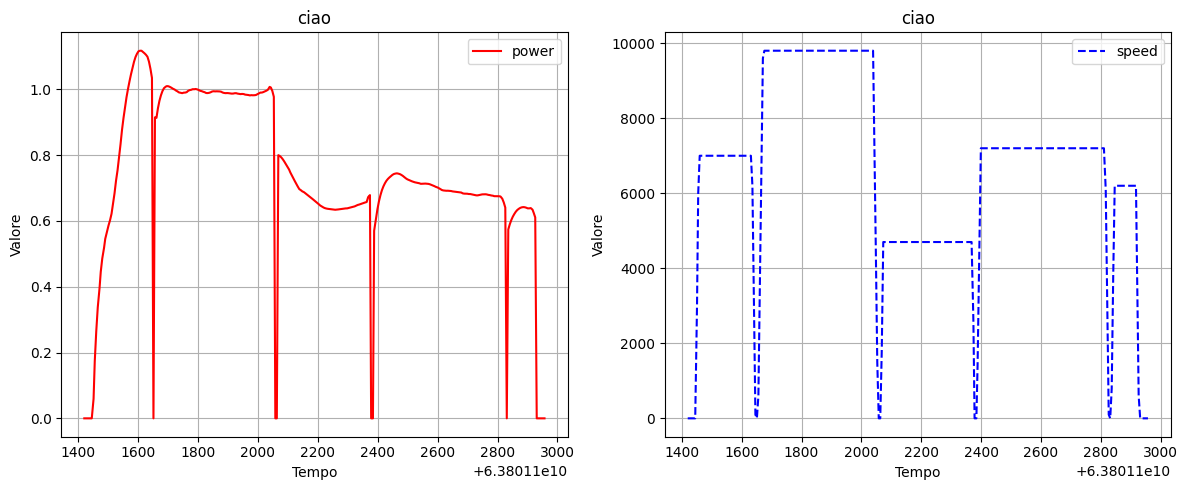

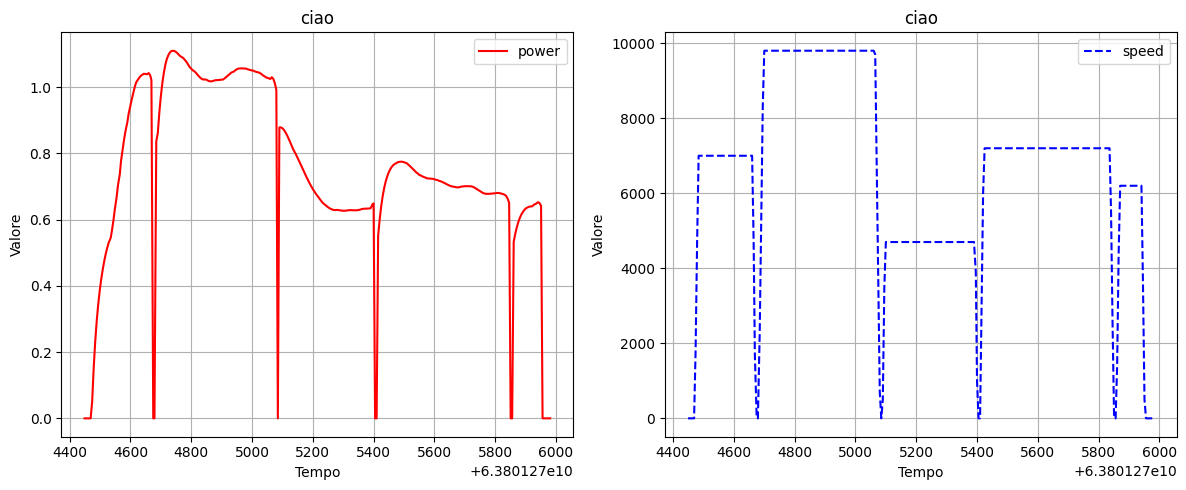

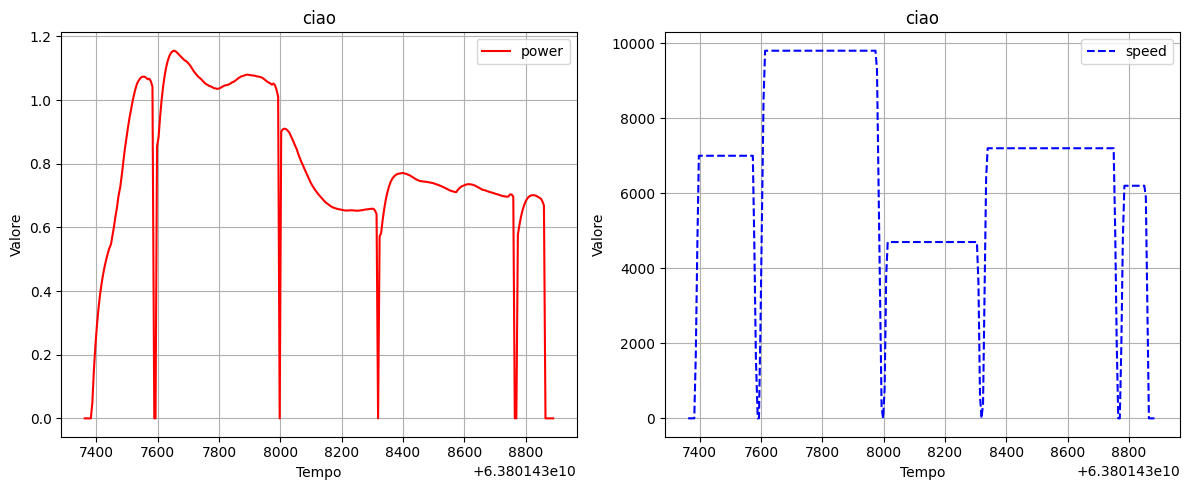

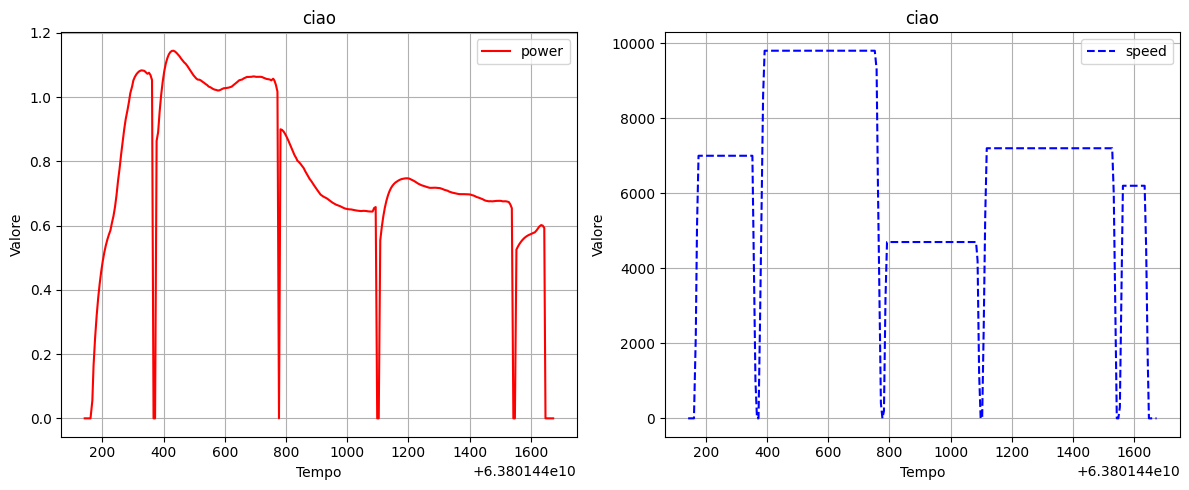

In [ ]:
power_datas = []
speed_datas = []
ts = []

for dp in data_paths:
  pd, sd, t = generateData(dp)
  power_datas.append(pd)
  speed_datas.append(sd)
  ts.append(t)

In [ ]:
train_speed = []
train_power = []
test_speed = []
test_power = []

for i in range(0,len(speed_datas)):
  if i == 1 or i == 2 or i == 4 or i == 5 or i == 7:
    test_speed.append(speed_datas[i])
    test_power.append(power_datas[i])
  else:
    train_speed.append(speed_datas[i])
    train_power.append(power_datas[i])

###Poly regressor

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

regressor = make_pipeline(PolynomialFeatures(), LinearRegression())

param_grid = {
    'polynomialfeatures__degree': [1,2,3,4,5],
    'linearregression__fit_intercept': [True, False],
}

grid_search = GridSearchCV(regressor, param_grid, cv=5)
for pt, st in zip(train_power, train_speed):
  grid_search.fit(st.reshape(-1,1), pt)

print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}


In [ ]:
best_model = grid_search.best_estimator_
for i in range(0,len(test_speed)):
  predictions = best_model.predict(test_speed[i].reshape(-1, 1))
  mse = mean_squared_error(test_power[i], predictions)
  print("Mean Squared Error:", mse)

Mean Squared Error: 0.014335861716976945
Mean Squared Error: 0.01214986448826759
Mean Squared Error: 0.01263104272305058
Mean Squared Error: 0.015753860348548643


###Rappresentazione White Box

In [ ]:
best_model = grid_search.best_estimator_

best_degree = best_model.named_steps['polynomialfeatures'].degree

linear_regressor = best_model.named_steps['linearregression']

coefficients = linear_regressor.coef_

def predict_power(speed, coefficients, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(speed.reshape(-1, 1))
    feature_names = poly.get_feature_names_out(input_features=['speed'])
    print(feature_names)
    power = np.dot(X_poly, coefficients)
    return power

['1' 'speed' 'speed^2' 'speed^3' 'speed^4']
Mean Squared Error: 0.014335861716976945


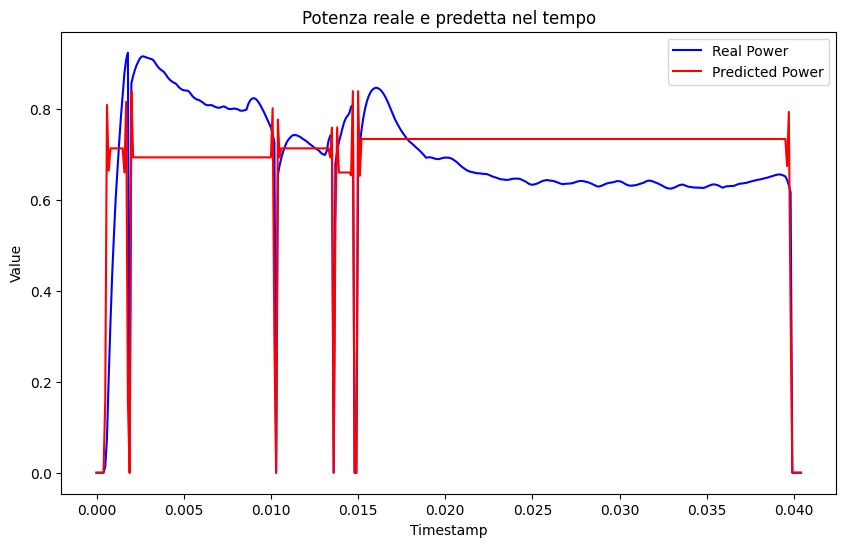

['1' 'speed' 'speed^2' 'speed^3' 'speed^4']
Mean Squared Error: 0.01214986448826759


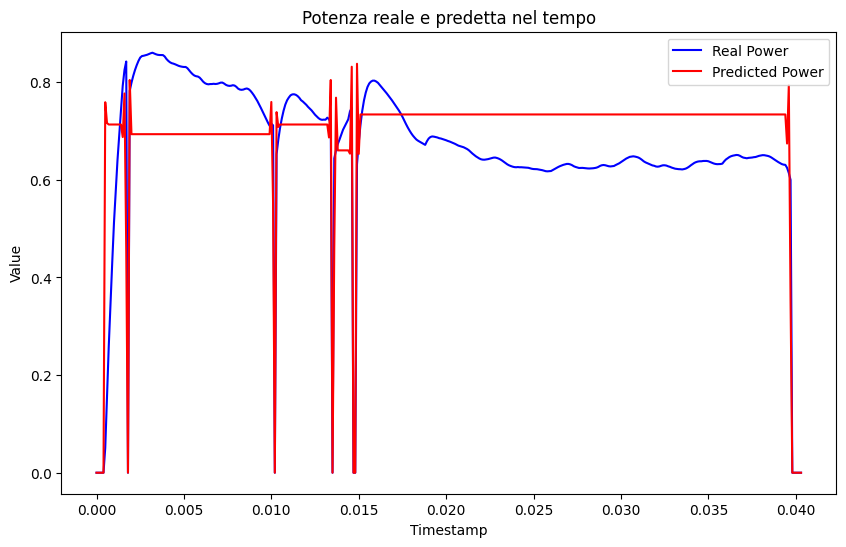

['1' 'speed' 'speed^2' 'speed^3' 'speed^4']
Mean Squared Error: 0.01263104272305058


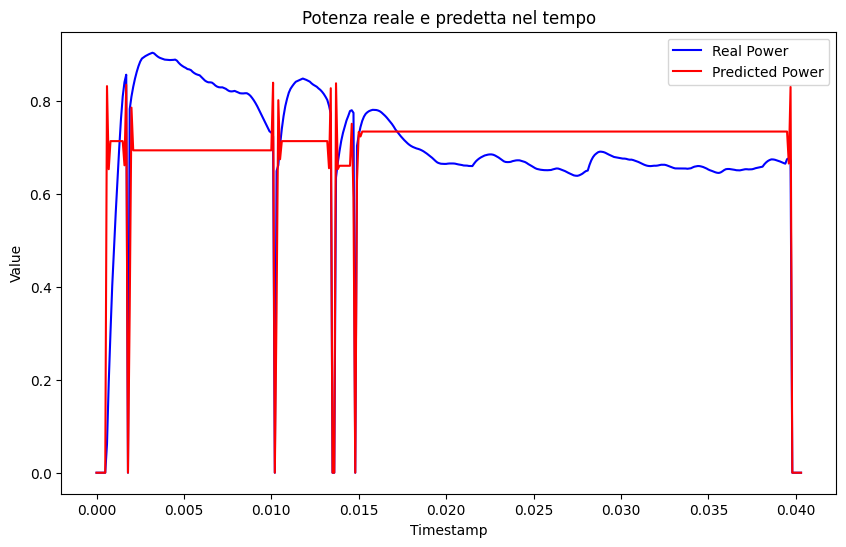

['1' 'speed' 'speed^2' 'speed^3' 'speed^4']
Mean Squared Error: 0.015753860348548643


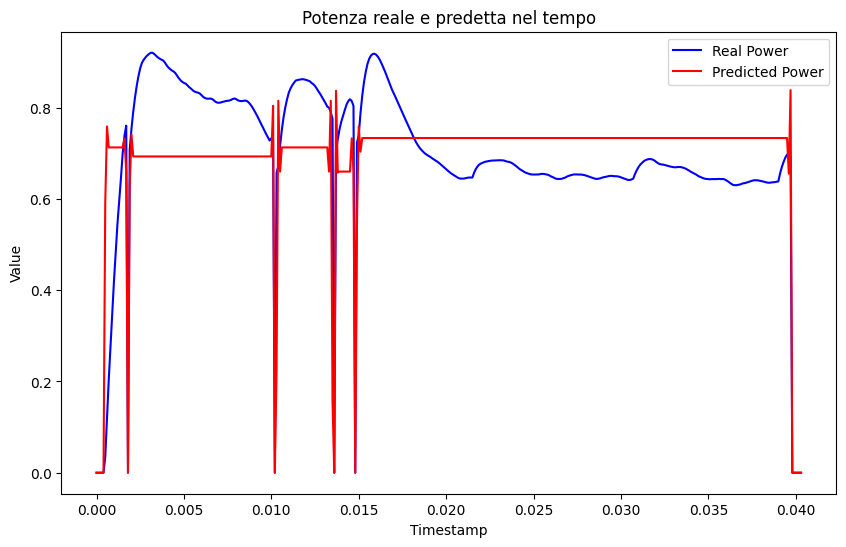

['1' 'speed' 'speed^2' 'speed^3' 'speed^4']
Mean Squared Error: 0.018399255999780706


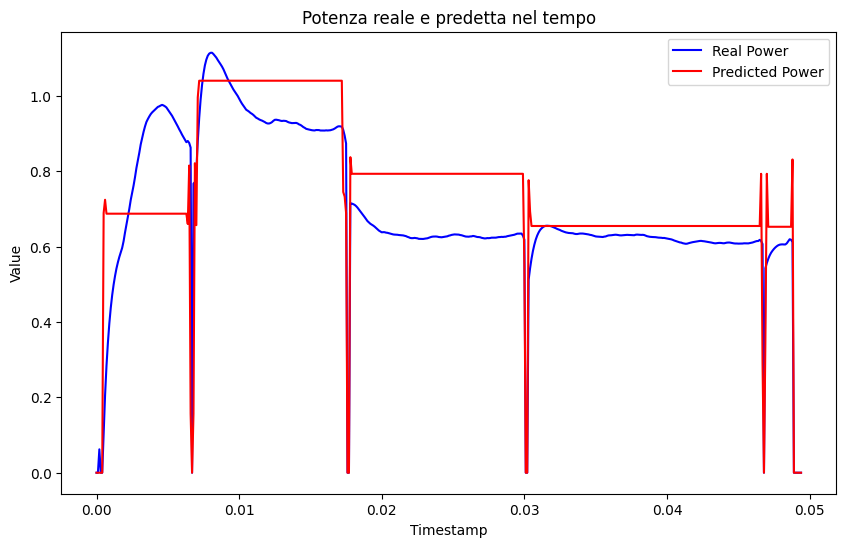

In [ ]:
import matplotlib.pyplot as plt
for i in range (0,len(test_speed)):
  predicted_power = predict_power(test_speed[i], coefficients, best_degree)
  mse = mean_squared_error(test_power[i], predicted_power)
  print("Mean Squared Error:", mse)
  plt.figure(figsize=(10, 6))
  dt=0.0001
  t_end_test = len(test_power[i])/10000
  t_test = np.arange(0, t_end_test, dt)
  plt.plot(t_test, test_power[i], label='Real Power', color='blue')
  plt.plot(t_test, predicted_power, label='Predicted Power', color='red')

  plt.xlabel('Timestamp')
  plt.ylabel('Value')
  plt.title('Potenza reale e predetta nel tempo')
  plt.legend()
  plt.show()


###SVM Gaussian Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
for pt, st in zip(train_power, train_speed):
  grid_search.fit(st.reshape(-1,1), pt)
best_params = grid_search.best_params_
print("Parametri ottimali:", best_params)

Parametri ottimali: {'C': 10, 'gamma': 1e-05}


In [ ]:
regressor = SVR(kernel='rbf', C=10, gamma=0.00001)
for pt, st in zip(train_power, train_speed):
  regressor.fit(st.reshape(-1,1), pt)

In [ ]:
predictions = regressor.predict(test_speed[1].reshape(-1, 1))
mse = mean_squared_error(test_power[1], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.024753150816113973


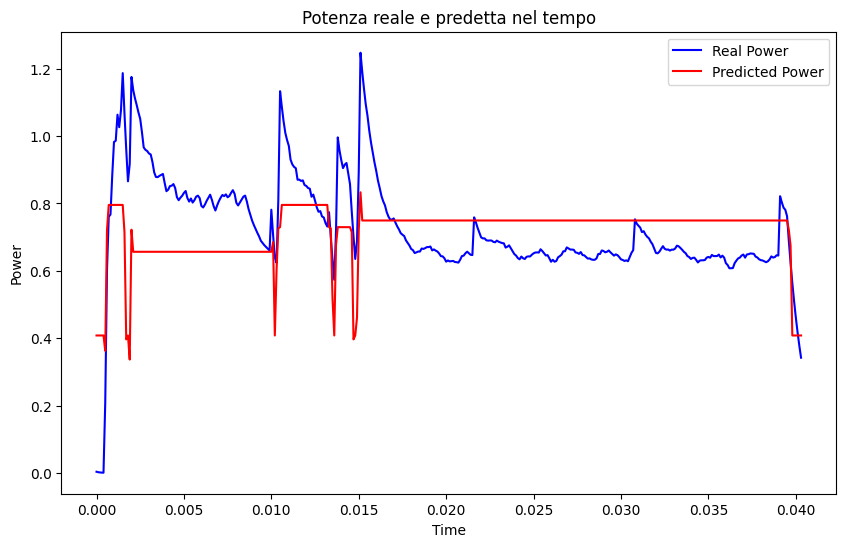

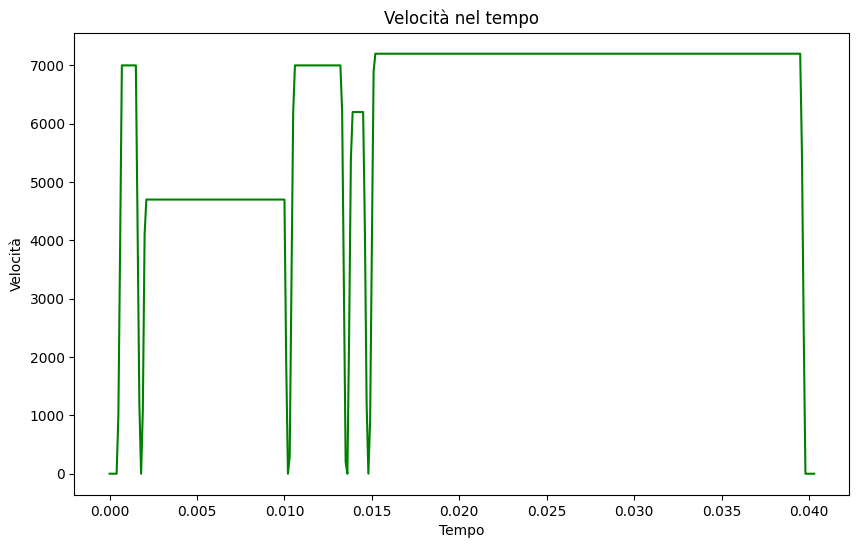

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dt=0.0001
t_end_test = len(test_power[1])/10000
t_test = np.arange(0, t_end_test, dt)
plt.plot(t_test, test_power[1], label='Real Power', color='blue')
plt.plot(t_test, predictions, label='Predicted Power', color='red')

plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Potenza reale e predetta nel tempo')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t_test, test_speed[1], color='green')
plt.xlabel('Tempo')
plt.ylabel('Velocità')
plt.title('Velocità nel tempo')
plt.show()


In [ ]:
coefficients = regressor.dual_coef_
gamma = 0.00001
support_vectors = regressor.support_vectors_

def extracted_function(speed_input):
    prediction = 0
    for i in range(len(coefficients[0])):
        prediction += coefficients[0][i] * np.exp(-gamma * np.linalg.norm(speed_input - support_vectors[i]) ** 2)
    return prediction


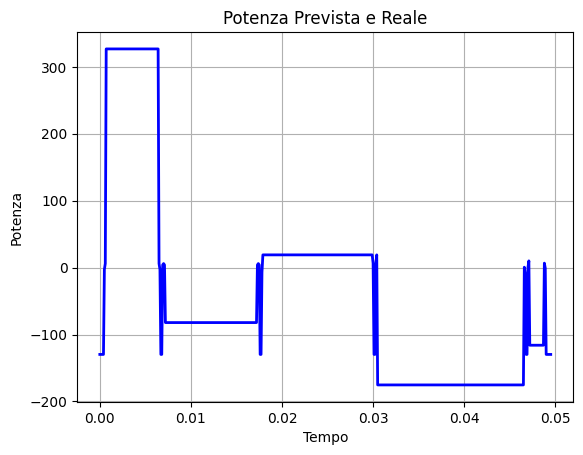

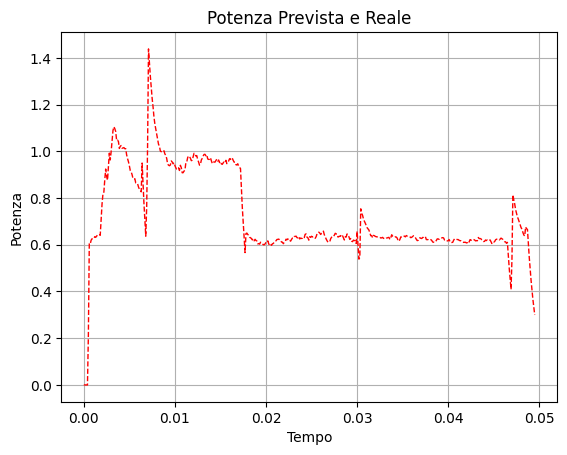

Mean Squared Error: 25047.4126513387


In [ ]:
predicted_power = []
input_speed_array = np.array(test_speed[0]).astype(float)
for speed_input in input_speed_array:
    predicted_power_val = extracted_function(speed_input)
    predicted_power.append(predicted_power_val)

import matplotlib.pyplot as plt
dt=0.0001
t_end_test = len(predicted_power)/10000
t_test = np.arange(0, t_end_test, dt)
plt.plot(t_test, predicted_power, color='blue', linewidth=2, label='Potenza Predetta')

plt.title('Potenza Prevista e Reale')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.grid(True)
plt.show()

plt.plot(t_test, test_power[0], color='red',linestyle='--', linewidth=1, label='Potenza Reale')
plt.title('Potenza Prevista e Reale')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_power[0], predicted_power)

print("Mean Squared Error:", mse)

###SVM Poly Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


regressor = SVR(kernel='poly', degree=3, C=10)

for pt, st in zip(train_power, train_speed):
    regressor.fit(st.reshape(-1, 1), pt)
predictions = regressor.predict(test_speed[1].reshape(-1, 1))

mse = mean_squared_error(test_power[1], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.030629205781106356


In [ ]:
coefficients_poly = regressor.dual_coef_
support_vectors_poly = regressor.support_vectors_


def extracted_function_poly_linear_combination(speed_input):
    prediction = 0
    for i in range(len(coefficients_poly[0])):
        for degree in range(1, regressor.degree + 1):
            prediction += coefficients_poly[0][i] * (speed_input ** degree)
    return prediction

In [ ]:
speed = test_speed[0]
predicted_power = []
for s in speed:
  predicted_power_val = extracted_function_poly_linear_combination(s)
  predicted_power.append(predicted_power_val)

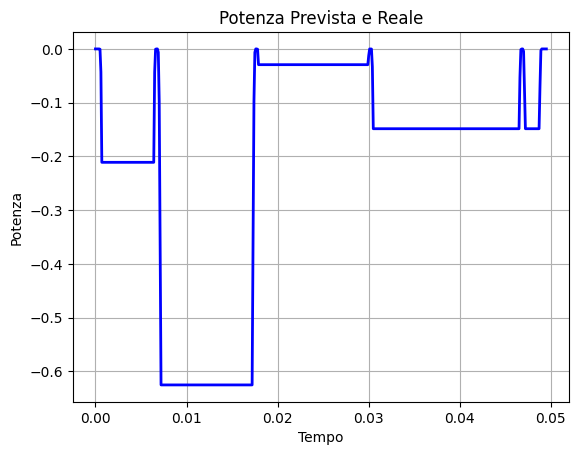

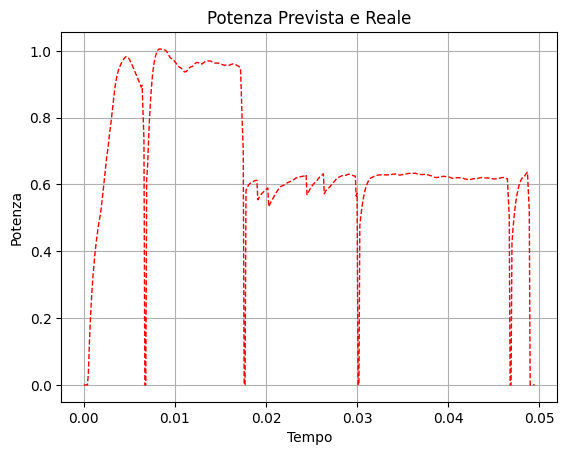

Mean Squared Error: 0.9560690500242423


In [ ]:
import matplotlib.pyplot as plt
dt=0.0001
t_end_test = len(predicted_power)/10000
t_test = np.arange(0, t_end_test, dt)
plt.plot(t_test, predicted_power, color='blue', linewidth=2, label='Potenza Predetta')

plt.title('Potenza Prevista e Reale')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.grid(True)
plt.show()

plt.plot(t_test, test_power[0], color='red',linestyle='--', linewidth=1, label='Potenza Reale')
plt.title('Potenza Prevista e Reale')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_power[0], predicted_power)

print("Mean Squared Error:", mse)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=3)
speed_poly = poly_features.fit_transform(test_speed[1].reshape(-1, 1))

poly_regressor = LinearRegression()
poly_regressor.fit(speed_poly, predictions)

print("Coefficients:", poly_regressor.coef_)
print("Intercept:", poly_regressor.intercept_)


Coefficients: [ 0.00000000e+00 -2.07359559e-13  8.33229907e-17  5.11769699e-13]
Intercept: 0.5923522079654049


In [ ]:
coefficients = regressor.dual_coef_.reshape(-1)

support_vectors = regressor.support_vectors_

total_coefficient_sum = sum(abs(coef) for coef in coefficients)
normalized_coefficients = [coef / total_coefficient_sum for coef in coefficients]

weighted_functions_normalized = []
for i in range(len(normalized_coefficients)):
    def weighted_function(speed, coef=normalized_coefficients[i], sv=support_vectors[i]):
        return coef * (1 + sv * speed)**2
    weighted_functions_normalized.append(weighted_function)


def calculate_power(speed, weighted_functions):
    power = 0
    for weighted_function in weighted_functions:
        power += weighted_function(speed)
    return power

In [ ]:
speed = test_speed[0]
predicted_power = calculate_power(speed, weighted_functions_normalized)

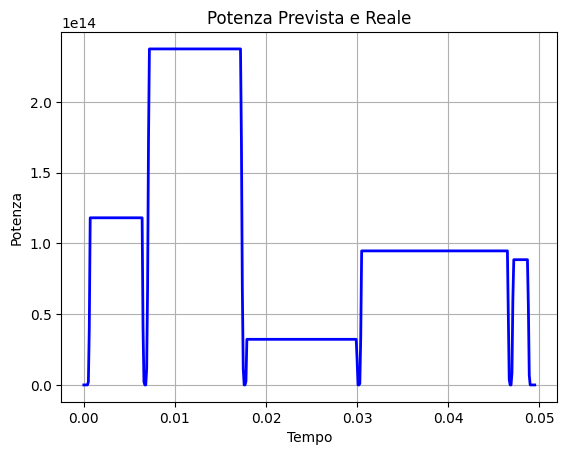

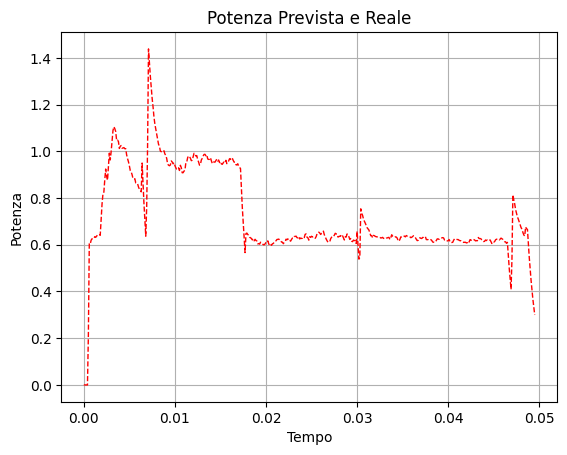

Mean Squared Error: 1.6683022244823745e+28


In [ ]:
import matplotlib.pyplot as plt
dt=0.0001
t_end_test = len(predicted_power)/10000
t_test = np.arange(0, t_end_test, dt)
# Plot della potenza prevista rispetto all'array di velocità
plt.plot(t_test, predicted_power, color='blue', linewidth=2, label='Potenza Predetta')

plt.title('Potenza Prevista e Reale')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.grid(True)
plt.show()

plt.plot(t_test, test_power[0], color='red',linestyle='--', linewidth=1, label='Potenza Reale')
plt.title('Potenza Prevista e Reale')
plt.xlabel('Tempo')
plt.ylabel('Potenza')
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_power[0], predicted_power)

print("Mean Squared Error:", mse)

##Implementazione rete neurali

In [ ]:
max_length = max(max(len(segment) for segment in speed_segments),
                 max(len(segment) for segment in power_segments))

def pad_sequences(sequences, max_length):
    padded_sequences = []
    for sequence in sequences:
        # Calcola il numero di zeri da aggiungere
        num_zeros = max_length - len(sequence)
        # Effettua il padding con zeri
        padded_sequence = np.pad(sequence, (0, num_zeros), 'constant')
        padded_sequences.append(padded_sequence)
    return padded_sequences

X_padded = pad_sequences(speed_segments, max_length)
y_padded = pad_sequences(power_segments, max_length)

X = np.array(X_padded)
y = np.array(y_padded)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###LSTM simple

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import TimeDistributed

model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    TimeDistributed(Dense(units=1))
])


model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.0244
Epoch 2/10
1/1 [==============================] - 0s 94ms/step - loss: 0.0174
Epoch 3/10
1/1 [==============================] - 0s 100ms/step - loss: 0.0152
Epoch 4/10
1/1 [==============================] - 0s 94ms/step - loss: 0.0154
Epoch 5/10
1/1 [==============================] - 0s 69ms/step - loss: 0.0147
Epoch 6/10
1/1 [==============================] - 0s 90ms/step - loss: 0.0140
Epoch 7/10
1/1 [==============================] - 0s 85ms/step - loss: 0.0138
Epoch 8/10
1/1 [==============================] - 0s 99ms/step - loss: 0.0140
Epoch 9/10
1/1 [==============================] - 0s 80ms/step - loss: 0.0139
Epoch 10/10
1/1 [==============================] - 0s 87ms/step - loss: 0.0146


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = model.predict(X_test)
predictions_reshaped = predictions.reshape(-1, predictions.shape[1])

mse = mean_squared_error(y_test, predictions_reshaped)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions_reshaped)
r2 = r2_score(y_test, predictions_reshaped)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

1/1 [==============================] - 0s 26ms/step
Mean Squared Error (MSE): 0.12054400260682152
Root Mean Squared Error (RMSE): 0.3471944737561667
Mean Absolute Error (MAE): 0.30668546851920775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


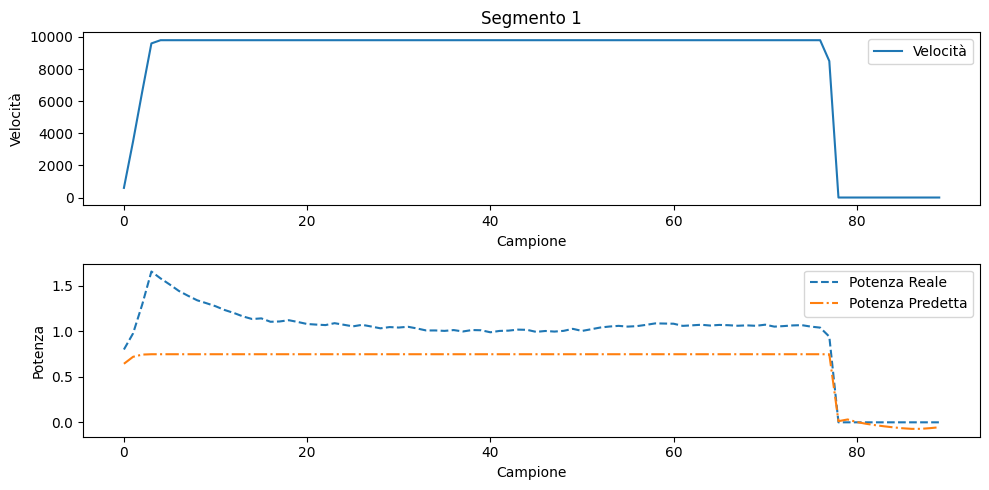

In [ ]:
import matplotlib.pyplot as plt
num_segments = len(X_test)
for i in range(num_segments):
    speed_segment = X_test[i]
    true_power_segment = y_test[i]
    predicted_power_segment = predictions_reshaped[i]
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(speed_segment, label='Velocità')
    plt.title(f'Segmento {i+1}')
    plt.xlabel('Campione')
    plt.ylabel('Velocità')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(true_power_segment, label='Potenza Reale', linestyle='--')
    plt.plot(predicted_power_segment, label='Potenza Predetta', linestyle='-.')
    plt.xlabel('Campione')
    plt.ylabel('Potenza')
    plt.legend()

    plt.tight_layout()
    plt.show()


###LSTM complex

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras import regularizers

def build_lstm_model(input_shape):
    units = 64
    dropout_rate = 0.2
    kernel_regularizer = regularizers.l2(0.01)

    model = Sequential([
        LSTM(units=units, input_shape=input_shape, return_sequences=True, dropout=dropout_rate, recurrent_dropout=dropout_rate),
        LSTM(units=units, return_sequences=True, dropout=dropout_rate, recurrent_dropout=dropout_rate),
        Dense(units=units, activation='relu', kernel_regularizer=kernel_regularizer),
        Dropout(dropout_rate),
        TimeDistributed(Dense(units=1))
    ])
    return model
model = build_lstm_model(input_shape=(X_train.shape[1], 1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.9540 - val_loss: 1.0836
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.9713 - val_loss: 0.9429
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.8757 - val_loss: 0.8563
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.8023 - val_loss: 0.7765
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.7870 - val_loss: 0.7067
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.7553 - val_loss: 0.6516
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.7529 - val_loss: 0.6168
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.7604 - val_loss: 0.6042
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.6439 - val_loss: 0.6040
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.7130 - val_loss: 0.6130
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.6582 - val_loss: 0.6156
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.73

In [ ]:
def build_dropout_model(input_shape):
    model = Sequential([
        LSTM(units=64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(units=64, return_sequences=True),
        Dropout(0.2),
        Dense(units=64, activation='relu'),
        Dropout(0.2),
        TimeDistributed(Dense(units=1))
    ])
    return model

model = build_dropout_model(input_shape=(X_train.shape[1], 1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping])

mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.1904 - val_loss: 0.0822
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1028 - val_loss: 0.0099
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0661 - val_loss: 0.0361
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0736 - val_loss: 0.0663
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0891 - val_loss: 0.0553
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0681 - val_loss: 0.0322
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0500 - val_loss: 0.0125
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0530 - val_loss: 0.0065
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0424 - val_loss: 0.0089
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0459 - val_loss: 0.0133
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0422 - val_loss: 0.0160
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0478

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

def create_model(activation='relu', dropout_rate=0.0, kernel_initializer='uniform', optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer=kernel_initializer, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=kernel_initializer))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model



model = KerasRegressor(build_fn=create_model, verbose=0)

activation = ['relu', 'tanh', 'sigmoid']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
kernel_initializer = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [50, 100, 150]

param_grid = dict(activation=activation, dropout_rate=dropout_rate, kernel_initializer=kernel_initializer, optimizer=optimizer, batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
